## Quá trình Train Model:
* Tổng thời gian run end to end: 8 phút 
* (không bao gồm thời gian tuning parameter, do bước này đã thực hiện xong rồi nên marked lại để không run lại)

Bước 1: Đọc dữ liệu
* 1) Đọc dữ liệu từ file excel và xem một số info(), kiểm tra sơ bộ missing values
* 2) Quan sát sơ bộ dữ liệu có thể thấy dữ liệu thuộc dạng có cấu trúc (structured data). Tuy nhiên, chưa đạt được mức độ clean và standard cần thiết.
* Nhận xét: đây là bài toán dự đoán Giá nhà, thuộc nhóm Regression

Bước 2: Làm sạch dữ liệu
* 1) Tìm hiểu cấu trúc và quy luật typing của từng cột dữ liệu.
* 2) Bóc tách và làm sạch cho từng thuộc tính. Sử dụng các kỹ thuật: bỏ dấu Tiếng Việt, tách chữ, RegEx,... để lấy dữ liệu
* 3) Có thể 1 cột dữ liệu nhưng được bóc tách thành nhiều thuộc tính. Hoặc từ 2 cột dữ liệu được chuyển hoá thành thuộc tính mới.
* 3) Cố gắng sử dụng domain knowledge để tạo ra nhiều thuộc tính hợp lý nhất có thể để phục vụ cho bước EDA và Feature selection.    

Bước 3: EDA
* 1) Kiểm tra correlation giữa các thuộc tính liên tục với thuộc tính Giá. Từ đó, loại bỏ được khá nhiều nhiều thuộc tính đã tạo ra nhưng không tương quan với Giá.
* 2) Sử dụng kiểm định ANOVA để kiểm tra  giữa các thuộc tính phân loại với thuộc tính Giá. Từ đó, cũng loại bỏ được khá nhiều nhiều thuộc tính phân loại không tương quan với Giá.
* 3) Thông tin từ EDA còn cho thấy: các thuộc tính liên tục là Đơn giá, Diện tích và cả Giá đều có phân phối nhọn hơn PP chuẩn và lệch phải (đuôi của phân phối kéo rất dài về bên phải). 
* 4) Ngoài ra, phát hiện 1 mẫu có Giá và số Lầu không logic, và sau khi so sánh với các mẫu tương tự thì kết luận là có thể do lỗi typing => Xoá bỏ mẫu này tại bước Feature selection

Bước 4: Phân tích sâu hơn các thuộc tính location
* 1) Các thuộc tính về location như: Đường, Phường, Quận chứa rất nhiều unique values (142 unique values đổi với Phường và 1044 unique values đối với Đường.
* 2) Ngoài ra, các unique values có thể trùng tên nhưng bản chất thực tế location khác nhau: Ví dụ: Phường 1 thuộc Quận 3 khác với Phường 1 thuộc Quận 10, Quận 11, Quận 8, Quận 6, ...
* 3) Về mặt domain knowledge, các thuộc tính về location có ảnh hưởng lớn đến Giá BĐS. Ở những location đắc địa, Đơn giá nhà sẽ cao hơn. Do đó, 2 Nhà có cùng chung các đặc điểm, Nhà nào ở location đắc địa hơn thì Đơn giá sẽ cao hơn, dẫn đến Giá cả cũng cao hơn.
* 4) Thực tế kiểm định ANOVA phía trên cũng khẳng định các thuộc tính location có tương quan khá lớn với thuộc tính f_Gia.
* 5) Tuy nhiên, nếu ghép Đường, Phường, Quận cách đơn thuần, thì sẽ tạo ra các feature về location có số lượng unique values rất lớn. Do đó, Thông qua phân tích sâu hơn các thuộc tính location với thuộc tính Đơn giá thì đã gom nhóm các Phường trong cùng Quận mà có Đơn giá tương đương nhau thành các nhóm.
* 6) Sau khi gom nhóm, căn cứ thêm vào biểu đồ boxplot và domain knowledge để revise lại một số Phường bị ghép nhóm chưa hợp lý. Kết quả gom nhóm được chuyển thành thuộc tính f_Area_2, và <span style="color:blue"> tạo thêm feature mới ghép từ f_Quan và f_Area_2, có tên gọi là f_Location_qa_2  </span> 
* 7) Những Quận mà Đơn giá giữa các Phương không chênh lệch nhiều thường sẽ có ít nhóm. Ví dụ: Quận Gò Vấp, Quận 12,... nhưng Quận 1, Quận 3, Quận 5,...
* 8) Danh sách gom nhóm Area này được <span style="color:blue"> lưu lại thành thành file excel </span> để sử dụng cho New data

Bước 5: Feature selection
* 1) Căn cứ vào các chỉ số tương quan với thuộc tính target là Giá nhiều lần thử nghiệm trên các models, chỉ một số thuộc tính sau được chọn: 'f_Nha_ve_sinh', 'f_Chieu_dai', 'f_Rong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 'f_Lo_gioi', 'f_Lau_n','f_Nha_hem', 'f_Quan', 'f_Location_qa_2'
* 2) Loại bỏ 1 mẫu có Giá và số Lâu không logic
* 3) Loại bỏ các mẫu có null values

Bước 6: Feature Engineering
* 1) Thực hiện OneHotEncoder với các thuộc tính phân loại dạng chữ: 'f_Quan', 'f_Location_qa_2'
* 2) Thực hiện RobustScaler với các thuộc tính liên tục còn lại

Bước 7: Tách dữ liệu
* 1) Tách tập dữ liệu Train sau khi đã transform thành X_train và X_test với tỷ lệ 80:20 theo 2 cách: dùng train_test_split() và dùng StratifiedShuffleSplit()
* 2) Sau khi so sánh thì chọn cách tách StratifiedShuffleSplit() vì sau khi thử nghiệm thì hiệu suất mô hình cao hơn
* 3) Tạo 2 tập dữ liệu có scale và không cần scale để thử nghiệm: X_train và X_test, X_train_scale và X_test_scale

Bước 8: Build các Models khác nhau: LinearRegression, KNeighborsRegressor, SVR, RandomForestRegressor, GradientBoostingRegressor
* 1) Thực hiện Cross validation với số lượng lặp cv=10 trên các model tổng quát (chưa tuning parameter) để chọn ra các model tốt. Căn cứ để lựa chọn là các chỉ số: score và RMSE. Theo đó, chọn được các models: RandomForestRegressor, GradientBoostingRegressor
* 2) Tuning parameter đối với các models: RandomForestRegressor, GradientBoostingRegressor
* 2) Thực hiện Training, Model evaluation và Cross validation thì đi đến kết luận: 
** <span style="color:blue"> model tốt nhất là GradientBoostingRegressor với n_estimators = 600 </span>

Bước 9: Xây dựng Pipeline
* 1) Xây dựng hàm tự định nghĩa có tên Pre_process(), Create_XY(), Concating() có chức năng fit và transform cho các bước tiền xử lý dữ liệu giống như đã thực hiện khi Training model (đặc biệt là các bước clean data và tạo thuộc tính mới)
* 2) Tạo pipline gồm các bước/model: tiền xử lý dữ liệu bằng Pre_process(), Create_XY, Concating() và lưu thành 2 pickle

Bước 10: Lưu model
* 1) Sử dụng thư viện pickle và phương thức dump để lưu thành các file pickles
* 2) Pipeline các bước/model: tiền xử lý dữ liệu bằng Pre_process(), Create_XY(), Concating() được lưu thành 2 pickle
* 3) Model OneHotEncoder được lưu thành 1 pickle và model GradientBoostingRegressor cũng lưu thành 1 pickle
* 4) Tổng cộng có 4 file pickles

In [1]:
import os
import time
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import chi2_contingency, chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
import pickle

import sys; 
path=os.path.abspath(os.path.join(os.getcwd(), os.pardir)) + '\Lib'
sys.path.insert(0,path)
import import_ipynb
from lib_evaluation_regression_model import *

import warnings
warnings.filterwarnings('ignore')

importing Jupyter notebook from lib_evaluation_regression_model.ipynb


In [2]:
start_time = time.time()

# READ DATA

In [3]:
# Đọc dữ liệu
data_raw = pd.read_excel('House_data.xlsx',engine='openpyxl')
df = data_raw

In [4]:
# Đọc dữ liệu về Longitude và Lattitude
# Đây là dữ liệu thu thập từ Google map về Kinh độ và Vĩ độ của các con đường tại TP Hồ Chí Minh
dim_longlat = pd.read_excel('Duong Phuong Quan v3.xlsx', 
                             usecols=['Duong', 'Phuong', 'Quan', 'Latitude', 'Longitude'],
                            sheet_name = 'Sheet2')
dim_longlat.columns = ['Duong_dim', 'Phuong_dim', 'Quan_dim', 'Latitude', 'Longitude']

In [5]:
# Xem info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4386 non-null   int64  
 1   Noi_dung           4386 non-null   object 
 2   Dia_chi            4386 non-null   object 
 3   Gia                4386 non-null   object 
 4   Nha_ve_sinh        4386 non-null   object 
 5   So_phong           4386 non-null   object 
 6   Huong              4386 non-null   object 
 7   Chieu_dai          4386 non-null   float64
 8   Rong               4386 non-null   float64
 9   Giay_to            4386 non-null   object 
 10  Cau_truc           4386 non-null   object 
 11  Dien_tich          4386 non-null   object 
 12  Dien_tich_su_dung  4386 non-null   object 
 13  Hem_rong           4386 non-null   float64
 14  Duong_mat_tien     4386 non-null   float64
 15  Tien_ich           3551 non-null   object 
 16  Duong              4386 

In [6]:
# Xem dữ liệu trống
df.isna().sum()

ID                     0
Noi_dung               0
Dia_chi                0
Gia                    0
Nha_ve_sinh            0
So_phong               0
Huong                  0
Chieu_dai              0
Rong                   0
Giay_to                0
Cau_truc               0
Dien_tich              0
Dien_tich_su_dung      0
Hem_rong               0
Duong_mat_tien         0
Tien_ich             835
Duong                  0
Phuong                 0
Quan                   0
dtype: int64

In [7]:
df.head()

,ID,Noi_dung,Dia_chi,Gia,Nha_ve_sinh,So_phong,Huong,Chieu_dai,Rong,Giay_to,Cau_truc,Dien_tich,Dien_tich_su_dung,Hem_rong,Duong_mat_tien,Tien_ich,Duong,Phuong,Quan
0,149065,Bán nhà 134.7m2 Tân Hiệp Hóc Môn. Cách Đỗ Văn ...,"Đường ấp Thới Tây 2, Xã Tân Hiệp, Huyện Hóc Môn","3,7 tỷ 35,4 triệu/m²",4,3,Đ.Bắc,20.71,5.00,Sổ hồng,1 trệt + 1 lầu,104.5,134.7,5.0,0.0,"Gần chợ, siêu thị Gần bệnh viện Gần công viên,...",Đường ấp Thới Tây 2,Xã Tân Hiệp,Huyện Hóc Môn
1,231326,Bán Nhà Nát Gần Mặt Tiền Đường Hậu Giang P11 Q...,"Đường Hậu Giang, Phường 11, Quận 6","3,9 tỷ 92,2 triệu/m²",1,--,Tây,12.90,3.00,Sổ hồng,1 trệt,42.3,87.7,6.1,0.0,"Gần chợ, siêu thị Gần công viên, trung tâm Di ...",Đường Hậu Giang,Phường 11,Quận 6
2,184984,Bán nhà riêng Quận Gò Vấp - Nhà còn mới phù hợ...,"Đường Nguyễn Thượng Hiền, Phường 1, Quận Gò Vấp",2 tỷ 99 triệu/m²,2,--,T.Nam,3.20,4.65,Sổ hồng,"1 trệt, 1 lửng",20.2,150,3.0,0.0,"Gần chợ, siêu thị Gần công viên, trung tâm Gầ...",Đường Nguyễn Thượng Hiền,Phường 1,Quận Gò Vấp
3,205270,"Bán Nhà Hẻm Đường Huỳnh Tấn Phát, xã Phú Xuân ...","Đường Huỳnh Tấn Phát, Xã Phú Xuân, Huyện Nhà Bè","3,8 tỷ 52,9 triệu/m²",2,2,Đ.Bắc,14.35,5.00,Sổ hồng,1 trệt + 1 lầu,71.8,137.6,5.0,0.0,"Gần chợ, siêu thị Gần bệnh viện Gần công viên...",Đường Huỳnh Tấn Phát,Xã Phú Xuân,Huyện Nhà Bè
4,307136,"Bán Nhà Hẻm 3m Lò Siêu, DT: 5,2x10m, Trệt Lửng...","Đường Lò Siêu, Phường 16, Quận 11","6,5 tỷ 124,8 triệu/m²",5,5,T.Nam,10.00,5.20,Sổ hồng,"1 trệt, 1 lửng, 1 tầng thượng + 2 lầu",52.1,70.3,0.0,5.0,NaN,Đường Lò Siêu,Phường 16,Quận 11


In [8]:
df.tail()

,ID,Noi_dung,Dia_chi,Gia,Nha_ve_sinh,So_phong,Huong,Chieu_dai,Rong,Giay_to,Cau_truc,Dien_tich,Dien_tich_su_dung,Hem_rong,Duong_mat_tien,Tien_ich,Duong,Phuong,Quan
4381,217818,Bán nhà hẻm quận 10 - Hẻm 1 xẹt - Cách mặt tiề...,"Đường Lê Hồng Phong, Phường 2, Quận 10","6,6 tỷ 121,3 triệu/m²",2,2,Đ.Nam,18.00,3.0,Sổ hồng,1 trệt + 1 lầu,54.4,135,2.50,0.0,NaN,Đường Lê Hồng Phong,Phường 2,Quận 10
4382,307945,"Bán nhà hẻm đường Điện Biên Phủ, hẻm yên tĩnh,...","Đường Điện Biên Phủ, Phường 15, Quận Bình Thạnh","4,6 tỷ 126 triệu/m²",3,4,Đ.Bắc,9.37,3.0,Sổ hồng,1 trệt + 2 lầu,36.5,79.9,1.78,0.0,NaN,Đường Điện Biên Phủ,Phường 15,Quận Bình Thạnh
4383,225770,Bán nhà riêng Quận 12 - 800m tới Ngã Tư Tô Ký ...,"Đường Huỳnh Thị hai, Phường Tân Chánh Hiệp, Qu...","3,85 tỷ 76,2 triệu/m²",3,4,T.Nam,11.21,4.5,Sổ hồng,"1 trệt, 1 tầng thượng + 2 lầu",50.5,126.1,6.00,0.0,"Gần chợ, siêu thị Gần công viên, trung tâm Hẻ...",Đường Huỳnh Thị hai,Phường Tân Chánh Hiệp,Quận 12
4384,339105,CẦN BÁN NHÀ NGUYÊN CĂN VUÔNG VỨC ĐƯỜNG HUỲNH V...,"Đường Huỳnh Văn Bánh, Phường 17, Quận Phú Nhuận","4,2 tỷ 132,9 triệu/m²",2,2,Đ.Bắc,9.20,3.2,Sổ hồng,1 trệt + 1 lầu,31.6,63.2,1.76,0.0,"Gần chợ, siêu thị Gần trường học Di chuyển thu...",Đường Huỳnh Văn Bánh,Phường 17,Quận Phú Nhuận
4385,293284,Bán nhà Quận Gò Vấp - Khu dân cư an ninh - Sổ ...,"Đường Thống Nhất, Phường 11, Quận Gò Vấp","4,7 tỷ 73,3 triệu/m²",2,3,Đ.Bắc,15.98,4.0,Sổ hồng,"1 trệt, 1 lửng, 1 áp mái",64.1,53.9,2.20,0.0,"Gần chợ, siêu thị Gần trường học Thiết kế thô...",Đường Thống Nhất,Phường 11,Quận Gò Vấp


Nhận xét: 
* Cột 'Tien_ich' chứa khá nhiều dữ liệu bị trống => Xem xét không sử dụng làm Thuộc tính input vì việc Imputer có thể làm ảnh hưởng đến model (không còn thực tế)
* Các cột khác có chứa dữ liệu nhưng dtype chưa đúng, chứa lẫn lộn số và chữ => Cần thực hiện EDA và Feature Engineering

In [9]:
# Loại bỏ dòng trùng (nếu có)
df = df.drop_duplicates()

In [10]:
# Loại bỏ những thuộc tính không liên quan đến yêu cầu bài toán

Yêu cầu bài toán là dự đoán giá nhà, các thuộc tính trong bộ dữ liệu đều có liên quan đến nhà nên chưa đủ cơ sở loại bỏ thuộc tính nào không liên quan tại bước này

# DATA CLEANING

In [11]:
# Xem lại danh sách các cột dữ liệu
df.columns

Index(['ID', 'Noi_dung', 'Dia_chi', 'Gia', 'Nha_ve_sinh', 'So_phong', 'Huong',
       'Chieu_dai', 'Rong', 'Giay_to', 'Cau_truc', 'Dien_tich',
       'Dien_tich_su_dung', 'Hem_rong', 'Duong_mat_tien', 'Tien_ich', 'Duong',
       'Phuong', 'Quan'],
      dtype='object')

In [12]:
# Kiểm tra unique values và dtype của từng cột dữ liệu
for i in df.columns[3:]:
    intList=sorted([x for x in df[i] if type(x) is int])
    floatList=sorted([x for x in df[i] if type(x) is float])
    strList=sorted([x for x in df[i] if type(x) is str])
    uniqueList=set(intList+floatList+strList)
    print('\033[4m'+'Kiểm tra biến', i +'\033[0m', ': ', len(df[i].unique()), 'giá trị,', 
          uniqueList, ', dtype:', df[i].dtypes)

Kiểm tra biến Gia :  4307 giá trị, {'7,6 tỷ 126,1 triệu/m² ', '6 tỷ 54,7 triệu/m²', '9,5 tỷ 71,7 triệu/m² ', '6,5 tỷ 113,6 triệu/m²', '21 tỷ 112,8 triệu/m²', '5,7 tỷ 118,8 triệu/m²', 'Đã bán 131,7 triệu/m²', '3,05 tỷ 132 triệu/m² ', '5,85 tỷ 230,3 triệu/m²', '3,35 tỷ 81,8 triệu/m²', '1,1 tỷ 91,7 triệu/m² ', '3,05 tỷ 114,7 triệu/m² ', '12 tỷ 252,1 triệu/m²', '4,9 tỷ 78,6 triệu/m² ', '4,66 tỷ 125,6 triệu/m² ', '4,7 tỷ 50,2 triệu/m²', '13,5 tỷ 192,6 triệu/m² ', '3,1 tỷ 114 triệu/m²', '4,2 tỷ 42,4 triệu/m²', '2,4 tỷ 80,8 triệu/m² ', '14,5 tỷ 142,6 triệu/m²', '12 tỷ 154,2 triệu/m² ', '26 tỷ 300,2 triệu/m²', '4,65 tỷ 117,1 triệu/m² ', '4,7 tỷ 92,5 triệu/m² ', '3,6 tỷ 151,9 triệu/m²', '4,685 tỷ 37,2 triệu/m²', '7,8 tỷ 122,8 triệu/m²', '9,5 tỷ 122,1 triệu/m² ', '6,6 tỷ 118,5 triệu/m²', '6,2 tỷ 266,1 triệu/m²', '4,3 tỷ 117,8 triệu/m²', '3,4 tỷ 90,7 triệu/m²', '8 tỷ 182,6 triệu/m² ', '16,3 tỷ 218,5 triệu/m²', '6,2 tỷ 156,6 triệu/m² ', '5,5 tỷ 97 triệu/m²', '4 tỷ 93,5 triệu/m² ', '5,5 tỷ 100 triệ

Nhận xét sơ bộ:
* Cột 'Gia' có chứa thông tin về Giá và Đơn giá. Đơn vị tính có thể khác nhau => Cần thực hiện tiền xử lý để tạo Thuộc tính phù hợp
* Cột 'Nhà_ve_sinh' có chứa missing values (mang giá trị là '--' hoặc ' -- ')
* Cột 'So_phong' cũng có chứa missing values (mang giá trị là '--' hoặc ' -- ')
* Cột 'Chieu_dai' và 'Chieu_rong' không chứa missing values, có dtype đều đã là float
* Cột 'Giay_to' không có missing values và là biến Category có 4 giá trị
* Cột 'Cau_truc' có chứa missing values (mang giá trị là là '--' hoặc ' -- '). Có chứa thông tin về số tầng Trệt, Lầu, Tầng thường,... => Cần thực hiện tiền xử lý để tạo Thuộc tính phù hợp
* Các cột 'Phuong', 'Duong' là chứa rất nhiều unique values (142 unique values đổi với 'Phuong' và 1044 unique values đối với 'Duong'). Chưa kể các unique values có thể trùng tên nhưng bản chất thực tế khác nhau.
** Ví dụ: Phường 1 thuộc Quận 3 khác với Phường 1 thuộc Quận 10, Quận 11, Quận 8, Quận 6, ...
* Do đó, ở bước EDA và Feature Engineering sẽ cần phân tích thêm và chuẩn hoá các thuộc tính liên quan đến location

In [13]:
# Tạo function clean chữ Tiếng Việt

# Do dữ liệu đều là Tiếng Việt có dấu. Để tránh lỗi typing thì sẽ chuyển hết về Tiếng Việt không dấu
def no_accent_vietnamese(s):
    s = re.sub('[áàảãạăắằẳẵặâấầẩẫậ]', 'a', s)
    s = re.sub('[ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬ]', 'A', s)
    s = re.sub('[éèẻẽẹêếềểễệ]', 'e', s)
    s = re.sub('[ÉÈẺẼẸÊẾỀỂỄỆ]', 'E', s)
    s = re.sub('[óòỏõọôốồổỗộơớờởỡợ]', 'o', s)
    s = re.sub('[ÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢ]', 'O', s)
    s = re.sub('[íìỉĩị]', 'i', s)
    s = re.sub('[ÍÌỈĨỊ]', 'I', s)
    s = re.sub('[úùủũụưứừửữự]', 'u', s)
    s = re.sub('[ÚÙỦŨỤƯỨỪỬỮỰ]', 'U', s)
    s = re.sub('[ýỳỷỹỵ]', 'y', s)
    s = re.sub('[ÝỲỶỸỴ]', 'Y', s)
    s = re.sub('đ', 'd', s)
    s = re.sub('Đ', 'D', s)
    return s

Ghi chú:
* Các Thuộc tính được chuẩn hoá sẽ đặt tên với prefix là 'f_' (viết tắt của 'feature') để phân biệt với cột dữ liệu ban đầu

### Clean nhóm Thuộc tính 'Gia'

In [14]:
# Tách cột 'Gia' dựa trên delimiter là space (' ')
# Quan sát unique values của cột 'Gia' ở bước trước
# có thể nhận ra việc tách chữ bằng delimiter là space (' ')
df_gia = df['Gia'].str.split(" ", expand=True)

In [15]:
# Kiểm tra unique values của từng cột sau khi tách
# Mục đích là để tìm ra quy luật typing trong cột 'Gia'
for i in df_gia.columns:
    print('\033[4m'+'Kiểm tra phần tách', str(i) +'\033[0m', ': ', df_gia[i].sort_values().unique())

Kiểm tra phần tách 0 :  ['1,05' '1,1' '1,15' '1,16' '1,2' '1,25' '1,3' '1,32' '1,35' '1,37' '1,38'
 '1,4' '1,45' '1,5' '1,55' '1,58' '1,6' '1,62' '1,65' '1,68' '1,69'
 '1,695' '1,7' '1,73' '1,75' '1,79' '1,8' '1,85' '1,86' '1,88' '1,89'
 '1,9' '1,93' '1,95' '1,96' '1,979' '1,98' '1,99' '10' '10,2' '10,3'
 '10,45' '10,5' '10,6' '10,7' '10,8' '10,9' '101' '11' '11,2' '11,3'
 '11,35' '11,4' '11,5' '11,7' '11,8' '11,886' '11,9' '11,95' '12' '12,1'
 '12,2' '12,3' '12,5' '12,6' '12,7' '12,8' '12,9' '12,95' '125' '13'
 '13,1' '13,2' '13,3' '13,35' '13,5' '13,63' '13,7' '13,8' '13,9' '14'
 '14,2' '14,3' '14,31' '14,35' '14,36' '14,4' '14,5' '14,6' '14,7' '14,8'
 '14,9' '14,98' '15' '15,2' '15,3' '15,325' '15,5' '15,6' '15,7' '15,8'
 '15,9' '16' '16,2' '16,3' '16,5' '16,6' '16,7' '16,8' '16,9' '17' '17,1'
 '17,3' '17,5' '17,6' '17,8' '17,9' '18' '18,3' '18,5' '18,6' '18,7'
 '18,9' '19' '19,3' '19,5' '19,6' '19,8' '2' '2,04' '2,05' '2,1' '2,15'
 '2,17' '2,19' '2,2' '2,25' '2,3' '2,33' '2,35' '2,

Nhận xét:
* Giá trị về Giá đều được typing đầu tiên (phần tách 0)
* Đơn vị tính đi kèm với Giá được typing tiếp theo (phần tách 1)
* Giá trị về Đơn giá được typing tiếp theo (phần tách 3)
* Đơn vị trính đi kèm với Đơn giá được typing cuối cùng (phần tách 4)
* Có 1 giá trị đặc biệt trong cột 'Gia' được typing với cấu trúc: 'Đã bán (đơn giá) (ĐVT của Đơn giá)'
* Đối với Đơn vị tính của Giá có những loại khác nhau: 'triệu', 'tỷ'
* Đối với Đơn vị tính của Đơn giá cũng có những loại khác nhau: 'ngàn/m2', 'triệu/m2', 'tỷ/m2'

Tạo thuộc tính 'f_Gia'

In [16]:
# Tách dữ liệu về giá trong chuỗi ký tự
lst_gia = []
for i in df['Gia'].str.split(" "):
    lst_gia.append(i[0])
len(lst_gia)

4386

In [17]:
df['f_Gia'] = lst_gia

In [18]:
# Thay ký tự ',' bằng '.'
df['f_Gia'] = df['f_Gia'].str.replace(',','.')

In [19]:
# Quy đổi về đơn vị tính đồng nhất là 'triệu'
lst_gia = []
n=0
for i in df['f_Gia']:
    try: float(i)        
    except: lst_gia.append(i)
    else: 
        if df_gia.iloc[n,1] == 'tỷ': lst_gia.append(float(i)*1000)
        elif df_gia.iloc[n,1] == 'triệu': lst_gia.append(float(i))
        else: lst_gia.append(i)
    n=n+1

In [20]:
df['f_Gia'] = lst_gia

In [21]:
# Kiểm tra dtype của từng giá trị đã đúng hay chưa
lst_gia_check = []
for i in df['f_Gia']:
    if type(i) is float or type(i) is int: lst_gia_check.append('Y')
    else: lst_gia_check.append('N')

In [22]:
df_gia_check = pd.DataFrame(lst_gia_check)
df_gia_check.value_counts()

Y    4304
N      82
dtype: int64

In [23]:
# Có 82 mẫu chưa đúng dtype
# Lọc những giá trị có kiểu dữ liệu chưa đúng
df.iloc[df_gia_check[df_gia_check[0] == 'N'].index, df.columns.to_list().index('f_Gia')].values

array(['Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã',
       'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã',
       'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã',
       'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã',
       'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã',
       'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã',
       'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã', 'Đã',
       'Đã', 'Đã', 'Đã', 'Đã', 'Đã'], dtype=object)

In [24]:
# Tạm thời thay thế thành NaN
df.iloc[df_gia_check[df_gia_check[0] == 'N'].index, df.columns.to_list().index('f_Gia')] = np.nan

In [25]:
# Chuẩn hoá dtype
df['f_Gia'] = df['f_Gia'].astype(float)

Tạo thuộc tính 'f_Don_gia'

In [26]:
# # Tạo thuộc tính 'Don_gia'
# dongia_trieu = df['Gia'].str.extract('(\d+,\d+ triệu/m²)')[0].str.split(' ', expand=True)[0].str.replace(',','.').fillna(0)
# dongia_ty = df['Gia'].str.extract('(\d+,\d+ tỷ/m²)')[0].str.split(' ', expand=True)[0].str.replace(',','.').fillna(0)
# dongia_ngan = df['Gia'].str.extract('(\d+,\d+ ngàn/m²)')[0].str.split(' ', expand=True)[0].str.replace(',','.').fillna(0)
# dongia = dongia_trieu.astype(float) + dongia_ty.astype(float) * 1000 + dongia_ngan.astype(float) /1000

In [27]:
lst_dongia = []
for i in df['Gia'].str.split(" "):
    lst_dongia.append(i[2])

In [28]:
# Tạo thuộc tính 'f_Don_gia' và quy đổi về đơn vị tính là 'triệu/m2'
df['f_Don_gia'] = lst_dongia
df['f_Don_gia'] = df['f_Don_gia'].str.replace(',','.')
df['f_Don_gia'] = df['f_Don_gia'].astype(float)
df.loc[df['Gia'].str.contains('tỷ/m'),'f_Don_gia'] = df.loc[df['Gia'].str.contains('tỷ/m'),'f_Don_gia']*1000
df.loc[df['Gia'].str.contains('ngàn/m'),'f_Don_gia'] = df.loc[df['Gia'].str.contains('ngàn/m'),'f_Don_gia']/1000

In [29]:
# Chuẩn hoá dtype
df['f_Don_gia'] = df['f_Don_gia'].astype(float)

In [30]:
# from sklearn.cluster import KMeans
# import numpy as np

# from sklearn.metrics import silhouette_score
# scores = []
# for k in range(2,11):
#     kmeanModel = KMeans(n_clusters=k)
#     kmeanModel.fit(pd.DataFrame(df['Don_gia']))
#     scores.append(silhouette_score(pd.DataFrame(df['Don_gia']), kmeanModel.labels_))
# print(scores)
# id_max = np.argmax(scores)
# print('k=', id_max+2)


# kmeanModel = KMeans(n_clusters=id_max+2)
# kmeanModel.fit(pd.DataFrame(df['Don_gia']))
# labels = kmeanModel.labels_

# df['Group_Don_gia'] = pd.Series(labels)

### Clean Thuộc tính 'Nha_ve_sinh'

In [31]:
# lst_nha_ve_sinh = []
# for i in df['Nha_ve_sinh']:
#     if type(i) is int: lst_nha_ve_sinh.append(i)
#     else: lst_nha_ve_sinh.append(np.nan)

In [32]:
# Kiểm tra dtype của từng giá trị đã đúng hay chưa
lst_nha_ve_sinh = []
for i in df['Nha_ve_sinh']:
    try: int(i)        
    except: lst_nha_ve_sinh.append(i)
    else: lst_nha_ve_sinh.append(int(i))

In [33]:
df['f_Nha_ve_sinh'] = lst_nha_ve_sinh

In [34]:
# Kiểm tra kiểu dữ liệu của từng giá trị đã đúng hay chưa
lst_nvs_check = []
for i in df['f_Nha_ve_sinh']:
    if type(i) is int: lst_nvs_check.append('Y')
    else: lst_nvs_check.append('N')

In [35]:
df_nvs_check = pd.DataFrame(lst_nvs_check)
df_nvs_check.value_counts()

Y    4375
N      11
dtype: int64

In [36]:
# Lọc những giá trị có kiểu dữ liệu chưa đúng
df.iloc[df_nvs_check[df_nvs_check[0] == 'N'].index, df.columns.to_list().index('f_Nha_ve_sinh')].values

array(['--', '--', '--', '  --  ', '--', '--', '  --  ', '--', '  --  ',
       '--', '  --  '], dtype=object)

In [37]:
# Tạm thời thay thế thành NaN
df.iloc[df_nvs_check[df_nvs_check[0] == 'N'].index, df.columns.to_list().index('f_Nha_ve_sinh')] = np.nan

In [38]:
# Chuẩn hoá dtype
df['f_Nha_ve_sinh'] = df['f_Nha_ve_sinh'].astype('Int64')

## dùng .astype('Int64') vì có thể chuyển NaN thành Int64 mà vẫn giữ nguyên giá trị là NaN

### Clean Thuộc tính 'So_phong'

In [39]:
# Kiểm tra kiểu dữ liệu của từng giá trị đã đúng hay chưa
lst_so_phong = []
for i in df['So_phong']:
    try: int(i)        
    except: lst_so_phong.append(i)
    else: lst_so_phong.append(int(i))

In [40]:
# Tạo thuộc tính 'f_So_phong'
df['f_So_phong'] = lst_so_phong

In [41]:
lst_sp_check = []
for i in df['f_So_phong']:
    if type(i) is int: lst_sp_check.append('Y')
    else: lst_sp_check.append('N')

In [42]:
df_sp_check = pd.DataFrame(lst_sp_check)
df_sp_check.value_counts()

Y    4308
N      78
dtype: int64

In [43]:
# Lọc những giá trị có kiểu dữ liệu chưa đúng
df.iloc[df_sp_check[df_sp_check[0] == 'N'].index, df.columns.to_list().index('f_So_phong')].values

array(['--', '  --  ', '  --  ', '  --  ', '--', '--', '--', '--', '--',
       '--', '--', '--', '--', '--', '  --  ', '  --  ', '--', '  --  ',
       '--', '--', '--', '--', '--', '--', '--', '  --  ', '--', '  --  ',
       '  --  ', '--', '  --  ', '  --  ', '  --  ', '  --  ', '  --  ',
       '--', '--', '--', '--', '  --  ', '--', '--', '--', '--', '  --  ',
       '--', '--', '  --  ', '--', '  --  ', '--', '  --  ', '--', '--',
       '--', '--', '--', '--', '  --  ', '--', '--', '  --  ', '--', '--',
       '--', '  --  ', '--', '  --  ', '  --  ', '  --  ', '--', '  --  ',
       '  --  ', '  --  ', '--', '--', '  --  ', '--'], dtype=object)

In [44]:
# Tạm thời thay thế các thành NaN
df.iloc[df_sp_check[df_sp_check[0] == 'N'].index, df.columns.to_list().index('f_So_phong')] = np.nan

In [45]:
# # Chuẩn hoá dtype
df['f_So_phong'] = df['f_So_phong'].astype('Int64')

## dùng .astype('Int64') vì có thể chuyển NaN thành Int64 mà vẫn giữ nguyên giá trị là NaN

### Clean Thuộc tính 'Huong'

In [46]:
df['Huong'].unique()

array(['Đ.Bắc', 'Tây', 'T.Nam', 'Bắc', 'Đ.Nam', 'T.Bắc', 'Đông', 'Nam',
       'Không xác định'], dtype=object)

In [47]:
# Thuộc tính 'f_Huong' đã clean
df['f_Huong'] = df['Huong']

### Clean Thuộc tính 'Chieu_dai'

In [48]:
# Kiểm tra missing values
df['Chieu_dai'].isna().sum()

0

In [49]:
# Kiểm tra missing values
(df['Chieu_dai']==0).sum()

0

In [50]:
# Thuộc tính 'f_Chieu_dai' đã clean
df['f_Chieu_dai'] = df['Chieu_dai'].astype(float)

### Clean Thuộc tính 'Rong'

In [51]:
# Kiểm tra missing values
df['Rong'].isna().sum()

0

In [52]:
# Kiểm tra missing values
(df['Rong']==0).sum()

0

In [53]:
# Thuộc tính 'f_Chieu_dai' đã clean
df['f_Rong'] = df['Rong'].astype(float)

### Clean Thuộc tính 'Giay_to'

In [54]:
# Kiểm tra missing values
df['Giay_to'].unique()

array(['Sổ hồng', 'Sổ đỏ', 'Giấy chứng nhận phường quận', 'Khác'],
      dtype=object)

Tạo thuộc tính 'f_Giay_to'

In [55]:
df['f_Giay_to'] = df['Giay_to']

Tạo thuộc tính 'f_Phap_ly'

In [56]:
# Tạo thêm Thuộc tính 'Phap_ly' chỉ với 2 giá trị: Pháp lý yếu, Pháp lý mạnh
df['f_Phap_ly'] = 'Phap ly manh'

In [57]:
df.loc[df['f_Giay_to'] == 'Khác', 'f_Phap_ly'] = 'Phap ly yeu'

### Clean nhóm Thuộc tính 'Cau truc'

In [58]:
# Xem đặc tinh typing của cột 'Cau_truc'
df['Cau_truc']

0                                  1 trệt + 1 lầu
1                                          1 trệt
2                                1 trệt, 1 lửng  
3                                1 trệt + 1 lầu  
4         1 trệt, 1 lửng, 1 tầng thượng + 2 lầu  
                          ...                    
4381                             1 trệt + 1 lầu  
4382                             1 trệt + 2 lầu  
4383              1 trệt, 1 tầng thượng + 2 lầu  
4384                               1 trệt + 1 lầu
4385                   1 trệt, 1 lửng, 1 áp mái  
Name: Cau_truc, Length: 4386, dtype: object

Nhận xét:
* Luôn có 1 từ (characters) thể hiện loại hình cấu trúc: trệt, lầu, lửng, tầng thường ,...
* Đứng trước các từ này là số lượng (number)
* Do đó, có thể dùng RegEx để bóc tách và tạo thuộc tính phù hợp

In [59]:
# lst_cau_truc = []
# for i in df['Cau_truc']:
#     lst_cau_truc.append(no_accent_vietnamese(i))
# lst_cau_truc = pd.Series(lst_cau_truc)
# lst_cau_truc.str.replace('[^a-zA-Z]',' ').str.split('  ')

In [60]:
# Thống kê các từ thể hiện loại hình cấu trúc
lst_cau_truc = df['Cau_truc'].str.replace('+',',')
lst_cau_truc = lst_cau_truc.str.replace('[\d]','')
lst_cau_truc = lst_cau_truc.str.replace(' ','')
lst_cau_truc = lst_cau_truc.str.split(',')
lst_cau_truc = [x for l in lst_cau_truc for x in l]
set(lst_cau_truc)

{'--', 'cótầnghầm', 'gácsuốt', 'lầu', 'lửng', 'trệt', 'tầngthượng', 'ápmái'}

Nhận xét: Có 7 từ thể hiện với 7 loại hình cấu trúc khác nhau

Tạo các thuộc tính mới với kiểu dữ liệu là Binary:
'f_Tang_ham_b', 'f_Gac_suot_b', 'f_Lau_b', 'f_Lung_b', 'f_Tret_b', 'f_Tang_thuong_b', 'f_Ap_mai_b'

In [61]:
df['f_Tang_ham_b'] = 0
df.loc[df['Cau_truc'].str.contains('tầng hầm')==True,'f_Tang_ham_b']=1
df['f_Tang_ham_b'].sum()

39

In [62]:
df['f_Gac_suot_b'] = 0
df.loc[df['Cau_truc'].str.contains('gác suốt')==True,'f_Gac_suot_b']=1
df['f_Gac_suot_b'].sum()

47

In [63]:
df['f_Lau_b'] = 0
df.loc[df['Cau_truc'].str.contains('lầu')==True,'f_Lau_b']=1
df['f_Lau_b'].sum()

3687

In [64]:
df['f_Lung_b'] = 0
df.loc[df['Cau_truc'].str.contains('lửng')==True,'f_Lung_b']=1
df['f_Lung_b'].sum()

1029

In [65]:
df['f_Tret_b'] = 0
df.loc[df['Cau_truc'].str.contains('trệt')==True,'f_Tret_b']=1
df['f_Tret_b'].sum()

4373

In [66]:
df['f_Tang_thuong_b'] = 0
df.loc[df['Cau_truc'].str.contains('tầng thượng')==True,'f_Tang_thuong_b']=1
df['f_Tang_thuong_b'].sum()

1205

In [67]:
df['f_Ap_mai_b'] = 0
df.loc[df['Cau_truc'].str.contains('áp mái')==True,'f_Ap_mai_b']=1
df['f_Ap_mai_b'].sum()

64

In [68]:
df[['f_Tang_ham_b', 'f_Gac_suot_b', 'f_Lau_b', 'f_Lung_b', 'f_Tret_b', 'f_Tang_thuong_b', 'f_Ap_mai_b']].head()

,f_Tang_ham_b,f_Gac_suot_b,f_Lau_b,f_Lung_b,f_Tret_b,f_Tang_thuong_b,f_Ap_mai_b
0,0,0,1,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,1,0,0
3,0,0,1,0,1,0,0
4,0,0,1,1,1,1,0


Tạo các thuộc tính mới với kiểu dữ liệu là Binary:
'f_Tang_ham_n', 'f_Gac_suot_n', 'f_Lau_n', 'f_Lung_n', 'f_Tret_n', 'f_Tang_thuong_n', 'f_Ap_mai_n'

In [69]:
df['f_Tang_ham_n'] = 0
df.loc[df['Cau_truc'].str.contains('có tầng hầm'),'f_Tang_ham_n'] = 1
df['f_Tang_ham_n'].sum()

39

In [70]:
df['f_Gac_suot_n'] = df['Cau_truc'].str.extract('(\d+ gác suốt)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
df['f_Gac_suot_n'] = df['f_Gac_suot_n'].astype(int)
df['f_Gac_suot_n'].sum()

47

In [71]:
df['f_Lau_n'] = df['Cau_truc'].str.extract('(\d+ lầu)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
df['f_Lau_n'] = df['f_Lau_n'].astype(int)
df['f_Lau_n'].sum()

6572

In [72]:
df['f_Lung_n'] = df['Cau_truc'].str.extract('(\d+ lửng)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
df['f_Lung_n'] = df['f_Lung_n'].astype(int)
df['f_Lung_n'].sum()

1029

In [73]:
df['f_Tret_n'] = df['Cau_truc'].str.extract('(\d+ trệt)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
df['f_Tret_n'] = df['f_Tret_n'].astype(int)
df['f_Tret_n'].sum()

4373

In [74]:
df['f_Tang_thuong_n'] = df['Cau_truc'].str.extract('(\d+ tầng thượng)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
df['f_Tang_thuong_n'] = df['f_Tang_thuong_n'].astype(int)
df['f_Tang_thuong_n'].sum()

1205

In [75]:
df['f_Ap_mai_n'] = df['Cau_truc'].str.extract('(\d+ áp mái)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
df['f_Ap_mai_n'] = df['f_Ap_mai_n'].astype(int)
df['f_Ap_mai_n'].sum()

64

In [76]:
df[['f_Tang_ham_n', 'f_Gac_suot_n', 'f_Lau_n', 'f_Lung_n', 'f_Tret_n', 'f_Tang_thuong_n', 'f_Ap_mai_n']].head()

,f_Tang_ham_n,f_Gac_suot_n,f_Lau_n,f_Lung_n,f_Tret_n,f_Tang_thuong_n,f_Ap_mai_n
0,0,0,1,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,1,0,0
3,0,0,1,0,1,0,0
4,0,0,2,1,1,1,0


### Clean Thuộc tính 'Dien_tich'

In [77]:
# Kiểm tra dtype của từng giá trị đã đúng hay chưa
lst_dt_check = []
for i in df['Dien_tich']:
    if type(i) is float or type(i) is int: lst_dt_check.append('Y')
    else: lst_dt_check.append('N')

In [78]:
df_dt_check = pd.DataFrame(lst_dt_check)
df_dt_check.value_counts()

Y    4382
N       4
dtype: int64

In [79]:
# Lọc những giá trị có kiểu dữ liệu chưa đúng
lst_dt_to_replace = df.iloc[df_dt_check[df_dt_check[0] == 'N'].index, df.columns.to_list().index('Dien_tich')].values
lst_dt_to_replace

array(['1.699.4', '1.295.9', '1.190.3', '1.306.2'], dtype=object)

Nhận xét: do lỗi typing dấu ',' và '.' mà các giá trị này có kiểu dữ liệu chưa đúng

In [80]:
# # Thay thế các giá trị có kiểu dữ liệu chưa đúng
# lst_dt_replace = ['1699.4', '1295.9', '1190.3', '1306.2']
# df['Dien_tich'] = df['Dien_tich'].replace(lst_dt_to_replace, lst_dt_replace)

In [81]:
# Chuẩn hoá các giá trị có kiểu dữ liệu chưa đúng
df['f_Dien_tich'] = df['Dien_tich']
if len(lst_dt_to_replace) > 0: 
    df.loc[df['f_Dien_tich'].str.count('.')>=2,'f_Dien_tich'] = df.loc[df['f_Dien_tich'].str.count('.')>=2,'f_Dien_tich']\
                                                            .str.replace('.','',1)

In [82]:
# Chuyển kiểu dữ liệu về dạng số liên tục
df['f_Dien_tich'] = df['f_Dien_tich'].astype(float)

Tạo thuộc tính 'f_Dien_tich_cal: là thuộc tính = f_Chieu_dai * f_Rong để so sánh với thuộc tính f_Dien_tich

In [83]:
# Tạo thuộc tính 'f_Dien_tich_cal'
df['f_Dien_tich_cal'] = df['f_Chieu_dai'] * df['f_Rong']

In [84]:
# So sánh f_Dien_tich_cal với f_Dien_tich
df['comp_Dien_tich'] = df['f_Dien_tich_cal'] - df['f_Dien_tich']

In [85]:
df.loc[df['comp_Dien_tich'] >= 10, ['f_Dien_tich', 'f_Dien_tich_cal','f_Chieu_dai', 'f_Rong', 'comp_Dien_tich']]

,f_Dien_tich,f_Dien_tich_cal,f_Chieu_dai,f_Rong,comp_Dien_tich
10,77.0,103.7270,20.54,5.05,26.7270
35,41.0,60.1650,13.37,4.50,19.1650
62,25.2,38.3110,4.55,8.42,13.1110
69,159.2,182.3200,17.20,10.60,23.1200
71,68.2,79.2970,17.90,4.43,11.0970
...,...,...,...,...,...
4333,33.4,49.2000,12.30,4.00,15.8000
4334,57.1,107.7282,17.46,6.17,50.6282
4355,56.8,70.2028,11.72,5.99,13.4028
4367,184.4,204.1560,38.16,5.35,19.7560


Nhận xét: 
* Có khá nhiều mẫu (khoảng 10%) có f_Dien_tich chênh lệch lớn với f_Dien_tich_cal. Đây có thể coi là vấn đề xuất phát từ người nhập liệu => Việc người nhập liệu nhập chưa chính xác cũng ảnh hưởng tới chất lượng dữ liệu và chất lượng model.
* Trong bài này, thuộc tính f_Dien_tich vẫn được ưu tiên sử dung vì là thuộc tính gốc ban đầu

Tạo thuộc tính 'f_Gia_cal: là thuộc tính = f_Dien_tich * f_Don_gia để so sánh với thuộc tính f_Gia

In [86]:
# Tạo thuộc tính 'Gia_cal'
df['f_Gia_cal'] = df['f_Dien_tich'] * df['f_Don_gia']
df['comp_Gia'] = df['f_Gia_cal'] - df['f_Gia']
df.loc[df['comp_Gia'] >= 20, ['f_Gia', 'f_Gia_cal', 'f_Dien_tich', 'f_Don_gia', 'comp_Gia']]
# => Giá bán = Diện tích * Đơn giá (chỉ có 1 mẫu có chênh lệch lớn, index 1152)

,f_Gia,f_Gia_cal,f_Dien_tich,f_Don_gia,comp_Gia
730,14800.0,14821.92,28.2,525.6,21.92
3937,45000.0,45030.99,829.3,54.3,30.99
4131,20000.0,20020.77,674.1,29.7,20.77
4281,39000.0,39020.80,416.0,93.8,20.80


Nhận xét:
* Có thể thấy f_Gia_cal không chênh lệch nhiều với f_Gia
* Điều này cũng cho thấy nên sử dụng f_Dien_tich thay vì sử dụng f_Dien_tich_cal

### Clean Thuộc tính 'Dien_tich_su_dung'

In [87]:
# Kiểm tra dtype của từng giá trị đã đúng hay chưa
lst_dtsd_check = []
for i in df['Dien_tich_su_dung']:
    if type(i) is float or type(i) is int: lst_dtsd_check.append('Y')
    else: lst_dtsd_check.append('N')

In [88]:
df_dtsd_check = pd.DataFrame(lst_dtsd_check)
df_dtsd_check.value_counts()

Y    4381
N       5
dtype: int64

In [89]:
# Lọc những giá trị có kiểu dữ liệu chưa đúng
lst_dtsd_to_replace = df.iloc[df_dtsd_check[df_dtsd_check[0] == 'N'].index, df.columns.to_list().index('Dien_tich_su_dung')].values
lst_dtsd_to_replace

array(['1.112.4', '1.027.1', '1.478.4', '1.722.1', '1.015.1'],
      dtype=object)

Nhận xét: do lỗi wording mà các giá trị này có kiểu dữ liệu chưa đúng

In [90]:
# # Thay thế các giá trị có kiểu dữ liệu chưa đúng
# lst_dtsd_replace = ['1112.4', '1027.1', '1478.4', '1722.1', '1015.1']
# df['Dien_tich_su_dung'] = df['Dien_tich_su_dung'].replace(lst_dtsd_to_replace, lst_dtsd_replace)

In [91]:
# Chuẩn hoá các giá trị có kiểu dữ liệu chưa đúng
df['f_Dien_tich_su_dung'] = df['Dien_tich_su_dung']
if len(lst_dt_to_replace) > 0: 
    df.loc[df['f_Dien_tich_su_dung'].str.count('.')>=2,'f_Dien_tich_su_dung'] = df.loc[df['f_Dien_tich_su_dung'].str.count('.')>=2,'f_Dien_tich_su_dung']\
                                                            .str.replace('.','',1)

In [92]:
# Chuyển kiểu dữ liệu về dạng số liên tục
df['f_Dien_tich_su_dung'] = df['f_Dien_tich_su_dung'].astype(float)

<AxesSubplot:>

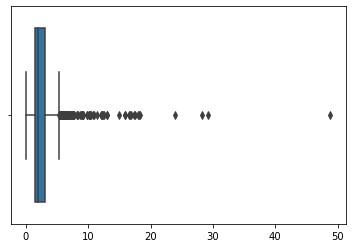

In [93]:
# Tỷ lệ giữa f_Dien_tich_su_dung và f_Dien_tich
sns.boxplot(df['f_Dien_tich_su_dung']/df['f_Dien_tich'])

Nhận xét:
* Tỷ lệ giữa Diện tích sử dụng và Diện tích tối đa là 50 lần
* Nếu New data có mẫu bị vượt quá 50 lần thì cần xem xét có vấn đề gì hay không

In [94]:
# df['comp_Lau_n'] = df['f_Dien_tich_su_dung']/df['f_Dien_tich'] - df['f_Lau_n'] - 1

### Clean Thuộc tính 'Hem_rong' và Thuộc tính 'Duong_mat_tien'

In [95]:
# Kiểm tra missing values
df.loc[df['Hem_rong']==0, ['Hem_rong', 'Duong_mat_tien']]

,Hem_rong,Duong_mat_tien
4,0.0,5.0
5,0.0,12.0
7,0.0,8.0
17,0.0,12.0
19,0.0,16.0
...,...,...
4361,0.0,8.0
4367,0.0,15.0
4376,0.0,18.0
4377,0.0,20.0


In [96]:
# Kiểm tra missing values
df.loc[df['Duong_mat_tien']==0, ['Hem_rong', 'Duong_mat_tien']]

,Hem_rong,Duong_mat_tien
0,5.00,0.0
1,6.10,0.0
2,3.00,0.0
3,5.00,0.0
6,1.50,0.0
...,...,...
4381,2.50,0.0
4382,1.78,0.0
4383,6.00,0.0
4384,1.76,0.0


Nhận xét: dữ liệu hiện tại có đặc tính như sau:
* Nếu là Nhà trong hẻm thì cột "Hem_rong" sẽ có dữ liệu > 0, cột "Duong_mat_tien" = 0
* Nếu là Nhà đường mặt tiền thì cột "Duong_mat_tien" > 0, cột "Hem_rong" = 0
* Do đó, sẽ tạo 2 thuộc tính kiểu Binary để phân loại Nhà hẻm và Nhà mặt tiền, và tạo thêm 1 thuộc tính kiểu float thể hiện độ rộng Lộ giới của nhà

In [97]:
df['f_Nha_hem'] = 1
df.loc[df['Hem_rong']==0, 'f_Nha_hem'] = 0

In [98]:
df['f_Nha_mat_tien'] = 1
df.loc[df['Duong_mat_tien']==0, 'f_Nha_mat_tien'] = 0

In [99]:
df['f_Lo_gioi'] = df['Hem_rong'] + df['Duong_mat_tien']

### Clean Thuộc tính 'Tien_ich'

In [100]:
df.loc[df['Tien_ich'].isna()==False,'Tien_ich']

0       Gần chợ, siêu thị Gần bệnh viện Gần công viên,...
1       Gần chợ, siêu thị Gần công viên, trung tâm Di ...
2        Gần chợ, siêu thị Gần công viên, trung tâm Gầ...
3        Gần chợ, siêu thị Gần bệnh viện Gần công viên...
6       Gần công viên, trung tâm Di chuyển thuận tiện ...
                              ...                        
4379    Gần chợ, siêu thị Gần bệnh viện Gần công viên,...
4380           Gần chợ, siêu thị Gần trường học Hẻm thông
4383     Gần chợ, siêu thị Gần công viên, trung tâm Hẻ...
4384    Gần chợ, siêu thị Gần trường học Di chuyển thu...
4385     Gần chợ, siêu thị Gần trường học Thiết kế thô...
Name: Tien_ich, Length: 3551, dtype: object

Nhận xét:
* Cột 'Tien_ich' có khá nhiều missing values (835/4386 ~ 19%)
* Dữ liệu kiểu text data nên việc clean sẽ mất nhiều thời gian hơn
* Fill missing values không thể áp dụng như kiểu dữ liệu number
* Ngoài ra, đây là thông tin tham khảo, thực tế trang web BĐS nào cũng ghi chú nhiều tiện ích nhưng khó kiểm chứng độ chính xác
* Do đó, không thực hiện clean data và feature engineeing với cột 'Tien_ich" này

### Clean Thuộc tính 'Duong'

In [101]:
# Tạo thuộc tính 'f_Duong'
lst_duong = []
for i in df['Duong']:
    lst_duong.append(no_accent_vietnamese(str.strip(i)))

In [102]:
df['f_Duong'] = lst_duong

In [103]:
# Kiểm tra error values
df[df['f_Duong'].str.contains("\?")]['Duong'].unique()

array(['???ng Nguy?n Th?n Hi?n', '???ng Cách M?ng Tháng Tám',
       '???ng Võ V?n Vân'], dtype=object)

In [104]:
# Thay thế các error values bằng giá trị đúng
df['f_Duong'] = df['f_Duong'].replace(['???ng Nguy?n Th?n Hi?n', '???ng Cach M?ng Thang Tam','???ng Vo V?n Van'],
                           ['Nguyen Than Hien', 'Duong Cach Mang Thang Tam', 'Duong Vo Van Tan'])

In [105]:
df['f_Duong'].sort_values().unique()

array(['31D', 'Ap 1', 'Ap 4', ..., 'Tan Nhieu', 'duong N1',
       'le van duyet'], dtype=object)

### Clean Thuộc tính 'Phuong'

In [106]:
# Tạo thuộc tính 'f_phuong'
lst_phuong = []
for i in df['Phuong']:
    lst_phuong.append(no_accent_vietnamese(str.strip(i)))

In [107]:
df['f_Phuong'] = lst_phuong

In [108]:
# Xem khoảng 20 giá trị đầu tiên
df['f_Phuong'].sort_values().unique()[:20]

array(['Phuong 1', 'Phuong 10', 'Phuong 11', 'Phuong 12', 'Phuong 13',
       'Phuong 14', 'Phuong 15', 'Phuong 16', 'Phuong 17', 'Phuong 18',
       'Phuong 19', 'Phuong 2', 'Phuong 21', 'Phuong 22', 'Phuong 24',
       'Phuong 25', 'Phuong 26', 'Phuong 27', 'Phuong 3', 'Phuong 4'],
      dtype=object)

### Clean Thuộc tính 'Quan'

In [109]:
# Tạo thuộc tính 'f_Quan'
lst_quan = []
for i in df['Quan']:
    lst_quan.append(no_accent_vietnamese(str.strip(i)))

In [110]:
# Tạo thuộc tính 'Quan_1'
df['f_Quan'] = lst_quan

In [111]:
# Xem các unique values
df['f_Quan'].sort_values().unique()

array(['Huyen Binh Chanh', 'Huyen Hoc Mon', 'Huyen Nha Be', 'Quan 1',
       'Quan 10', 'Quan 11', 'Quan 12', 'Quan 2', 'Quan 3', 'Quan 4',
       'Quan 5', 'Quan 6', 'Quan 7', 'Quan 8', 'Quan 9', 'Quan Binh Tan',
       'Quan Binh Thanh', 'Quan Go Vap', 'Quan Phu Nhuan',
       'Quan Tan Binh', 'Quan Tan Phu', 'Quan Thu Duc'], dtype=object)

Tạo thêm thuộc tính mới 'f_Longitude' và 'f_Lattitude'

In [112]:
# Tạo 2 feature mới là Longitude và Lattitude
df = df.merge(dim_longlat, left_on=['f_Duong', 'f_Phuong', 'f_Quan'], 
              right_on=['Duong_dim', 'Phuong_dim', 'Quan_dim'],
             how='left')
df = df.drop(columns=['Duong_dim', 'Phuong_dim', 'Quan_dim'])

In [113]:
df = df.rename(columns={'Longitude': 'f_Longitude',
                  'Latitude': 'f_Latitude'})

In [114]:
df[['f_Longitude', 'f_Latitude']].head()

,f_Longitude,f_Latitude
0,106.739717,10.832494
1,106.632861,10.747484
2,106.685266,10.812869
3,106.753724,10.678279
4,106.800139,10.860037


Tạo thuộc tính 'Location' với nhiều cách kết hợp khác nhau

In [115]:
# Tạo thuộc tính 'Location' với nhiều cách kết hợp khác nhau
df['f_Location_dpq'] = df['f_Duong'] + '_' + df['f_Phuong']  + '_' + df['f_Quan']
df['f_Location_pq'] = df['f_Phuong'] + '_' +  df['f_Quan']
df['f_Location_dp'] = df['f_Duong'] + '_' +  df['f_Phuong']

In [116]:
df['f_Location_dpq'].head()

0    Duong ap Thoi Tay 2_Xa Tan Hiep_Huyen Hoc Mon
1                 Duong Hau Giang_Phuong 11_Quan 6
2    Duong Nguyen Thuong Hien_Phuong 1_Quan Go Vap
3    Duong Huynh Tan Phat_Xa Phu Xuan_Huyen Nha Be
4                  Duong Lo Sieu_Phuong 16_Quan 11
Name: f_Location_dpq, dtype: object

### Clean nhóm Thuộc tính 'Noi_dung'

In [117]:
df['Noi_dung'].head()

0    Bán nhà 134.7m2 Tân Hiệp Hóc Môn. Cách Đỗ Văn ...
1    Bán Nhà Nát Gần Mặt Tiền Đường Hậu Giang P11 Q...
2    Bán nhà riêng Quận Gò Vấp - Nhà còn mới phù hợ...
3    Bán Nhà Hẻm Đường Huỳnh Tấn Phát, xã Phú Xuân ...
4    Bán Nhà Hẻm 3m Lò Siêu, DT: 5,2x10m, Trệt Lửng...
Name: Noi_dung, dtype: object

In [118]:
df['Noi_dung'].tail()

4381    Bán nhà hẻm quận 10 - Hẻm 1 xẹt - Cách mặt tiề...
4382    Bán nhà hẻm đường Điện Biên Phủ, hẻm yên tĩnh,...
4383    Bán nhà riêng Quận 12 - 800m tới Ngã Tư Tô Ký ...
4384    CẦN BÁN NHÀ NGUYÊN CĂN VUÔNG VỨC ĐƯỜNG HUỲNH V...
4385    Bán nhà Quận Gò Vấp - Khu dân cư an ninh - Sổ ...
Name: Noi_dung, dtype: object

Nhận xét:
* Quan sát cấu trúc typing thì khoảng 7 từ đầu tiên có thể có chứa loại hình BĐS. Vì các cột dữ liệu khác chủ yếu nói về kết cấu, vị trí. Nhưng một trong những yêu tố quan trọng nữa là loại hình BĐS
* Do đó, thử tách 10 từ đầu tiên mà distinct để kiểm tra có những loại hình BĐS nào

In [119]:
lst_noidung = []
for i in df['Noi_dung']:
    lst_noidung.append(no_accent_vietnamese(str.strip(i)))

In [120]:
# Tạo thuộc tính 'Quan_1'
df['Noi_dung_clean'] = lst_noidung
df['Noi_dung_clean'] = df['Noi_dung_clean'].str.lower()

In [121]:
# Tách cột 'Noi_dung' dựa trên delimiter là space (' ')
df_noidung = df['Noi_dung_clean'].str.split(" ", expand=True)

In [122]:
df_noidung = df_noidung.iloc[:,0:7]
df_noidung

,0,1,2,3,4,5,6
0,ban,nha,134.7m2,tan,hiep hoc,mon.,cach
1,ban,nha,nat,gan,mat,tien,duong
2,ban,nha,rieng,quan,go,vap,-
3,ban,nha,hem duong,huynh,tan,"phat,",xa
4,ban,nha,hem,3m,lo,"sieu,",dt:
...,...,...,...,...,...,...,...
4381,ban,nha,hem,quan,10,-,hem
4382,ban,nha,hem,duong,dien,bien,"phu,"
4383,ban,nha,rieng,quan,12,-,800m
4384,can,ban,nha,nguyen,can,vuong,vuc


In [123]:
# Kiểm tra unique values của từng cột sau khi tách
for i in df_noidung.columns:
    print('\033[4m'+'Kiểm tra phần tách', str(i) +'\033[0m', ': ', df_noidung[i].sort_values().unique())

Kiểm tra phần tách 0 :  ['-' '-\xa0ban' '1ban' 'a' 'ban' 'ban\xa0' 'ban\xa0biet' 'ban\xa0hai'
 'ban\xa0nha' 'ban\xa0nha\xa0du' 'ban\xa0nha\xa0hem'
 'ban\xa0nha\xa0mat\xa0tien' 'ban\xa0nha\xa0quan' 'ban\xa0nha\xa0rieng'
 'bán' 'biet' 'can' 'chinh' 'chính' 'cho' 'chu' 'hem' 'mua' 'nha'
 'nha\xa004' 'nha\xa0hem' 'nha\xa0hxh,' 'nhà'
 '\u200b\u200b\u200b\u200b\u200b\u200bban'
 '\u200b\u200b\u200b\u200b\u200b\u200b\u200bban'
 '\u200b\u200b\u200b\u200b\u200b\u200b\u200bban\xa0nha']
Kiểm tra phần tách 1 :  ['1' '2' '3' '3.5' '6' 'an' 'an\xa0mega' 'ban' 'ban\xa0co' 'ban\xa0hem'
 'ban\xa0nha' 'ban\xa0quan' 'bán' 'biet' 'can' 'cao' 'cap' 'chinh' 'cho'
 'chu' 'chuban' 'chủ' 'co' 'cu' 'dat' 'day' 'dãy' 'dep' 'dep,' 'duong'
 'full' 'gap' 'gap\xa0nha' 'gáp' 'go' 'goc' 'hai' 'hem' 'hem,'
 'hem\xa0so' 'hem\xa0thong' 'ho' 'hxh' 'hxt' 'khach' 'khu' 'lien' 'lon'
 'mat' 'moi' 'mt' 'nat' 'ngay' 'nguyen' 'nha' 'nha,' 'nha\xa0' 'nha\xa01'
 'nha\xa0100m2' 'nha\xa02' 'nha\xa08.52x7.17m' 'nha\xa081.40m2\x

Nhận xét:
* Dựa trên unique values có thể chọn ra một số keywords để phân loại BĐS

Tạo thuộc tính 'f_Loai_BDS'

In [124]:
# Tạo list keywords phân loại BDS
lst_word = ['villa', 'biet thu', 'shophouse', 'khach san', 'village', 'tro', 'can ho', 'chung cu', 'can', 'nha',  'dat',  'nen']
lst_loai_bds = ['villa', 'biet thu', 'shophouse',  'khach san', 'villa', 'tro', 'chung cu', 'chung cu', 'chung cu', 'nha',  'dat',  'dat' ]

In [125]:
df['f_Loai_BDS'] = 'other'
n = 0
for i in lst_word:
    df.loc[(df['Noi_dung_clean'].str.contains(i)) & (df['f_Loai_BDS']=='other'),'f_Loai_BDS']=lst_loai_bds[n]
    n=n+1

In [126]:
df['f_Loai_BDS'].unique()

array(['nha', 'chung cu', 'tro', 'biet thu', 'villa', 'khach san',
       'shophouse', 'dat', 'other'], dtype=object)

In [127]:
df.loc[df['f_Loai_BDS']=='other', ['Noi_dung_clean', 'f_Loai_BDS']]

,Noi_dung_clean,f_Loai_BDS
1281,ban goc hai mat hem thong thoang quan 10,other
2721,"ban ban hem xe hoi quan tan phu, xung quanh n...",other
3444,ban 6 tang hem 6.5m duong le hong phong p1 qua...,other
3507,ban cao oc 160.4m2 mat tien 10m duong hau gian...,other
4017,a,other


Nhận xét:
* Các Loại BĐS = 'other' chiếm số lượng rất ít, và chủ yếu là do lỗi typing (không ghi rõ nội dung)

In [128]:
df['f_Loai_BDS'].value_counts()

nha          3661
chung cu      455
tro           171
biet thu       64
khach san      16
villa          12
other           5
shophouse       1
dat             1
Name: f_Loai_BDS, dtype: int64

Nhận xét:
* Trong các Loại BĐS thì Nhà chiếm đa số (3661/4386 ~ 83.5%)

# XỬ LÝ DỮ LIỆU THIẾU (MISSING VALUES)

In [129]:
# Xem lại info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4386 entries, 0 to 4385
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4386 non-null   int64  
 1   Noi_dung             4386 non-null   object 
 2   Dia_chi              4386 non-null   object 
 3   Gia                  4386 non-null   object 
 4   Nha_ve_sinh          4386 non-null   object 
 5   So_phong             4386 non-null   object 
 6   Huong                4386 non-null   object 
 7   Chieu_dai            4386 non-null   float64
 8   Rong                 4386 non-null   float64
 9   Giay_to              4386 non-null   object 
 10  Cau_truc             4386 non-null   object 
 11  Dien_tich            4386 non-null   object 
 12  Dien_tich_su_dung    4386 non-null   object 
 13  Hem_rong             4386 non-null   float64
 14  Duong_mat_tien       4386 non-null   float64
 15  Tien_ich             3551 non-null   o

In [130]:
# Các thuộc tính có chưa missing values
df.isna().sum()[df.isna().sum()>0]

Tien_ich         835
f_Gia             82
f_Nha_ve_sinh     11
f_So_phong        78
comp_Gia          82
f_Latitude         7
f_Longitude        7
dtype: int64

Nhận xét:
* Đối với f_Nha_ve_sinh và f_So_phong thì rất khó để fill missing values. Ngoài ra, có mẫu bị missing values không lớn
* Đối với f_Gia: có nhiều cách để xử lý missing values. Trong bài này đã thử 2 cách là: loại bỏ mẫu có missing values và fill bằng f_Dien_tich * f_Don_gia. Tuy nhiên, kết quả training model của cách loại bỏ missing vaules tốt hơn. Do đó, không fill missing values mà sẽ loại bỏ sau khi chọn importance features

In [131]:
# df.loc[df['Gia_1'].isna(), 'Gia_1'] = df.loc[df['Gia_1'].isna(), 'Dien_tich'] * df.loc[df['Gia_1'].isna(), 'Don_gia']

# KHÁM PHÁ DỮ LIỆU (DATA EXPLORATION)

## Xác định các thuộc tính (Variable Identification)

In [132]:
# Danh sách các thuộc tính
df.columns[df.columns.str.contains('f_')]

Index(['f_Gia', 'f_Don_gia', 'f_Nha_ve_sinh', 'f_So_phong', 'f_Huong',
       'f_Chieu_dai', 'f_Rong', 'f_Giay_to', 'f_Phap_ly', 'f_Tang_ham_b',
       'f_Gac_suot_b', 'f_Lau_b', 'f_Lung_b', 'f_Tret_b', 'f_Tang_thuong_b',
       'f_Ap_mai_b', 'f_Tang_ham_n', 'f_Gac_suot_n', 'f_Lau_n', 'f_Lung_n',
       'f_Tret_n', 'f_Tang_thuong_n', 'f_Ap_mai_n', 'f_Dien_tich',
       'f_Dien_tich_cal', 'f_Gia_cal', 'f_Dien_tich_su_dung', 'f_Nha_hem',
       'f_Nha_mat_tien', 'f_Lo_gioi', 'f_Duong', 'f_Phuong', 'f_Quan',
       'f_Latitude', 'f_Longitude', 'f_Location_dpq', 'f_Location_pq',
       'f_Location_dp', 'f_Loai_BDS'],
      dtype='object')

In [133]:
# Xác định inputs/outputs
lst_output = ['f_Gia']
lst_input = ['f_Nha_ve_sinh', 'f_So_phong', 'f_Huong',
       'f_Chieu_dai', 'f_Rong', 'f_Giay_to', 'f_Phap_ly', 'f_Tang_ham_b',
       'f_Gac_suot_b', 'f_Lau_b', 'f_Lung_b', 'f_Tret_b', 'f_Tang_thuong_b',
       'f_Ap_mai_b', 'f_Tang_ham_n', 'f_Gac_suot_n', 'f_Lau_n', 'f_Lung_n',
       'f_Tret_n', 'f_Tang_thuong_n', 'f_Ap_mai_n', 'f_Dien_tich',
       'f_Dien_tich_cal', 'f_Gia_cal', 'f_Dien_tich_su_dung', 'f_Nha_hem',
       'f_Nha_mat_tien', 'f_Lo_gioi', 'f_Duong', 'f_Phuong', 'f_Quan',
       'f_Latitude', 'f_Longitude', 'f_Location_dpq', 'f_Location_pq',
       'f_Location_dp', 'f_Loai_BDS']

## List input sẽ không bao gồm thuộc tính f_Don_gia

## Phân tích đơn biến (Univariable Analysis)

In [134]:
lst_phanloai = ['f_Huong',
       'f_Giay_to', 'f_Phap_ly', 'f_Tang_ham_b',
       'f_Gac_suot_b', 'f_Lau_b', 'f_Lung_b', 'f_Tret_b', 'f_Tang_thuong_b',
       'f_Ap_mai_b', 'f_Tang_ham_n', 'f_Gac_suot_n', 'f_Lau_n', 'f_Lung_n',
       'f_Tret_n', 'f_Tang_thuong_n', 'f_Ap_mai_n', 
       'f_Nha_hem',
       'f_Nha_mat_tien', 'f_Duong', 'f_Phuong', 'f_Quan',
       'f_Location_dpq', 'f_Location_pq',
       'f_Location_dp', 'f_Loai_BDS']
lst_lientuc = ['f_Nha_ve_sinh', 'f_So_phong',
       'f_Chieu_dai', 'f_Rong', 
       'f_Tang_ham_n', 'f_Gac_suot_n', 'f_Lau_n', 'f_Lung_n',
       'f_Tret_n', 'f_Tang_thuong_n', 'f_Ap_mai_n', 'f_Dien_tich',
       'f_Dien_tich_su_dung', 
       'f_Lo_gioi', 
       'f_Latitude', 'f_Longitude']

Nhận xét: Một số thuộc tính sẽ để ở cả nhóm Phân loại và nhóm Liên lục để kiểm tra: 'f_Tang_ham_n', 'f_Gac_suot_n', 'f_Lau_n', 'f_Lung_n', 'f_Tret_n', 'f_Tang_thuong_n', 'f_Ap_mai_n'

### 1. Phân tích biến liên tục (Continious field)

In [135]:
# print(df[lst_lientuc+lst_output].describe())
# for i in range(len(lst_lientuc+lst_output)):
#     print("\nGiá trị thống kê của", (lst_lientuc+lst_output)[i],":\n",stats.describe(df[(lst_lientuc+lst_output)[i]].dropna()))

In [136]:
def continous_feature_describe(lst_cols, df):
    col_ = []
    count_ = []
    min_ = []
    max_ = []
    mean_ = []
    std_ = []
    var_ = []
    skewness_ = []
    kurtosis_ = []
    do_lech = []
    do_nhon = []

    for i in lst_cols:
        col_.append(i)
        count_.append(df[i].count())
        min_.append(df[i].min())
        max_.append(df[i].max())
        mean_.append(df[i].mean())
        std_.append(df[i].std())
        var_.append(df[i].var())
        skewness_.append(df[i].skew())
        kurtosis_.append(df[i].kurtosis())
        
        if df[i].skew() > 0: do_lech.append('lech phai')
        elif df[i].skew() < 0: do_lech.append('lech trai')
        else: do_lech.append('doi xung')
            
        if df[i].kurtosis() > 0: do_nhon.append('nhon hon PP chuan')
        elif df[i].kurtosis() < 0: do_nhon.append('bet hon PP chuan')
        else: do_nhon.append('tuong duong PP chuan')

    df_describe = pd.DataFrame({'feature_name': col_,
                               'count': count_,
                               'min': min_,
                               'max': max_,
                               'mean': mean_,
                               'std': std_,
                               'var': var_,
                                'skewness': skewness_,
                                'kurtosis': kurtosis_,
                                'do_lech': do_lech,
                                'do_nhon': do_nhon
                               })
    return df_describe

In [137]:
# Các chỉ số mô tả thuộc tính output và input liên tục
lst_cols = lst_lientuc+lst_output
continous_feature_describe(lst_cols, df)

,feature_name,count,min,max,mean,std,var,skewness,kurtosis,do_lech,do_nhon
0,f_Nha_ve_sinh,4375,1.000000,85.000000,3.445943,3.653329,1.334681e+01,8.406770,123.590701,lech phai,nhon hon PP chuan
1,f_So_phong,4308,1.000000,84.000000,3.732591,3.645224,1.328766e+01,8.378962,121.914960,lech phai,nhon hon PP chuan
2,f_Chieu_dai,4386,1.000000,101.460000,14.452971,6.956114,4.838753e+01,2.030289,12.085394,lech phai,nhon hon PP chuan
3,f_Rong,4386,0.750000,30.340000,4.679051,2.225326,4.952076e+00,3.779725,22.584385,lech phai,nhon hon PP chuan
4,f_Tang_ham_n,4386,0.000000,1.000000,0.008892,0.093888,8.814872e-03,10.466395,107.594495,lech phai,nhon hon PP chuan
5,f_Gac_suot_n,4386,0.000000,1.000000,0.010716,0.102973,1.060350e-02,9.507460,88.432128,lech phai,nhon hon PP chuan
6,f_Lau_n,4386,0.000000,22.000000,1.498404,1.042155,1.086086e+00,2.242306,34.852518,lech phai,nhon hon PP chuan
7,f_Lung_n,4386,0.000000,1.000000,0.234610,0.423803,1.796092e-01,1.252992,-0.430208,lech phai,bet hon PP chuan
8,f_Tret_n,4386,0.000000,1.000000,0.997036,0.054368,2.955865e-03,-18.292524,332.768187,lech trai,nhon hon PP chuan
9,f_Tang_thuong_n,4386,0.000000,1.000000,0.274738,0.446433,1.993024e-01,1.009625,-0.981105,lech phai,bet hon PP chuan


Nhận xét:
* Thuộc tính f_Dien_tich và f_Dien_tich_su_dung có range biến động rất lớn => Có thể quan sát thêm biểu đồ phân phối để lựa chọn Phạm vi bài toán. Vì nếu diện tích lớn thì có thể không phải là nhà, mà là đất hoặc khách sạn, villa, ...
* Thuộc tính f_So_phong và f_Nha_ve_sinh cũng có range biến động lớn => Thường thường số phòng/nhà vệ sinh khoảng > 10 thì thiên về loại hình BĐS là khách sạn hoặc nhà trọ
* Ngoại trừ f_Longitude và f_Latitude thì tất cả các thuộc tính hầu hết đều nhọn hơn PP chuẩn và lệch phải => Có thể thấy về độ phân tán của dữ liệu là: đa số tập trung ở giá trị nhỏ, giá trị càng lớn thì độ phân tán càng xa và thưa
* Đối với dữ liệu có độ phân tán như vậy thì rất khó sử dụng Linear Regression

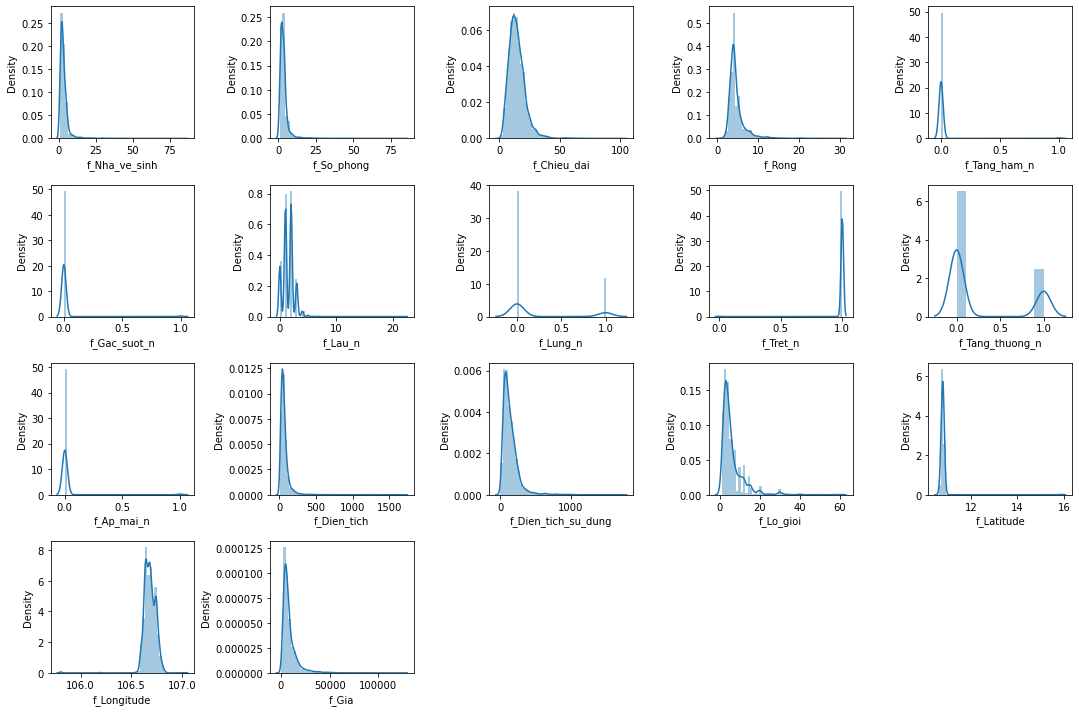

In [138]:
# Biểu đồ phân phối
plt.figure(figsize=(15,10))
n=0
for i in (lst_lientuc+lst_output):
    n=n+1
    plt.subplot(4,5,n)
    sns.distplot(df[i].dropna())
plt.tight_layout()
plt.show()

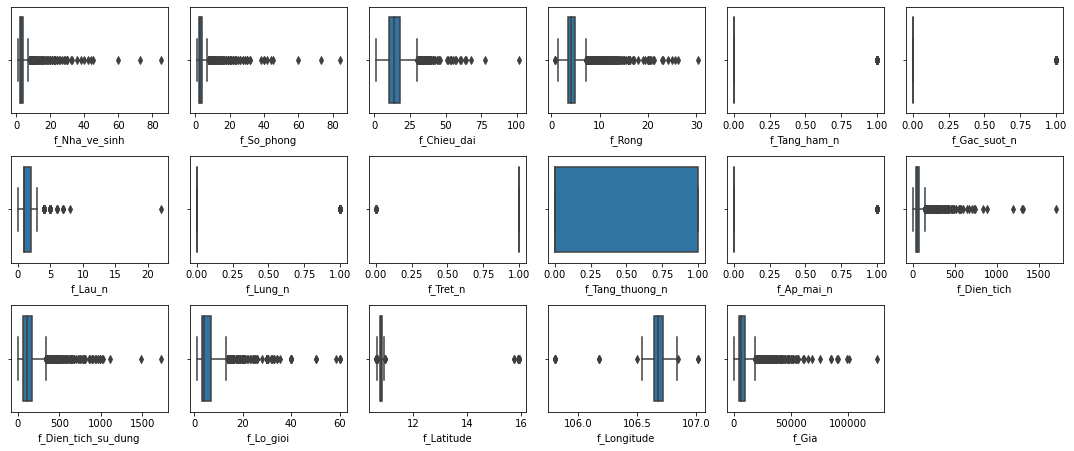

In [139]:
# Biểu đồ boxplot
plt.figure(figsize=(15,8))
n=0
for i in (lst_lientuc+lst_output):
    n=n+1
    plt.subplot(4,6,n)
    sns.boxplot(df[i].dropna())
plt.tight_layout()
plt.show()

Nhận xét:
* Quan sát thêm biểu đồ phân phối và biểu đồ boxplot thì cũng dẫn tới kết luận dữ liệu (đặc biệt là các thuộc tính f_Nha_ve_sinh, f_So_phong, f_Chieu_dai, f_Chieu_rong, f_Dien_tich, f_Dien_tich_su_dung và f_Gia bị lệch phải rất nhiều. Các giá trị ở phần đuôi bên phải cũng dày, liên tục và phân tán rất xa.

In [140]:
# # Phân tích phân phối của f_Dien_tich
# Q1 = df['f_Dien_tich'].quantile(0.25)
# Q3 = df['f_Dien_tich'].quantile(0.75)
# IQR = Q3 - Q1
# print('Cận dưới (f_Dien_tich)', Q1 - 1.5*IQR)
# print('Cận trên (f_Dien_tich)', Q3 + 1.5*IQR)

Cận dưới (f_Dien_tich) -28.89999999999999
Cận trên (f_Dien_tich) 145.5


### 2. Phân tích biến phân loại (Categorical field)

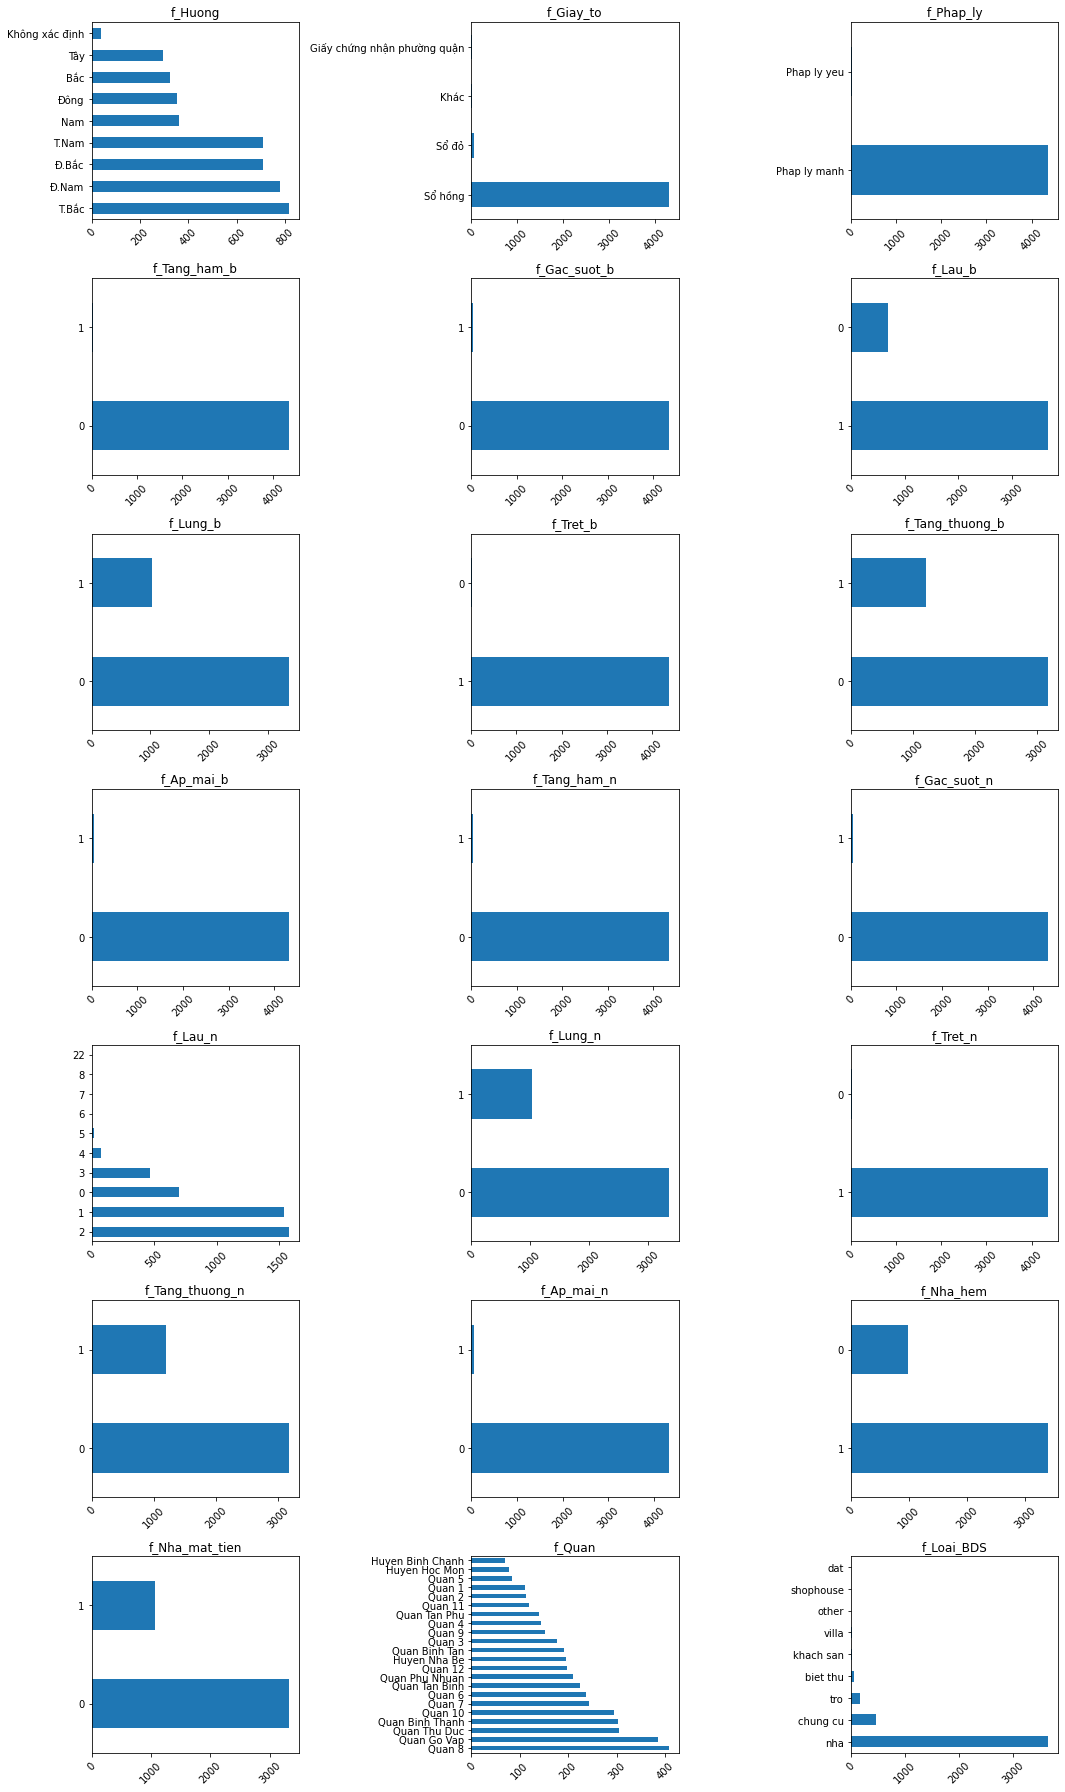

In [141]:
# Biểu đồ barchart
lst_phanloai_1 = ['f_Huong',
       'f_Giay_to', 'f_Phap_ly', 'f_Tang_ham_b',
       'f_Gac_suot_b', 'f_Lau_b', 'f_Lung_b', 'f_Tret_b', 'f_Tang_thuong_b',
       'f_Ap_mai_b', 'f_Tang_ham_n', 'f_Gac_suot_n', 'f_Lau_n', 'f_Lung_n',
       'f_Tret_n', 'f_Tang_thuong_n', 'f_Ap_mai_n', 
       'f_Nha_hem',
       'f_Nha_mat_tien', 'f_Quan',
       'f_Loai_BDS']
plt.figure(figsize=(15,25))
n=0
for i in lst_phanloai_1:
    n=n+1
    plt.subplot(7,3,n)
    df[i].dropna().value_counts().plot.barh()
    plt.title(i)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Nhận xét:
* Quan sát barchart có thể dự đoán một số thuộc tính có value_counts quá chênh lệch, đa số lệch về 1 giá trị nào đó áp đảo: f_Giay_to, f_Phap_ly, f_Tang_ham_b, f_Gac_suot_b, f_Tret_b, f_Ap_mai_b, f_Tang_ham_n, f_Gac_suot_n, f_Tret_n, f_Ap_mai_n, f_Loai_BDS.
* Các thuộc tính còn lại sẽ phân tích thên tương quan với thuộc tính output f_Gia trước khi quyết định loại bỏ tiếp.

## Phân tích hai biến (Bi-variable Analysis)

### 1.Biến liên tục và Biến liên tục (Continious & Continious)

In [142]:
# Ma trận hệ số tương quan
df[lst_output + lst_lientuc].corr()

,f_Gia,f_Nha_ve_sinh,f_So_phong,f_Chieu_dai,f_Rong,f_Tang_ham_n,f_Gac_suot_n,f_Lau_n,f_Lung_n,f_Tret_n,f_Tang_thuong_n,f_Ap_mai_n,f_Dien_tich,f_Dien_tich_su_dung,f_Lo_gioi,f_Latitude,f_Longitude
f_Gia,1.000000,0.453928,0.482501,0.500938,0.410005,0.243994,-0.019437,0.328723,0.058786,-0.033260,0.138247,0.016138,0.564495,0.545002,0.343202,0.014411,0.012664
f_Nha_ve_sinh,0.453928,1.000000,0.957279,0.290027,0.252363,0.165501,-0.021826,0.409044,0.109148,-0.055414,0.217755,0.017438,0.292942,0.537627,0.094208,-0.001740,0.040140
f_So_phong,0.482501,0.957279,1.000000,0.316332,0.256796,0.168346,-0.012814,0.382488,0.106126,-0.057447,0.182533,0.003102,0.322323,0.528830,0.100793,-0.000592,0.034457
f_Chieu_dai,0.500938,0.290027,0.316332,1.000000,0.223390,0.085304,0.019825,-0.027404,-0.022418,-0.060537,0.030457,-0.025382,0.704714,0.401832,0.221331,0.019148,0.009947
f_Rong,0.410005,0.252363,0.256796,0.223390,1.000000,0.056297,-0.015162,-0.037271,-0.012655,-0.028373,-0.030961,0.010862,0.642307,0.306758,0.063414,0.010695,0.042107
f_Tang_ham_n,0.243994,0.165501,0.168346,0.085304,0.056297,1.000000,0.013730,0.148146,0.033530,0.005164,0.050519,0.008728,0.096621,0.189571,0.047634,-0.007673,0.025327
f_Gac_suot_n,-0.019437,-0.021826,-0.012814,0.019825,-0.015162,0.013730,1.000000,-0.105032,-0.015816,0.005675,-0.054135,0.005802,-0.000084,-0.037924,-0.035405,-0.009903,-0.006746
f_Lau_n,0.328723,0.409044,0.382488,-0.027404,-0.037271,0.148146,-0.105032,1.000000,-0.077377,0.078402,0.368321,0.040329,-0.058040,0.382808,0.152453,-0.010764,-0.014621
f_Lung_n,0.058786,0.109148,0.106126,-0.022418,-0.012655,0.033530,-0.015816,-0.077377,1.000000,0.030187,0.078702,0.017880,-0.028599,0.067857,0.011422,0.022342,-0.023621
f_Tret_n,-0.033260,-0.055414,-0.057447,-0.060537,-0.028373,0.005164,0.005675,0.078402,0.030187,1.000000,0.033558,0.006635,-0.061309,0.006426,0.011732,0.003636,0.001834


Nhận xét:
* Một số biến có loại bỏ vì gần như không tương quá với f_gia: f_Gac_suot_n, f_Lung_n, f_Tret_n, f_Tang_thuong_n, f_Ap_mai_n, f_Latitude, f_Longitude

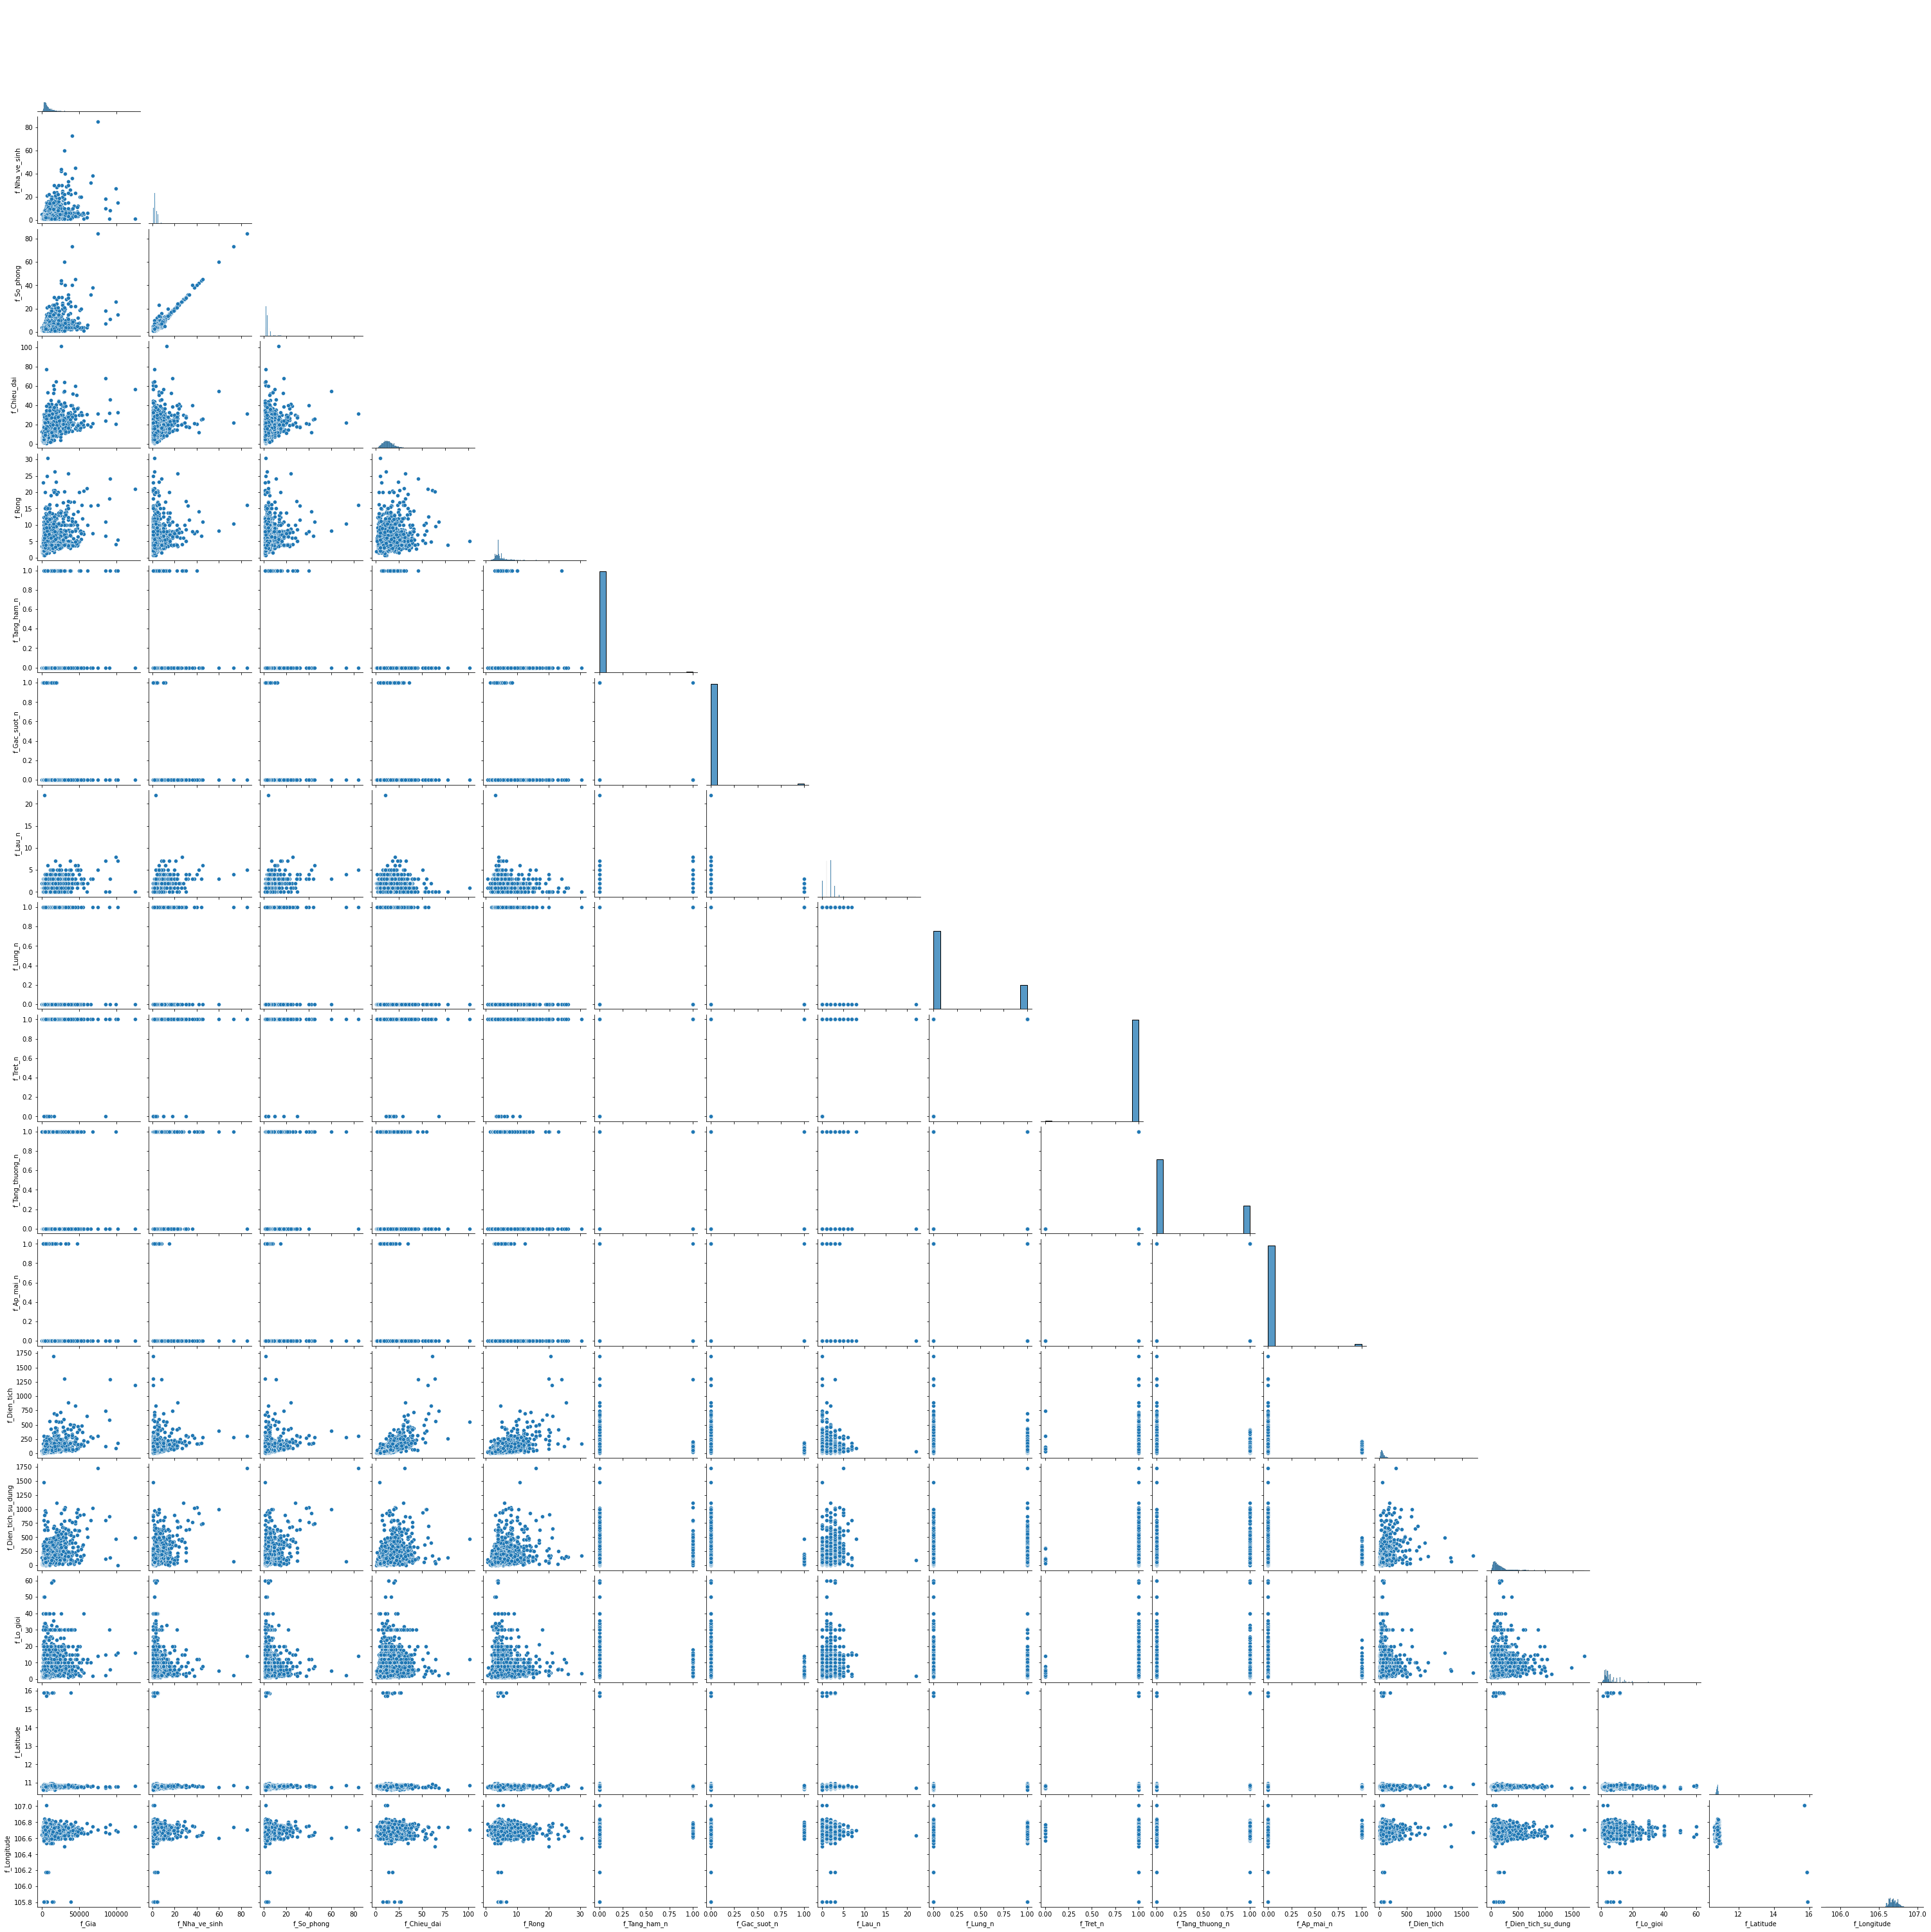

In [143]:
# Biểu đồ tương quan
sns.pairplot(df[lst_output + lst_lientuc], corner = True)

- Tương quan mạnh: []


- Tương quan yếu: [['f_Nha_ve_sinh', 'f_Gia'], ['f_So_phong', 'f_Gia'], ['f_Chieu_dai', 'f_Gia'], ['f_Rong', 'f_Gia'], ['f_Lau_n', 'f_Gia'], ['f_Dien_tich', 'f_Gia'], ['f_Dien_tich_su_dung', 'f_Gia'], ['f_Lo_gioi', 'f_Gia']]


- Không tương quan: [['f_Tang_ham_n', 'f_Gia'], ['f_Gac_suot_n', 'f_Gia'], ['f_Lung_n', 'f_Gia'], ['f_Tret_n', 'f_Gia'], ['f_Tang_thuong_n', 'f_Gia'], ['f_Ap_mai_n', 'f_Gia'], ['f_Latitude', 'f_Gia'], ['f_Longitude', 'f_Gia']]


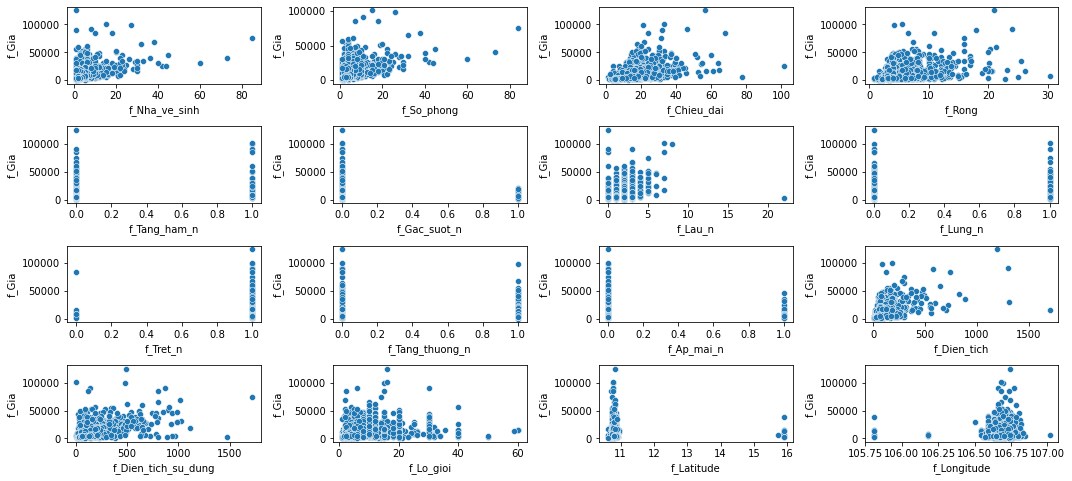

- Kết luận: Các thuộc tính liên tục có tương quan với thuộc tính output ( f_Gia ): ['f_So_phong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 'f_Lo_gioi', 'f_Nha_ve_sinh', 'f_Lau_n', 'f_Rong', 'f_Chieu_dai']


In [144]:
#1.1. Biến inputs liên tục với biến output liên tục
j = 'f_Gia'
pair1 = []
pair2 = []
pair3 = []

for i in lst_lientuc:
    corr = abs((df[[i,j]].dropna().corr().loc[[i],[j]]).values[0][0])
    if corr >= 0.6:
        pair1.append([i,j])
    elif corr >= 0.3:
        pair2.append([i,j])
    else: 
        pair3.append([i,j])
print('- Tương quan mạnh:', pair1)
print('\n')
print('- Tương quan yếu:', pair2)
print('\n')
print('- Không tương quan:', pair3)

### Biểu đồ regression plot
n=0
plt.figure(figsize=(15,8))
for i in lst_lientuc:
    n = n+1
    plt.subplot(5,4,n)
#     sns.regplot(data=df[[i,j]].dropna(how='any'), x=i, y=j)
    sns.scatterplot(data=df[[i,j]].dropna(how='any'), x=i, y=j)
plt.tight_layout()
plt.show()
    
# lst_lientuc_chosen = list(set([item for sublist in (pair1 + pair2) for item in sublist]))
lst_lientuc_chosen = list(set([item for sublist in (pair1 + pair2) for item in sublist]))
lst_lientuc_chosen.remove(j)
print('- Kết luận: Các thuộc tính liên tục có tương quan với thuộc tính output (', j, '):', lst_lientuc_chosen)

In [145]:
#1.2. Tương quan giữa các biến inputs liên tục

pair1 = []
pair2 = []
pair3 = []
pair4 = []

for i in lst_lientuc:
    for j in lst_lientuc[lst_lientuc.index(i)+1:]:
        corr = abs((df[[i,j]].corr().loc[[i],[j]]).values[0][0])
        if corr >= 0.9:
            pair1.append([i,j])         
        elif corr >= 0.6:
            pair2.append([i,j])          
            
        elif corr >= 0.3:
            pair3.append([i,j])
        else: 
            pair4.append([i,j])

print('- Tương quan rất mạnh (>0.9):', pair1)
print('\n')
print('- Tương quan mạnh (>0.6):', pair2)
print('\n')
print('- Tương quan yếu (>0.3):', pair3)

- Tương quan rất mạnh (>0.9): [['f_Nha_ve_sinh', 'f_So_phong']]


- Tương quan mạnh (>0.6): [['f_Chieu_dai', 'f_Dien_tich'], ['f_Rong', 'f_Dien_tich']]


- Tương quan yếu (>0.3): [['f_Nha_ve_sinh', 'f_Lau_n'], ['f_Nha_ve_sinh', 'f_Dien_tich_su_dung'], ['f_So_phong', 'f_Chieu_dai'], ['f_So_phong', 'f_Lau_n'], ['f_So_phong', 'f_Dien_tich'], ['f_So_phong', 'f_Dien_tich_su_dung'], ['f_Chieu_dai', 'f_Dien_tich_su_dung'], ['f_Rong', 'f_Dien_tich_su_dung'], ['f_Lau_n', 'f_Tang_thuong_n'], ['f_Lau_n', 'f_Dien_tich_su_dung'], ['f_Dien_tich', 'f_Dien_tich_su_dung'], ['f_Latitude', 'f_Longitude']]


Nhận xét:
* Các cặp thuộc tính input kiểu liên tục có tương quan MẠNH (>0.9) sẽ ảnh hưởng đến hiệu suất mô hình và cần loại bỏ 1 trong 2. Ở đây thuộc tính f_So_phong có missing values nhiều hơn nên sẽ bỏ thuộc tính f_So_phong
* Các cặp thuộc tính input kiểu liên tục có lương quan MẠNH và YẾU còn lại sẽ loại bỏ tuỳ thuộc vào hiệu suất của mô hình

### Một số mẫu cần xem xét về tính hợp lý

In [146]:
# Các mẫu có số Lầu >= 5 nhưng Giá <= 20 tỷ:
df.loc[(df['f_Lau_n']>=5) & (df['f_Gia']<=20000),['f_Lau_n','f_Gia', 'f_Quan', 'f_Phuong', 'f_Duong', 
                                                  'f_Loai_BDS','f_Nha_mat_tien']]

,f_Lau_n,f_Gia,f_Quan,f_Phuong,f_Duong,f_Loai_BDS,f_Nha_mat_tien
369,5,11000.0,Quan 10,Phuong 13,Duong Cach Mang Thang Tam,nha,0
1774,7,18000.0,Quan 6,Phuong 10,Duong Lo C Cu Xa Phu Lam D,khach san,0
2685,22,3100.0,Quan 8,Phuong 15,Duong Me Coc,nha,0
2722,5,15000.0,Quan 7,Phuong Tan Thuan Tay,Duong Nguyen Van Linh,nha,1
3444,5,13200.0,Quan 10,Phuong 1,Duong Le Hong Phong,other,0
3526,5,14800.0,Quan 10,Phuong 6,Duong Tan Phuoc,nha,0
3846,6,7850.0,Quan Go Vap,Phuong 14,Duong So 59,tro,0


In [147]:
df.loc[(df['f_Quan']=='Quan 8') & (df['f_Duong']=='Duong Me Coc'),['f_Lau_n','f_Gia', 'f_Quan', 'f_Phuong', 'f_Duong', 
                                                  'f_Loai_BDS','f_Nha_mat_tien']]

,f_Lau_n,f_Gia,f_Quan,f_Phuong,f_Duong,f_Loai_BDS,f_Nha_mat_tien
42,1,9800.0,Quan 8,Phuong 15,Duong Me Coc,nha,0
162,1,2900.0,Quan 8,Phuong 15,Duong Me Coc,nha,0
315,2,5300.0,Quan 8,Phuong 15,Duong Me Coc,nha,1
420,2,2200.0,Quan 8,Phuong 15,Duong Me Coc,nha,0
515,0,2650.0,Quan 8,Phuong 15,Duong Me Coc,nha,0
524,2,2300.0,Quan 8,Phuong 15,Duong Me Coc,nha,0
829,1,2400.0,Quan 8,Phuong 15,Duong Me Coc,nha,0
929,2,4200.0,Quan 8,Phuong 15,Duong Me Coc,nha,0
938,2,1800.0,Quan 8,Phuong 15,Duong Me Coc,nha,0
1398,2,3750.0,Quan 8,Phuong 15,Duong Me Coc,nha,0


Nhận xét:
* Quan sát dữ liệu có thể thấy mẫu có index = 2685 không hợp lý, vì số tầng lầu là 22 nhưng chỉ có giá 3.1 tỷ
* Lọc các BĐS cũng là nhà trên đường Mê Cóc, Quận 8 thì với giá khoảng 3 tỷ sẽ có 1-2 Lầu mà thôi
* Do đó, sẽ loại bỏ mẫu này (loại tại bước Feature selection phía dưới)

### 2. Biến liên tục và Biến phân loại (Continious & Categorical)

In [148]:
# 2.1. Giữa biến output liên tục và biến inputs phân loại
## Tạo chuỗi
prob = 0.95
alpha = 1.0 - prob
string = []
for i in lst_phanloai:
    t = 'C(' + i + ')'
    string.append(t)
string = '+'.join(string)

## ANOVA và chọn biến inputs phân loại có ảnh hưởng lớn đến biến output
print('Kiểm định ANONA giữa thuộc tính f_Gia và các thuộc tính phân loại:')
model = ols('f_Gia ~ ' + string, data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print('='*65)
print(aov_table)
print('\n')

print('Các thuộc tính có ảnh hướng đáng kể dến thuộc tính f_Gia:')
aov_table1 = aov_table[aov_table['PR(>F)'] < alpha]
print('='*57)
print(aov_table1)
print('\n')

lst_phanloai_chosen = aov_table1.index.str.extract('(C\()(\w+)')[1].to_list()
print('- Kết luận: Các thuộc tính phân loại có ảnh hướng đáng kể dến thuộc tính output (f_Gia):', lst_phanloai_chosen)

Kiểm định ANONA giữa thuộc tính f_Gia và các thuộc tính phân loại:
                          sum_sq      df           F         PR(>F)
C(f_Huong)          2.878948e+08     8.0    1.241096   2.706118e-01
C(f_Giay_to)        1.345940e+08     3.0    1.547270   2.002679e-01
C(f_Phap_ly)        5.855450e+07     1.0    2.019398   1.554246e-01
C(f_Tang_ham_b)     2.646404e+08     1.0    9.126782   2.544292e-03
C(f_Gac_suot_b)     2.510065e+07     1.0    0.865659   3.522492e-01
C(f_Lau_b)          4.778249e+09     1.0  164.789792   1.391899e-36
C(f_Lung_b)         2.242190e+07     1.0    0.773275   3.792897e-01
C(f_Tret_b)         1.734477e+08     1.0    5.981776   1.452248e-02
C(f_Tang_thuong_b)  2.294425e+08     1.0    7.912895   4.946450e-03
C(f_Ap_mai_b)       5.800800e+07     1.0    2.000550   1.573658e-01
C(f_Tang_ham_n)     2.646404e+08     1.0    9.126782   2.544292e-03
C(f_Gac_suot_n)     2.510065e+07     1.0    0.865659   3.522492e-01
C(f_Lau_n)          1.593097e+10     9.0   61.046

### 3. Biến phân loại và Biến phân loại (Categorical & Categorical)

In [149]:
# Kiểm tra mức độ phụ thuộc
prob = 0.95
alpha = 1.0 - prob

lst_phanloai_1 = ['f_Huong',
       'f_Giay_to', 'f_Phap_ly', 
       'f_Lau_n', 
       'f_Nha_hem',
       'f_Nha_mat_tien', 
       'f_Quan', 'f_Loai_BDS']

pair1 = []
pair2 = []

for i in lst_phanloai_1:
    for j in lst_phanloai_1[lst_phanloai_1.index(i)+1:]:
        crosstab = pd.crosstab(df[i], df[j])
        stat, p, dof, expected = chi2_contingency(crosstab)
#         critical = chi2.ppf(prob, dof)

        if p <= alpha:
            pair1.append([i,j])
        else:
            pair2.append([i,j])
    
print('- Phụ thuộc nhau (reject H0):',pair1)
print('\n')
print('- Độc lập nhau (fail to reject H0):',pair2)
# print('\n')
# sl_phuthuoc = pd.DataFrame([item for sublist in (pair1) for item in sublist]).value_counts()
# print('- Số lượng biến phân loại phụ thuộc nhau:')
# print(sl_phuthuoc)

- Phụ thuộc nhau (reject H0): [['f_Huong', 'f_Giay_to'], ['f_Huong', 'f_Phap_ly'], ['f_Huong', 'f_Quan'], ['f_Giay_to', 'f_Phap_ly'], ['f_Giay_to', 'f_Nha_hem'], ['f_Giay_to', 'f_Nha_mat_tien'], ['f_Giay_to', 'f_Quan'], ['f_Phap_ly', 'f_Nha_hem'], ['f_Phap_ly', 'f_Nha_mat_tien'], ['f_Phap_ly', 'f_Quan'], ['f_Lau_n', 'f_Nha_hem'], ['f_Lau_n', 'f_Nha_mat_tien'], ['f_Lau_n', 'f_Quan'], ['f_Lau_n', 'f_Loai_BDS'], ['f_Nha_hem', 'f_Nha_mat_tien'], ['f_Nha_hem', 'f_Quan'], ['f_Nha_hem', 'f_Loai_BDS'], ['f_Nha_mat_tien', 'f_Quan'], ['f_Nha_mat_tien', 'f_Loai_BDS'], ['f_Quan', 'f_Loai_BDS']]


- Độc lập nhau (fail to reject H0): [['f_Huong', 'f_Lau_n'], ['f_Huong', 'f_Nha_hem'], ['f_Huong', 'f_Nha_mat_tien'], ['f_Huong', 'f_Loai_BDS'], ['f_Giay_to', 'f_Lau_n'], ['f_Giay_to', 'f_Loai_BDS'], ['f_Phap_ly', 'f_Lau_n'], ['f_Phap_ly', 'f_Loai_BDS']]


# DEEPER DATA EXPLORATION
Phân tích sâu hơn các thuộc tính liên quan đến location:

* Như đã nhận xét ở phần đầu, các thuộc tính 'f_Phuong', 'f_Duong' (trước khi clean data chính là cột 'Phuong', 'Duong')
chứa rất nhiều unique values (142 unique values đổi với 'Phuong' và 1044 unique values đối với 'Duong'). 
* Ngoài ra, các unique values có thể trùng tên nhưng bản chất thực tế khác nhau: Ví dụ: Phường 1 thuộc Quận 3 khác với Phường 1 thuộc Quận 10, Quận 11, Quận 8, Quận 6, ...
* Về mặt domain knowledge, các thuộc tính về location có ảnh hưởng lớn đến Giá BĐS. Ở những location đắc địa, Đơn giá nhà sẽ cao hơn. Do đó, 2 Nhà có cùng chung các đặc điểm, Nhà nào ở location đắc địa hơn thì Đơn giá sẽ cao hơn, dẫn đến Giá cả cũng cao hơn.
* Thực tế kiểm định ANOVA phía trên cũng khẳng định các thuộc tính location có tương quan khá lớn với thuộc tính f_Gia.

In [150]:
len(df['f_Location_dpq'].unique())

1772

In [151]:
len(df['f_Location_dp'].unique())

1748

In [152]:
len(df['f_Location_pq'].unique())

287

* Tuy nhiên, nếu ghép f_Duong, f_Phuong, f_Quan 1 cách đơn thuần, thì sẽ tạo ra các feature về location có số lượng unique values rất lớn
* Do đó, sẽ phân tích sâu hơn các thuộc tính liên quan đến location và gom nhóm để giảm số lượng unique values
* Thuộc tính f_Don_giá sẽ không sử dụng trong Training model, tuy nhiên có thể sử dụng để gom nhóm các thuộc tính location. Về bản chất location là thuộc tính category. Nên khi gom nhóm các Đường, Phường, Quận nào chung 1 nhóm thì có thể lưu lại để sử dụng cho New data

### Biểu đồ mối quan hệ giữa các thuộc tính location với Đơn giá

In [153]:
# Mối quan hệ giữa 'f_Gia' và 'f_Loai_BDS'
# plt.figure(figsize=(10,5))
# sns.boxplot(data=df, x='f_Loai_BDS', y='f_Gia')
# plt.show()

In [154]:
data = df.loc[df['f_Loai_BDS'] == 'nha', ['f_Quan', 'f_Phuong', 'f_Duong', 'f_Don_gia', 'f_Gia']].dropna(how='any')

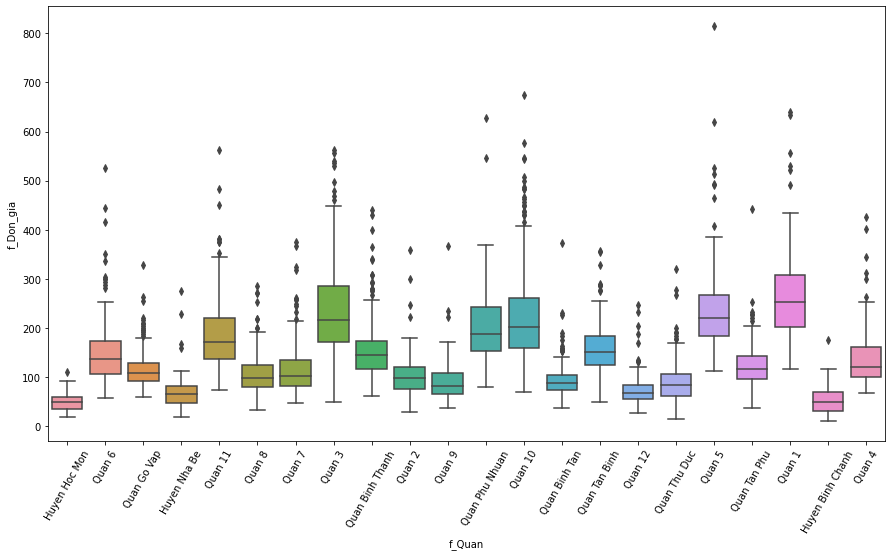

In [155]:
# Mối quan hệ giữa 'f_Don_Gia' và các thuộc tính 'f_Quan'
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='f_Quan', y='f_Don_gia')
plt.xticks(rotation=60)
plt.show()

Nhận xét:
* Giữa các Quận có sự chênh lệch về Đơn giá
* Tuy nhiên trong mỗi Quận có thể có Đơn giá cũng không đồng đều. Do đó, cần xem tiếp các Phường trong mỗi Quận

In [156]:
data['f_Quan'].sort_values().unique()

array(['Huyen Binh Chanh', 'Huyen Hoc Mon', 'Huyen Nha Be', 'Quan 1',
       'Quan 10', 'Quan 11', 'Quan 12', 'Quan 2', 'Quan 3', 'Quan 4',
       'Quan 5', 'Quan 6', 'Quan 7', 'Quan 8', 'Quan 9', 'Quan Binh Tan',
       'Quan Binh Thanh', 'Quan Go Vap', 'Quan Phu Nhuan',
       'Quan Tan Binh', 'Quan Tan Phu', 'Quan Thu Duc'], dtype=object)

Huyen Binh Chanh


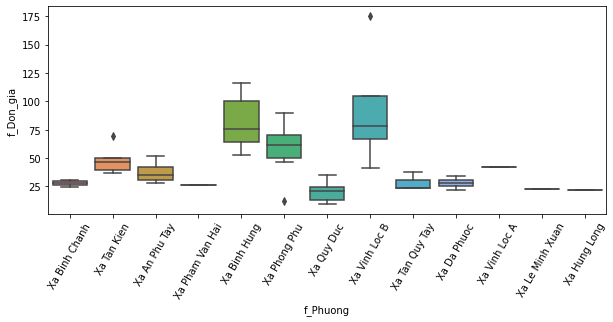

Huyen Hoc Mon


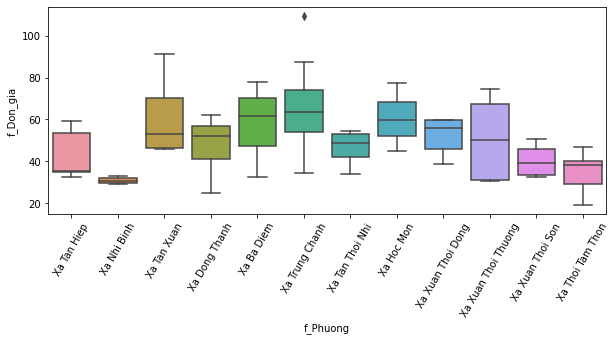

Huyen Nha Be


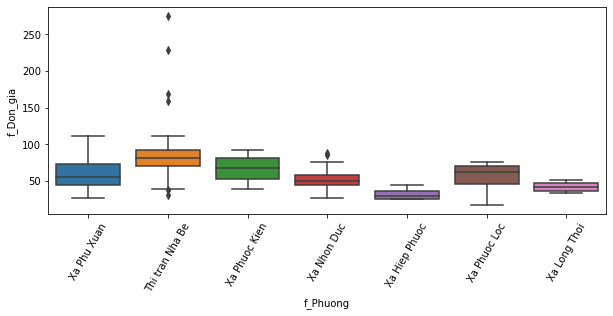

Quan 1


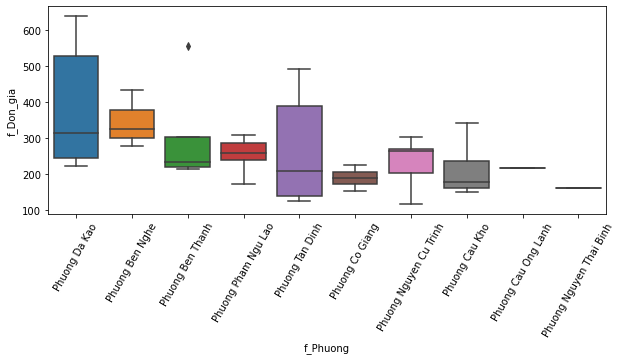

Quan 10


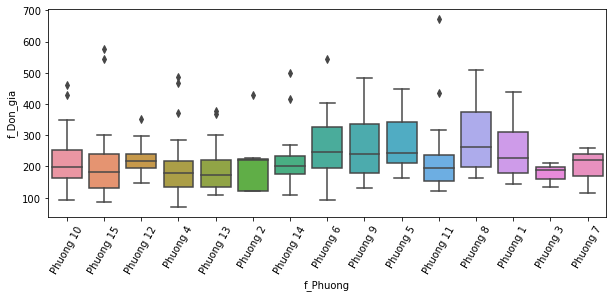

Quan 11


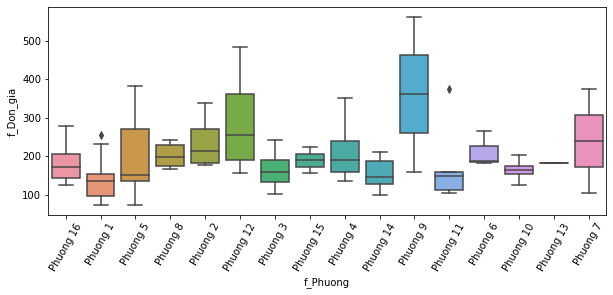

Quan 12


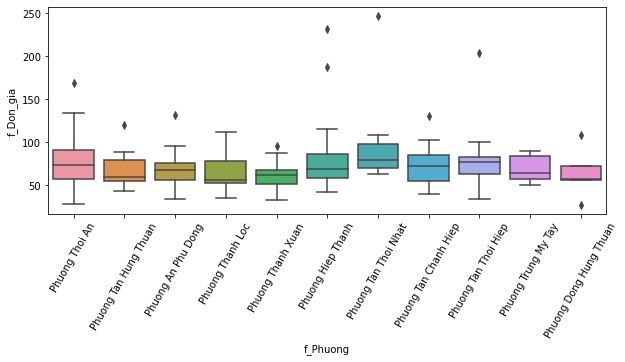

Quan 2


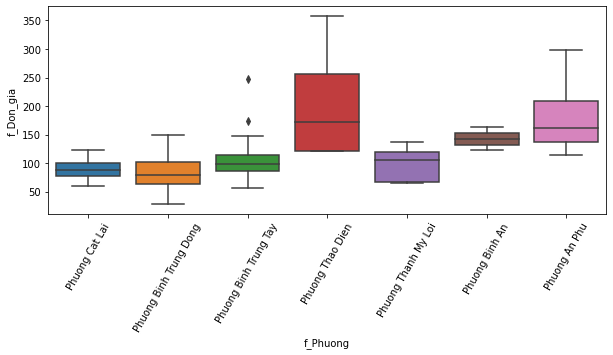

Quan 3


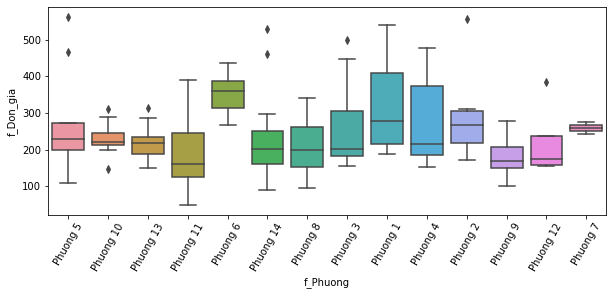

Quan 4


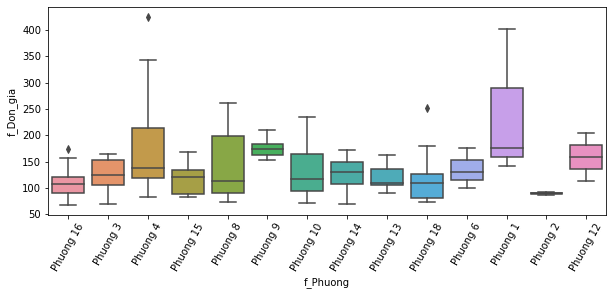

Quan 5


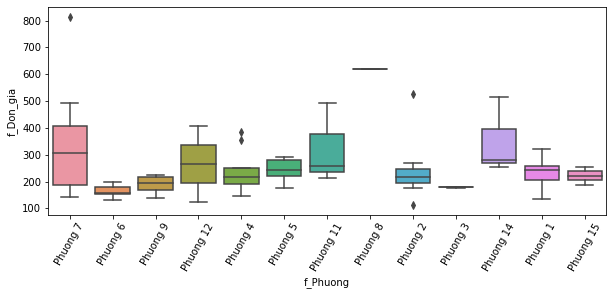

Quan 6


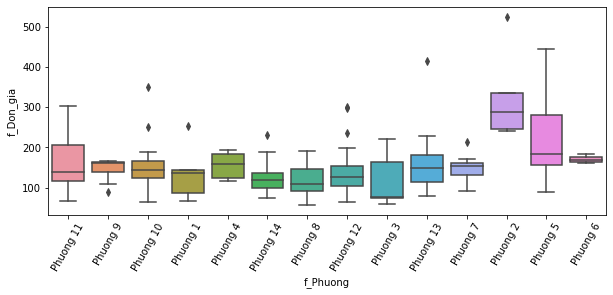

Quan 7


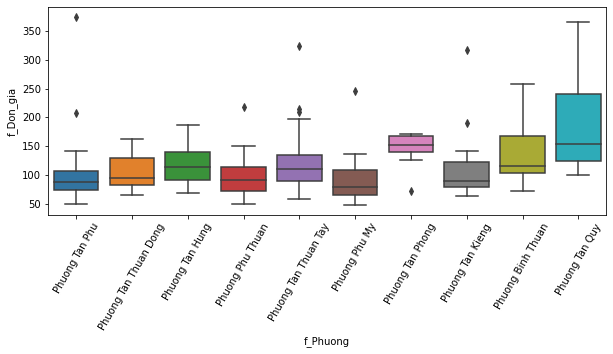

Quan 8


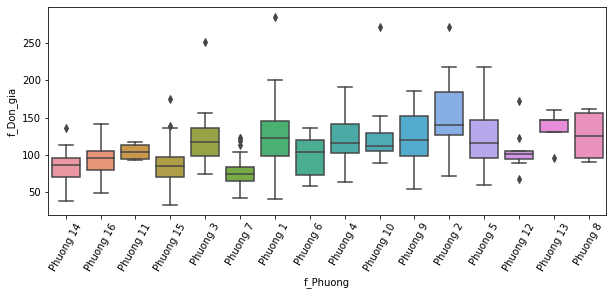

Quan 9


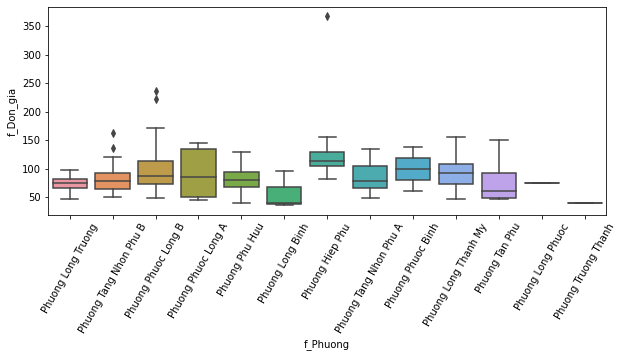

Quan Binh Tan


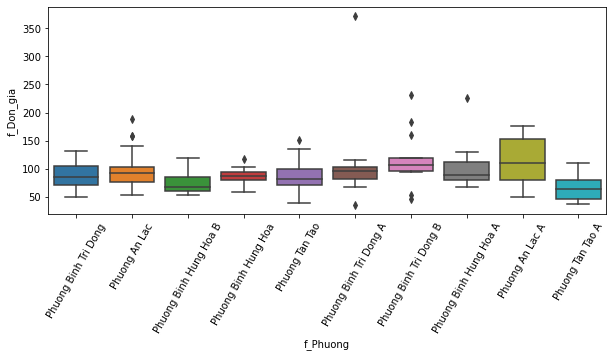

Quan Binh Thanh


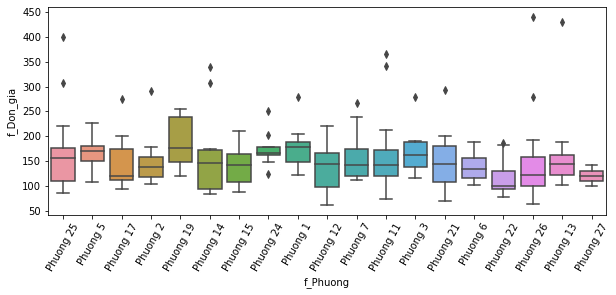

Quan Go Vap


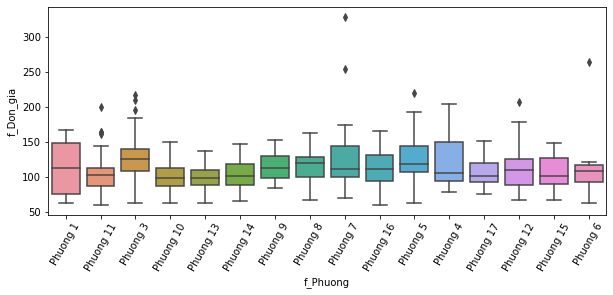

Quan Phu Nhuan


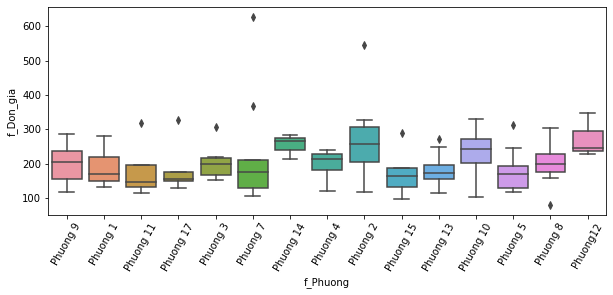

Quan Tan Binh


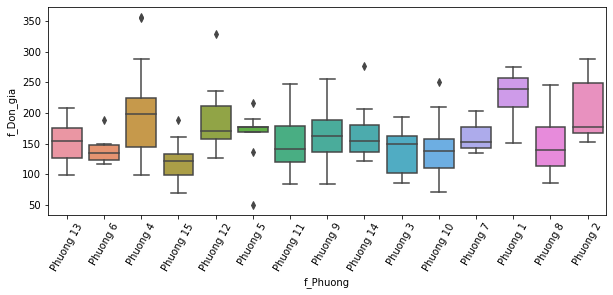

Quan Tan Phu


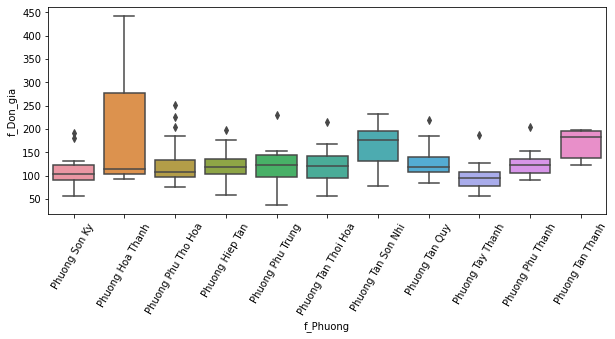

Quan Thu Duc


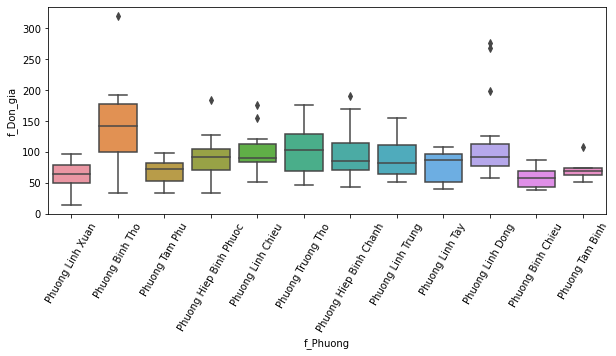

In [157]:
# Mối quan hệ giữa 'f_Don_Gia' và các thuộc tính 'f_Quan', 'f_Phuong'
n=0
for i in data['f_Quan'].sort_values().unique():
    n = n+1
    plt.figure(figsize=(10,100))
    plt.subplot(22,1,n)
    print(i)
    sns.boxplot(data=data[data['f_Quan']==i], x='f_Phuong', y='f_Don_gia')
    plt.xticks(rotation=60)
    plt.show()

Nhận xét: quan sát biểu đồ boxplot theo từng Phường trong từng Quận có thể thấy:
* Có những Quận mà Đơn giá nhà giữa các Phường không chênh lệch nhau nhiều: Quận Gò Vấp, Quận Bình Tân, Quận 12, Huyện Nhà Bè, ...
* Nhưng có những Quận mà Đơn giá giữa các Phường chênh lệch nhau khá rõ: Huyện Bình Chánh, Quận 1, Quận 11, Quận 3, ...

### Sử dụng kiểm định TUKEY HSD

In [158]:
# Thử nghiệm kiểm định TUKEY HSD
df_phuong = pd.DataFrame()
lst_phuonginquan = df.loc[(df['f_Quan']=='Quan 1'),'f_Phuong'].unique()
for i in lst_phuonginquan:
    df_phuong[i] = df.loc[(df['f_Quan']=='Quan 1')&(df['f_Phuong']==i), 
                                  'f_Don_gia'].reset_index(drop=True)

In [159]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df_melt = pd.melt(df_phuong.reset_index(), id_vars = ['index'], 
                  value_vars = df_phuong.columns)
df_melt.columns = ['index', 'phuong', 'value']
df_melt = df_melt.dropna(how='any')
m_comp = pairwise_tukeyhsd(endog = df_melt['value'], groups = df_melt['phuong'], alpha = 0.05)
print(m_comp)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
         group1                  group2          meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------------------------
        Phuong Ben Nghe        Phuong Ben Thanh -122.2756  0.872 -381.8303 137.2792  False
        Phuong Ben Nghe          Phuong Cau Kho -270.1557 0.0168 -512.5927 -27.7187   True
        Phuong Ben Nghe     Phuong Cau Ong Lanh -130.0533    0.9 -469.8902 209.7836  False
        Phuong Ben Nghe         Phuong Co Giang   -242.49 0.0767 -497.3677  12.3877  False
        Phuong Ben Nghe           Phuong Da Kao -129.2771 0.7516 -371.7142 113.1599  False
        Phuong Ben Nghe  Phuong Nguyen Cu Trinh -273.9354  0.016 -518.8139 -29.0568   True
        Phuong Ben Nghe Phuong Nguyen Thai Binh   -309.57 0.0539 -621.7301   2.5901  False
        Phuong Ben Nghe     Phuong Pham Ngu Lao -239.1937 0.0408 -473.0855  -5.3019   True

In [160]:
# df_comp = pd.DataFrame(m_comp.summary())
# # header_row = 0
# # df_comp.columns = df_comp.iloc[header_row]
# # df_comp = df_comp.drop(header_row)
# # df_comp = df_comp.reset_index(drop=True)
# df_comp[0] = str.strip(str(df_comp[0]))
# df_comp

In [161]:
# Số lượng mẫu trong mỗi Phường của Quận 1
df_count_phuong = pd.DataFrame(data.groupby(['f_Quan', 'f_Phuong']).size().reset_index())
df_count_phuong.columns = ['f_Quan', 'f_Phuong', 'count']
df_count_phuong.loc[df_count_phuong['f_Quan']=='Quan 1', 'count'].sort_values().unique()

array([ 1,  2,  3,  5,  7,  8,  9, 10], dtype=int64)

In [162]:
# Số lượng mẫu trong mỗi Phường của tất cả các Quận
df_count_phuong.columns = ['f_Quan', 'f_Phuong', 'count']
df_count_phuong['count'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 33, 34, 36, 37,
       38, 39, 42, 43, 47, 60, 85], dtype=int64)

Nhận xét:
* Mặc dù dùng kiểm định TUKEY HSD sẽ chính xác hơn để gom các Phương có Đơn giá tương đương nhau, nhưng một số Phường có quá ít mẫu để thực hiện kiểm định. Ví dụ Quận 1, mỗi Phường có từ 1-10 mẫu. Do đó khó để thực hiện kiểm định TUKEY HSD

 ### Sử dụng giá trị trung bình đơn thuần

<AxesSubplot:>

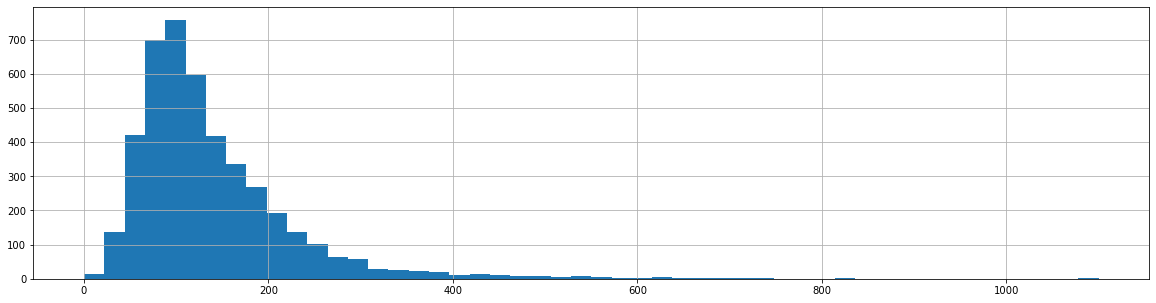

In [163]:
# Biểu đồ phân phối f_Don_gia
plt.figure(figsize=(20,5))
df['f_Don_gia'].hist(bins=50)

In [164]:
# Phân nhóm Đơn giá TB của từng Quận (với mỗi nhóm cách nhau 25trd/m2)

In [165]:
df_dongia_quan = pd.DataFrame(df.groupby(['f_Quan']).mean()['f_Don_gia'].reset_index())
df_dongia_quan.columns = ['Quan_bin', 'Don_gia_TB']
df_dongia_quan['f_Rank_quan'] = np.ceil(df_dongia_quan['Don_gia_TB']/25)
df_dongia_quan.head()

,Quan_bin,Don_gia_TB,f_Rank_quan
0,Huyen Binh Chanh,57.571014,3.0
1,Huyen Hoc Mon,49.449351,2.0
2,Huyen Nha Be,68.329592,3.0
3,Quan 1,286.007273,12.0
4,Quan 10,232.186441,10.0


In [166]:
df_dongia_quan['f_Rank_quan'].sort_values().unique()

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 12.])

In [167]:
# Merge bảng phân nhóm các Quận vào df
df = df.merge(df_dongia_quan, left_on=['f_Quan'], 
              right_on=['Quan_bin'],
             how='left')
df = df.drop(columns=['Quan_bin', 'Don_gia_TB'])

In [168]:
df[['f_Quan', 'f_Rank_quan']].head()

,f_Quan,f_Rank_quan
0,Huyen Hoc Mon,2.0
1,Quan 6,7.0
2,Quan Go Vap,5.0
3,Huyen Nha Be,3.0
4,Quan 11,8.0


In [169]:
# Phân nhóm Đơn giá TB của từng Phường (với mỗi nhóm cách nhau 25trd/m2)

In [170]:
df_dongia_phuong = pd.DataFrame(df.groupby(['f_Quan','f_Phuong']).mean()['f_Don_gia'].reset_index())
df_dongia_phuong.columns = ['Quan_bin', 'Phuong_bin', 'Don_gia_TB']
df_dongia_phuong['f_Rank_phuong'] = np.ceil(df_dongia_phuong['Don_gia_TB']/20)
df_dongia_phuong.head()

,Quan_bin,Phuong_bin,Don_gia_TB,f_Rank_phuong
0,Huyen Binh Chanh,Xa An Phu Tay,37.675000,2.0
1,Huyen Binh Chanh,Xa Binh Chanh,27.950000,2.0
2,Huyen Binh Chanh,Xa Binh Hung,86.369231,5.0
3,Huyen Binh Chanh,Xa Da Phuoc,28.000000,2.0
4,Huyen Binh Chanh,Xa Hung Long,22.000000,2.0


In [171]:
df_dongia_phuong['f_Rank_phuong'].sort_values().unique()

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 17., 18., 19., 20., 25.])

In [172]:
# Merge bảng phân nhóm các Phường vào df
df = df.merge(df_dongia_phuong, left_on=['f_Phuong', 'f_Quan'], 
              right_on=['Phuong_bin', 'Quan_bin'],
             how='left')
df = df.drop(columns=['Phuong_bin', 'Quan_bin', 'Don_gia_TB'])

In [173]:
# df = df.drop(columns = ['Bin_phuong'])

In [174]:
df[['f_Quan', 'f_Phuong', 'f_Rank_phuong']].head()

,f_Quan,f_Phuong,f_Rank_phuong
0,Huyen Hoc Mon,Xa Tan Hiep,3.0
1,Quan 6,Phuong 11,8.0
2,Quan Go Vap,Phuong 1,6.0
3,Huyen Nha Be,Xa Phu Xuan,4.0
4,Quan 11,Phuong 16,9.0


### Tạo các thuộc tính mới liên quan đến Phường - Cách 1

Tạo các thuộc tính 'f_Area' và 'f_Area_n'

In [175]:
# Tạo feature 'f_Area' dạng category để phân nhóm Phường theo mức độ trung tâm của mỗi Phương trong từng Quận
for j in df['f_Quan'].unique():
    lst_to_convert = df.loc[df['f_Quan'] == j, 'f_Rank_phuong'].sort_values().unique()
    n=1
    for i in lst_to_convert:
        s='A'+str(n)
        df.loc[(df['f_Quan'] == j) & (df['f_Rank_phuong']==i), 'f_Area'] = s
        n=n+1

In [176]:
df['f_Area'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'], dtype=object)

In [177]:
df[['f_Quan', 'f_Phuong', 'f_Area']].head()

,f_Quan,f_Phuong,f_Area
0,Huyen Hoc Mon,Xa Tan Hiep,A2
1,Quan 6,Phuong 11,A3
2,Quan Go Vap,Phuong 1,A2
3,Huyen Nha Be,Xa Phu Xuan,A3
4,Quan 11,Phuong 16,A3


In [178]:
df.loc[df['f_Quan'] == 'Quan Go Vap', 'f_Area'].sort_values().unique()

array(['A1', 'A2', 'A3'], dtype=object)

In [179]:
df.loc[df['f_Quan'] == 'Quan 1', 'f_Area'].sort_values().unique()

array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6'], dtype=object)

Nhận xét:
* Như vậy các Phường trong từng Quận đã được gom với nhau thành 9 nhóm, từ A1-A9, tuỳ vào mức độ trung tâm của Phường đó trong Quận. A1 là các Phường trung tâm nhất trong Quận, A9 là các Phường ít trung tâm nhất trong Quận.
* Những Quận mà Đơn giá giữa các Phương không chênh lệch nhiều thường sẽ có ít nhóm. Ví dụ: Quận Gò Vấp chỉ có 3 nhóm, Quận 12 chỉ có 2 nhóm,... nhưng Quận 1 có 6 nhóm, Quận 3 có 8 nhóm, Quận 5 có 9 nhóm,...

In [180]:
# Tạo feature dạng category kiểu số để phân nhóm Phường theo mức độ trung tâm của mỗi Phương trong từng Quận
df['f_Area_n'] = df['f_Area'].str.replace('A','')
df['f_Area_n'] =df['f_Area_n'].astype(int)

In [181]:
# Lưu trữ danh sách gom nhóm Phường theo mức độ trung tâm trong từng Quận để dùng cho New data
location = df[['f_Quan', 'f_Phuong', 'f_Area', 'f_Rank_phuong', 'f_Rank_quan']].drop_duplicates().reset_index(drop=True)
location.columns = ['Quan_bin', 'Phuong_bin', 'f_Area', 'f_Rank_phuong', 'f_Rank_quan']
location.to_csv('location.csv')
location.head()

,Quan_bin,Phuong_bin,f_Area,f_Rank_phuong,f_Rank_quan
0,Huyen Hoc Mon,Xa Tan Hiep,A2,3.0,2.0
1,Quan 6,Phuong 11,A3,8.0,7.0
2,Quan Go Vap,Phuong 1,A2,6.0,5.0
3,Huyen Nha Be,Xa Phu Xuan,A3,4.0,3.0
4,Quan 11,Phuong 16,A3,9.0,8.0


Tạo thuộc tính 'f_Location_qa' nối giữa 'f_Quan' và 'f_Area'

In [182]:
# Vì khu vực A1 của Quận 1 sẽ phải được phân biệt với khu vực A1 của Quận Gò Vấp
# Tạo feature nối giữa Quận và vị trí trung tâm của Phường trong Quận
df['f_Location_qa'] = df['f_Quan'] + '_' + df['f_Area']

In [183]:
df['f_Location_qa'].head()

0    Huyen Hoc Mon_A2
1           Quan 6_A3
2      Quan Go Vap_A2
3     Huyen Nha Be_A3
4          Quan 11_A3
Name: f_Location_qa, dtype: object

### Tạo các thuộc tính mới liên quan đến Phường - Cách 2

* Thông qua bảng tính groupby và biểu đồ boxplot về Đơn giá TB từng Phường trong Quận,
* Kết hợp với domain knowledge (hiểu biết) về mức độ trung tâm / xa trung tâm của từng Phường trong Quận
* Xây dựng 1 file phân nhóm các Phương trong từng Quận (location_v2.xlsx)

In [185]:
# Đọc file phân nhóm các Phường trong từng Quận
df_dongia_phuong_2 = pd.read_excel('location_2.xlsx', sheet_name='bin_phuong')
df_dongia_phuong_2.head()

,Phuong_bin,Quan_bin,f_Area_2,f_Area_n_2
0,Xa Tan Hiep,Huyen Hoc Mon,L3,3
1,Phuong 11,Quan 6,L3,3
2,Phuong 1,Quan Go Vap,L1,1
3,Xa Phu Xuan,Huyen Nha Be,L1,1
4,Phuong 16,Quan 11,L3,3


In [186]:
df_dongia_phuong_2.count()

Phuong_bin    288
Quan_bin      288
f_Area_2      288
f_Area_n_2    288
dtype: int64

In [187]:
# Merge bảng phân nhóm các Phường vào df để lấy Area kiểu 2
df = df.merge(df_dongia_phuong_2, left_on=['f_Phuong', 'f_Quan'], 
              right_on=['Phuong_bin', 'Quan_bin'],
             how='left')
df = df.drop(columns=['Phuong_bin', 'Quan_bin'])

In [188]:
df[['f_Phuong', 'f_Quan', 'f_Area_2']].head()

,f_Phuong,f_Quan,f_Area_2
0,Xa Tan Hiep,Huyen Hoc Mon,L3
1,Phuong 11,Quan 6,L3
2,Phuong 1,Quan Go Vap,L1
3,Xa Phu Xuan,Huyen Nha Be,L1
4,Phuong 16,Quan 11,L3


In [189]:
df['f_Area_2'].sort_values().unique()

array(['L1', 'L2', 'L3', 'L4', 'L5'], dtype=object)

In [190]:
# Tạo feature mới ghép giữa Quận và Area kiểu 2
df['f_Location_qa_2'] = df['f_Quan'] + '_' + df['f_Area_2']

In [191]:
df['f_Location_qa_2'].count()

4386

Tạo thuộc tính f_Don_gia_bin
* Tạo thuộc tính này để bước train_test_split sẽ áo dụng StratifiedShuffleSplit() => Có thể tách dữ liệu random nhưng vẫn đảm bảo phân phối của Đơn giá trong tập Train phù hợp với phân phối của toàn bộ dữ liệu (không bị bias)

In [192]:
# Tạo nhóm Đơn giá với giá trị cách nhau 30trd
df['f_Don_gia_bin'] = np.ceil(df["f_Don_gia"]/30)
df['f_Don_gia_bin'].value_counts().sort_index().head(50)

1.0      39
2.0     407
3.0     903
4.0     956
5.0     672
6.0     459
7.0     324
8.0     213
9.0     130
10.0     82
11.0     50
12.0     34
13.0     31
14.0     14
15.0     21
16.0      7
17.0     11
18.0      9
19.0      7
20.0      2
21.0      4
22.0      4
23.0      3
24.0      1
25.0      1
28.0      1
37.0      1
Name: f_Don_gia_bin, dtype: int64

In [193]:
df.loc[(df['f_Don_gia_bin']>=16) & (df['f_Don_gia_bin']<=18), 'f_Don_gia_bin'] =16
df.loc[(df['f_Don_gia_bin']>=19) & (df['f_Don_gia_bin']<=22), 'f_Don_gia_bin'] =17
df.loc[(df['f_Don_gia_bin']>=23) , 'f_Don_gia_bin'] =18

In [194]:
df['f_Don_gia_bin'].value_counts().sort_index().head(50)

1.0      39
2.0     407
3.0     903
4.0     956
5.0     672
6.0     459
7.0     324
8.0     213
9.0     130
10.0     82
11.0     50
12.0     34
13.0     31
14.0     14
15.0     21
16.0     27
17.0     17
18.0      7
Name: f_Don_gia_bin, dtype: int64

### Kiểm tra lại sự tương quan giữa các thuộc tính với thuộc tính 'f_Gia'

In [195]:
# Giữa biến output liên tục và biến inputs liên tục
lst_corr = ['f_Gia', 'f_Don_gia', 'f_Nha_ve_sinh', 'f_So_phong',
       'f_Chieu_dai', 'f_Rong',        
       'f_Tang_ham_n', 'f_Gac_suot_n',
       'f_Lau_n', 'f_Lung_n', 'f_Tret_n', 'f_Tang_thuong_n', 'f_Ap_mai_n',
       'f_Dien_tich', 
       'f_Dien_tich_su_dung', 
       'f_Lo_gioi', 'f_Latitude',
       'f_Longitude', 
       'f_Rank_quan', 'f_Rank_phuong',
       'f_Area', 'f_Area_n', 'f_Area_n_2',
       ]
df[lst_corr].corr()

,f_Gia,f_Don_gia,f_Nha_ve_sinh,f_So_phong,f_Chieu_dai,f_Rong,f_Tang_ham_n,f_Gac_suot_n,f_Lau_n,f_Lung_n,...,f_Ap_mai_n,f_Dien_tich,f_Dien_tich_su_dung,f_Lo_gioi,f_Latitude,f_Longitude,f_Rank_quan,f_Rank_phuong,f_Area_n,f_Area_n_2
f_Gia,1.000000,0.490753,0.453928,0.482501,0.500938,0.410005,0.243994,-0.019437,0.328723,0.058786,...,0.016138,0.564495,0.545002,0.343202,0.014411,0.012664,0.247133,0.315664,0.229114,0.035775
f_Don_gia,0.490753,1.000000,0.144912,0.134791,-0.152893,-0.138892,0.111945,-0.028538,0.453068,0.120922,...,0.041934,-0.184416,0.123291,0.303788,-0.020099,-0.023485,0.655772,0.725652,0.461224,0.093520
f_Nha_ve_sinh,0.453928,0.144912,1.000000,0.957279,0.290027,0.252363,0.165501,-0.021826,0.409044,0.109148,...,0.017438,0.292942,0.537627,0.094208,-0.001740,0.040140,0.047973,0.065414,0.034054,-0.002903
f_So_phong,0.482501,0.134791,0.957279,1.000000,0.316332,0.256796,0.168346,-0.012814,0.382488,0.106126,...,0.003102,0.322323,0.528830,0.100793,-0.000592,0.034457,0.050588,0.065946,0.038407,0.007975
f_Chieu_dai,0.500938,-0.152893,0.290027,0.316332,1.000000,0.223390,0.085304,0.019825,-0.027404,-0.022418,...,-0.025382,0.704714,0.401832,0.221331,0.019148,0.009947,-0.209222,-0.184926,-0.087952,-0.022725
f_Rong,0.410005,-0.138892,0.252363,0.256796,0.223390,1.000000,0.056297,-0.015162,-0.037271,-0.012655,...,0.010862,0.642307,0.306758,0.063414,0.010695,0.042107,-0.162295,-0.145772,-0.066315,-0.005552
f_Tang_ham_n,0.243994,0.111945,0.165501,0.168346,0.085304,0.056297,1.000000,0.013730,0.148146,0.033530,...,0.008728,0.096621,0.189571,0.047634,-0.007673,0.025327,0.022292,0.032942,0.019001,0.022269
f_Gac_suot_n,-0.019437,-0.028538,-0.021826,-0.012814,0.019825,-0.015162,0.013730,1.000000,-0.105032,-0.015816,...,0.005802,-0.000084,-0.037924,-0.035405,-0.009903,-0.006746,0.015310,-0.005358,-0.033475,0.045397
f_Lau_n,0.328723,0.453068,0.409044,0.382488,-0.027404,-0.037271,0.148146,-0.105032,1.000000,-0.077377,...,0.040329,-0.058040,0.382808,0.152453,-0.010764,-0.014621,0.257103,0.290211,0.192246,0.017749
f_Lung_n,0.058786,0.120922,0.109148,0.106126,-0.022418,-0.012655,0.033530,-0.015816,-0.077377,1.000000,...,0.017880,-0.028599,0.067857,0.011422,0.022342,-0.023621,0.102779,0.099157,0.041549,0.007394


In [196]:
# Giữa biến output liên tục và biến inputs phân loại
## Tạo chuỗi
prob = 0.95
alpha = 1.0 - prob
string = []
lst_anova = ['f_Gia', 
       'f_Huong', 'f_Giay_to', 'f_Phap_ly',
       'f_Tang_ham_b', 'f_Gac_suot_b', 'f_Lau_b', 'f_Lung_b', 'f_Tret_b',
       'f_Tang_thuong_b', 'f_Ap_mai_b', 'f_Tang_ham_n', 'f_Gac_suot_n',
       'f_Lau_n', 'f_Lung_n', 'f_Tret_n', 'f_Tang_thuong_n', 'f_Ap_mai_n',       
       'f_Nha_hem', 'f_Nha_mat_tien',
       'f_Duong', 'f_Phuong', 'f_Quan', 
       'f_Location_dpq', 'f_Location_pq', 'f_Location_dp',
       'f_Loai_BDS', 
       'f_Area', 'f_Location_qa', 'f_Area_2', 
       'f_Location_qa_2']

for i in lst_anova:
    t = 'C(' + i + ')'
    string.append(t)
string = '+'.join(string)

## ANOVA và chọn biến inputs phân loại có ảnh hưởng lớn đến biến output
print('Kiểm định ANONA giữa thuộc tính f_Gia và các thuộc tính phân loại:')
model = ols('f_Gia ~ ' + string, data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print('='*65)
print(aov_table)
print('\n')

print('Các thuộc tính có ảnh hướng đáng kể dến thuộc tính f_Gia:')
aov_table1 = aov_table[aov_table['PR(>F)'] < alpha]
print('='*57)
print(aov_table1)
print('\n')

lst_phanloai_chosen = aov_table1.index.str.extract('(C\()(\w+)')[1].to_list()
print('- Kết luận: Các thuộc tính phân loại có ảnh hướng đáng kể dến thuộc tính output (f_Gia):', lst_phanloai_chosen)

Kiểm định ANONA giữa thuộc tính f_Gia và các thuộc tính phân loại:
                          sum_sq      df             F    PR(>F)
C(f_Gia)            3.400329e-13   444.0  1.008780e-16  1.000000
C(f_Huong)          7.504445e-20     8.0  1.235626e-21  1.000000
C(f_Giay_to)        7.289508e-20     3.0  3.200630e-21  1.000000
C(f_Phap_ly)        2.486146e-20     1.0  3.274802e-21  1.000000
C(f_Tang_ham_b)     2.079245e-20     1.0  2.738824e-21  1.000000
C(f_Gac_suot_b)     2.294865e-20     1.0  3.022843e-21  1.000000
C(f_Lau_b)          3.242235e-17     1.0  4.270739e-18  1.000000
C(f_Lung_b)         2.226995e-20     1.0  2.933444e-21  1.000000
C(f_Tret_b)         2.670153e-20     1.0  3.517181e-21  1.000000
C(f_Tang_thuong_b)  2.227159e-20     1.0  2.933660e-21  1.000000
C(f_Ap_mai_b)       2.446735e-20     1.0  3.222889e-21  1.000000
C(f_Tang_ham_n)     2.486800e-20     1.0  3.275664e-21  1.000000
C(f_Gac_suot_n)     2.442743e-20     1.0  3.217632e-21  1.000000
C(f_Lau_n)          1.7

# FEATURES SELECTION

In [197]:
# sample1 = df[['Dien_tich', 'Dien_tich_su_dung', 'Nha_hem', 'Nha_mat_tien', 'Lo_gioi', 'Duong_1', 'Phuong_1', 'Quan_1', 'Gia_1']]
# sample1 = df[['Nha_ve_sinh_1', 'So_phong_1', 'Chieu_dai', 'Rong', 'Dien_tich', 'Dien_tich_su_dung', 'Lo_gioi', 'Lau_2',
#               'Nha_hem', 'Duong_1', 'Phuong_1', 'Quan_1', 'Gia_1']] 
# sample1 = df[['Nha_ve_sinh_1', 'Chieu_dai', 'Rong', 'Dien_tich', 'Dien_tich_su_dung', 'Lo_gioi', 'Lau_2',
#               'Nha_hem', 'Duong_1', 'Phuong_1', 'Quan_1', 'Gia_1']] # => 69%, 4000
# sample1 = df[['Nha_ve_sinh_1', 'Chieu_dai', 'Rong', 'Dien_tich', 'Dien_tich_su_dung', 'Lo_gioi', 'Tang_ham_2', 'Lau_2',
#               'Nha_hem', 'Duong_1', 'Phuong_1', 'Quan_1', 'Gia_1']]  # => 69%, 4000
# sample1 = df[['Nha_ve_sinh_1', 'Chieu_dai', 'Rong', 'Dien_tich', 'Dien_tich_su_dung', 'Lo_gioi', 'Tang_ham_2', 'Lau_2',
#               'Nha_hem', 'Dia_chi', 'Quan_1','Gia_1']]  # => 68.7%, 4000
# sample1 = df[['Nha_ve_sinh_1', 'Chieu_dai', 'Rong', 'Dien_tich', 'Dien_tich_su_dung', 'Lo_gioi', 'Tang_ham_2', 'Lau_2',
#               'Nha_hem', 'Duong_1', 'Dia_chi_ql', 'Gia_1']]  # => 73.98%, 3741
# sample1 = df[['Nha_ve_sinh_1', 'Chieu_dai', 'Rong', 'Dien_tich', 'Dien_tich_su_dung', 'Lo_gioi', 'Lau_2',
#               'Nha_hem', 'Duong_1', 'Quan_1', 'Dia_chi_ql', 'Gia_1']]  # => 75.50%, 3630
# sample1 = df[['Nha_ve_sinh_1', 'Chieu_dai', 'Rong', 'Dien_tich', 'Dien_tich_su_dung', 'Lo_gioi', 'Tang_ham_2', 'Lau_2',
#               'Nha_hem', 'Quan_1', 'Dia_chi_ql', 'Gia_1']]  # => 75.75%, 3611
# sample1 = df[['Nha_ve_sinh_1', 'Chieu_dai', 'Rong', 'Dien_tich', 'Dien_tich_su_dung', 'Lo_gioi', 'Tang_ham_2','Lau_2',
#               'Nha_hem', 'Quan_1', 'Dia_chi_ql', 'Gia_1']]  # => 76.30%, 3529
# sample1 = df[['Nha_ve_sinh_1', 'Chieu_dai', 'Rong', 'Dien_tich_cal', 'Dien_tich_su_dung', 'Lo_gioi', 'Tang_ham_2','Lau_2',
#               'Nha_hem', 'Quan_1', 'Dia_chi_ql', 'Gia_1']]  # => 72.96%, 3800
# sample1 = df.loc[(df['Loai_BDS'] =='nha') & (df['Dien_tich'] >=8) & (df['Dien_tich'] <= 150),['Nha_ve_sinh_1', 'Chieu_dai', 'Rong', 'Dien_tich', 'Dien_tich_su_dung', 'Lo_gioi', 'Lau_2',
#               'Nha_hem', 'Quan_1', 'Dia_chi_ql', 'Don_gia_cat', 'Gia_1']]
# sample = df.loc[(df['f_Loai_BDS'] =='nha') & (df['f_Dien_tich'] >=8) & (df['f_Dien_tich'] <= 150),
#                  ['f_Nha_ve_sinh', 'f_Chieu_dai', 'f_Rong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 
#                   'f_Lo_gioi', 'f_Lau_n','f_Nha_hem', 
#                   'f_Quan', 'f_Location_qa', 'f_Don_gia_bin', 'f_Gia']]
# sample = df.loc[(df['f_Loai_BDS'] =='nha') & (df['f_Dien_tich'] >=8) & (df['f_Dien_tich'] <= 150),
#                  ['f_Nha_ve_sinh', 'f_Chieu_dai', 'f_Rong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 
#                   'f_Lo_gioi', 'f_Lau_n','f_Nha_hem',
#                   'f_Quan', 'f_Location_qa', 'f_Don_gia_bin', 'f_Gia']]
# sample = df[['f_Nha_ve_sinh', 'f_Chieu_dai', 'f_Rong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 
#                   'f_Lo_gioi', 'f_Lau_n','f_Nha_hem',
#                   'f_Quan', 'f_Location_qa', 'f_Don_gia_bin', 'f_Gia']] #=> 57.8%
# sample = df[['f_Nha_ve_sinh', 'f_Chieu_dai', 'f_Rong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 
#              'f_Lo_gioi', 'f_Lau_n', 'f_Nha_hem', 
#              'f_Quan', 'f_Location_qa_2', 'f_Don_gia_bin', 'f_Gia']]  # => 72.78%, 5475
sample = df[['f_Nha_ve_sinh', 'f_Chieu_dai',  'f_Rong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 
            'f_Lo_gioi', 'f_Lau_n','f_Nha_hem',
            'f_Quan', 'f_Location_qa_2', 'f_Don_gia_bin', 'f_Gia']]

In [198]:
sample = sample.drop(index = sample[(df['f_Lau_n']==22) & (df['f_Gia']==3100)].index[0])
# sample.loc[(df['f_Lau_n']==22) & (df['f_Gia']==3100), 'f_Lau_n'] = 2

In [199]:
sample = sample.dropna(how='any').reset_index(drop=True)

In [200]:
X = sample.drop('f_Gia', axis=1).reset_index(drop=True)

In [201]:
X.shape

(4292, 11)

In [202]:
X.head()

,f_Nha_ve_sinh,f_Chieu_dai,f_Rong,f_Dien_tich,f_Dien_tich_su_dung,f_Lo_gioi,f_Lau_n,f_Nha_hem,f_Quan,f_Location_qa_2,f_Don_gia_bin
0,4,20.71,5.00,104.5,134.7,5.0,1,1,Huyen Hoc Mon,Huyen Hoc Mon_L3,2.0
1,1,12.90,3.00,42.3,87.7,6.1,0,1,Quan 6,Quan 6_L3,4.0
2,2,3.20,4.65,20.2,150.0,3.0,0,1,Quan Go Vap,Quan Go Vap_L1,4.0
3,2,14.35,5.00,71.8,137.6,5.0,1,1,Huyen Nha Be,Huyen Nha Be_L1,2.0
4,5,10.00,5.20,52.1,70.3,5.0,2,0,Quan 11,Quan 11_L3,5.0


In [203]:
y = sample['f_Gia'].reset_index(drop=True)
y

0       3700.0
1       3900.0
2       2000.0
3       3800.0
4       6500.0
         ...  
4287    6600.0
4288    4600.0
4289    3850.0
4290    4200.0
4291    4700.0
Name: f_Gia, Length: 4292, dtype: float64

# FEATURE ENGINEERING

In [204]:
# encoder = OneHotEncoder(drop='first')
encoder = OneHotEncoder(handle_unknown = 'ignore')

In [205]:
lst_encode = ['f_Quan', 'f_Location_qa_2']
arr = encoder.fit_transform(X[lst_encode]).toarray()

In [206]:
# cols = []
# n = 0
# for i in encoder.categories_:
#     for j in i[1:]: 
#         t = 'oh_' + lst_encode[n] + '_' +str(j)
#         t = t.replace('-', '_')
#         cols.append(t)
#     n = n+1

cols = []
n = 0
for i in encoder.categories_:
    for j in i[0:]: 
        t = 'oh_' + lst_encode[n] + '_' +str(j)
        t = t.replace('-', '_')
        cols.append(t)
    n = n+1

X_oh_encode = pd.DataFrame(arr, columns=cols)
X_oh_encode.head()

,oh_f_Quan_Huyen Binh Chanh,oh_f_Quan_Huyen Hoc Mon,oh_f_Quan_Huyen Nha Be,oh_f_Quan_Quan 1,oh_f_Quan_Quan 10,oh_f_Quan_Quan 11,oh_f_Quan_Quan 12,oh_f_Quan_Quan 2,oh_f_Quan_Quan 3,oh_f_Quan_Quan 4,...,oh_f_Location_qa_2_Quan Tan Binh_L1,oh_f_Location_qa_2_Quan Tan Binh_L2,oh_f_Location_qa_2_Quan Tan Binh_L3,oh_f_Location_qa_2_Quan Tan Binh_L4,oh_f_Location_qa_2_Quan Tan Binh_L5,oh_f_Location_qa_2_Quan Tan Phu_L1,oh_f_Location_qa_2_Quan Tan Phu_L2,oh_f_Location_qa_2_Quan Thu Duc_L1,oh_f_Location_qa_2_Quan Thu Duc_L2,oh_f_Location_qa_2_Quan Thu Duc_L3
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
lst_concat = ['f_Nha_ve_sinh', 'f_Chieu_dai',  'f_Rong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 
                  'f_Lo_gioi', 'f_Lau_n','f_Nha_hem', 
                  'f_Don_gia_bin']
X2 = pd.concat([X_oh_encode, X[lst_concat]], axis=1)

X2

,oh_f_Quan_Huyen Binh Chanh,oh_f_Quan_Huyen Hoc Mon,oh_f_Quan_Huyen Nha Be,oh_f_Quan_Quan 1,oh_f_Quan_Quan 10,oh_f_Quan_Quan 11,oh_f_Quan_Quan 12,oh_f_Quan_Quan 2,oh_f_Quan_Quan 3,oh_f_Quan_Quan 4,...,oh_f_Location_qa_2_Quan Thu Duc_L3,f_Nha_ve_sinh,f_Chieu_dai,f_Rong,f_Dien_tich,f_Dien_tich_su_dung,f_Lo_gioi,f_Lau_n,f_Nha_hem,f_Don_gia_bin
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4,20.71,5.00,104.5,134.7,5.00,1,1,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,12.90,3.00,42.3,87.7,6.10,0,1,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2,3.20,4.65,20.2,150.0,3.00,0,1,4.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2,14.35,5.00,71.8,137.6,5.00,1,1,2.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5,10.00,5.20,52.1,70.3,5.00,2,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2,18.00,3.00,54.4,135.0,2.50,1,1,5.0
4288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3,9.37,3.00,36.5,79.9,1.78,2,1,5.0
4289,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3,11.21,4.50,50.5,126.1,6.00,2,1,3.0
4290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2,9.20,3.20,31.6,63.2,1.76,1,1,5.0


# CHIA DỮ LIỆU (DATA SPLITTING)

In [208]:
# Chia dữ liệu (Data splitting)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y, random_state=42,
                                                   test_size=0.2)

In [209]:
X_train1.shape, X_test1.shape

((3433, 99), (859, 99))

In [210]:
y_train1.shape, y_test1.shape

((3433,), (859,))

In [211]:
# Chia dữ liệu bằng StratifiedShuffleSplit() và phân phối của thuộc tính f_Don_gia_bin
from sklearn.model_selection import StratifiedShuffleSplit

In [212]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X2, X2['f_Don_gia_bin']):
    X_train2 = X2.loc[train_index].drop(columns=['f_Don_gia_bin'])
    X_test2 = X2.loc[test_index].drop(columns=['f_Don_gia_bin'])
    y_train2 = y.loc[train_index]
    y_test2 = y.loc[test_index]

In [213]:
X_train2.shape, X_test2.shape

((3433, 98), (859, 98))

So sanhs 2 cách chia dữ liệu, cách nào gần với tập full hơn:

In [214]:
df_compare = pd.concat([X2['f_Don_gia_bin'].value_counts().sort_index(),
                       X_train1['f_Don_gia_bin'].value_counts().sort_index(),
                       X2.loc[train_index, 'f_Don_gia_bin'].value_counts().sort_index()], axis=1)
df_compare.columns = ['full_set', 'split_set_1', 'split_set_2']
for i in df_compare.columns:
    col_name = '%_' + i
    df_compare[col_name] = df_compare[i] / df_compare[i].sum()  


In [215]:
df_compare.loc[abs(df_compare['%_split_set_2'] - df_compare['%_full_set']) 
               <= abs(df_compare['%_split_set_1'] - df_compare['%_full_set']),
               'nearest_to_full_set'] = 'split_set_2'

In [216]:
df_compare

,full_set,split_set_1,split_set_2,%_full_set,%_split_set_1,%_split_set_2,nearest_to_full_set
1.0,37,34,30,0.008621,0.009904,0.008739,split_set_2
2.0,397,314,317,0.092498,0.091465,0.092339,split_set_2
3.0,883,686,706,0.205732,0.199825,0.205651,split_set_2
4.0,932,743,745,0.217148,0.216429,0.217011,split_set_2
5.0,657,527,525,0.153075,0.153510,0.152927,split_set_2
6.0,448,368,358,0.104380,0.107195,0.104282,split_set_2
7.0,318,249,254,0.074091,0.072531,0.073988,split_set_2
8.0,211,172,169,0.049161,0.050102,0.049228,split_set_2
9.0,127,108,102,0.029590,0.031459,0.029712,split_set_2
10.0,82,68,66,0.019105,0.019808,0.019225,split_set_2


Nhận xét:
* Cách chưa dữ liệu thứ 2 (dùng StratifiedShuffleSplit()) gần với tập full hơn
* Việc chia dữ liệu gần tập full hơn sẽ giúp việc train model hiệu suất cao hơn, giảm bị overfitting

# CHUẨN HOÁ DỮ LIỆU (DATA STANDARDIZING) - Tập Train

Feature Scaling

In [217]:
scaler = RobustScaler()

In [218]:
lst_lientuc_to_scale = ['f_Nha_ve_sinh', 'f_Chieu_dai',  'f_Rong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 
                  'f_Lo_gioi', 'f_Lau_n','f_Nha_hem']
X_before_scale = X_train2[lst_lientuc_to_scale]

scaler = scaler.fit(X_before_scale)
X_after_scale = scaler.transform(X_before_scale)
X_train_after_scale = pd.DataFrame(X_after_scale, columns=(X_before_scale.add_suffix('_scale')).columns)
X_train_after_scale.head()

,f_Nha_ve_sinh_scale,f_Chieu_dai_scale,f_Rong_scale,f_Dien_tich_scale,f_Dien_tich_su_dung_scale,f_Lo_gioi_scale,f_Lau_n_scale,f_Nha_hem_scale
0,-0.5,0.4025,0.000000,0.317241,2.514078,0.50,0.0,0.0
1,4.0,-0.0725,1.088435,0.767816,1.195277,3.00,1.0,-1.0
2,0.5,-0.6775,-1.020408,-0.797701,1.104450,2.00,3.0,-1.0
3,-1.0,-0.4475,-0.238095,-0.452874,-0.554042,-0.50,-1.0,0.0
4,1.5,0.4275,5.442177,3.328736,1.550409,-0.25,0.0,0.0


# CHUẨN HOÁ DỮ LIỆU (DATA STANDARDIZING) - Tập Test

In [219]:
X_before_scale = X_test2[lst_lientuc_to_scale]
X_after_scale = scaler.transform(X_before_scale) #--> dùng transform, không dùng fit_transform cho tập Test

X_test_after_scale = pd.DataFrame(X_after_scale, columns=(X_before_scale.add_suffix('_scale')).columns)
X_test_after_scale.head()

,f_Nha_ve_sinh_scale,f_Chieu_dai_scale,f_Rong_scale,f_Dien_tich_scale,f_Dien_tich_su_dung_scale,f_Lo_gioi_scale,f_Lau_n_scale,f_Nha_hem_scale
0,-0.5,-0.19750,0.340136,0.193103,-0.007266,-0.250,0.0,0.0
1,0.0,-0.17250,0.748299,0.041379,0.505904,-0.375,1.0,0.0
2,0.0,-0.28500,-0.374150,-0.367816,0.505904,0.000,1.0,0.0
3,-0.5,-0.36000,-0.755102,-0.639080,-0.254314,0.500,2.0,0.0
4,0.0,0.27125,-0.544218,-0.112644,-0.139873,-0.250,0.0,0.0


Tập Train và Test hoàn thiện

In [220]:
X_train_scale = pd.concat([X_train2[cols].reset_index(drop=True), X_train_after_scale], axis=1)
X_test_scale = pd.concat([X_test2[cols].reset_index(drop=True), X_test_after_scale], axis=1)
X_train_scale.shape, X_test_scale.shape

((3433, 98), (859, 98))

In [221]:
X_train = X_train2
X_test = X_test2
X_train.shape, X_test.shape

((3433, 98), (859, 98))

In [222]:
y_train = y_train2
y_test = y_test2
y_train.shape, y_test.shape

((3433,), (859,))

# BUILD MODELS

In [223]:
# Tạo hàm Cross validation:
def Average_RMSE_Model(model, X, y, size=0.3, cv=10):
    import time
    from sklearn.model_selection import train_test_split    
    train_rmse=[]
    train_score=[]
    test_rmse=[]
    test_score=[]
    
    duration=[]
    for n in range(1, cv+1):                
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)                                             
        
        start=time.time()        
        model.fit(X_train, y_train)
        end=time.time()
        
        train_rmse.append(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train), squared=False))
        test_rmse.append(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test), squared=False))
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))

        duration.append((end-start)*1000)
        
    return np.mean(train_rmse), np.mean(train_score), np.mean(test_rmse), np.mean(test_score), np.mean(duration) 

In [224]:
# Cross validation trên các model tổng quát
lst_data = []
train_rmses = []
train_scores = []
test_rmses = []
test_scores = []
names = []
times = []

models = [
        LinearRegression(),
        KNeighborsRegressor(),
        svm.SVR(),
        RandomForestRegressor(),
        GradientBoostingRegressor(),        
         ]

# Với X_train_scale
for model in models:
    
    train_rmse, train_score, test_rmse, test_score, t = Average_RMSE_Model(model, X_train_scale, y_train, size=0.3, cv=10)
    
    lst_data.append('X_train_scale')
    train_rmses.append(train_rmse)
    train_scores.append(train_score)
    test_rmses.append(test_rmse)
    test_scores.append(test_score)
    names.append(model.__class__.__name__)
    times.append(t)

# Với X_train
for model in models[-2:]:
    train_rmse, train_score, test_rmse, test_score, t = Average_RMSE_Model(model, X_train, y_train, size=0.3, cv=10)
    
    lst_data.append('X_train')
    train_rmses.append(train_rmse)
    train_scores.append(train_score)
    test_rmses.append(test_rmse)
    test_scores.append(test_score)
    names.append(model.__class__.__name__)
    times.append(t)

In [225]:
# So sánh kết quả sau khi cross validation các models tổng quát
compare_df = pd.DataFrame({'Dataset': lst_data,
                            'Model_name': names,
                            'Training RMSE': train_rmses,
                            'Testing RMSE': test_rmses,
                            'Training score': train_scores,
                            'Testing score': test_scores,                           
                            'Time':times})
compare_df

,Dataset,Model_name,Training RMSE,Testing RMSE,Training score,Testing score,Time
0,X_train_scale,LinearRegression,4353.244478,4840.114126,0.710923,0.632159,23.736286
1,X_train_scale,KNeighborsRegressor,4188.772436,5143.652797,0.732441,0.587099,2.393103
2,X_train_scale,SVR,8323.378875,8442.880956,-0.067146,-0.076417,454.448080
3,X_train_scale,RandomForestRegressor,1809.858631,4907.373871,0.949417,0.635128,2143.333173
4,X_train_scale,GradientBoostingRegressor,2883.328267,4308.370395,0.877250,0.687341,578.993607
5,X_train,RandomForestRegressor,1831.468693,4937.091500,0.949031,0.616635,2389.290786
6,X_train,GradientBoostingRegressor,2867.976974,4460.863317,0.875805,0.677406,617.048311


Nhận xét:
* Căn cứ trên Testing RMSE thì loại bỏ model LinearRegression, SVR.
* Căn cứ trên Testing score thì loại bỏ model KNeighborsRegressor.
* Đối với RandomForestRegressor	và GradientBoostingRegressor thực hiện trên X_train_scale và X_train đều tương đương nhau. Về cơ bản 2 models này ít bị ảnh hưởng bởi giá trị độ lớn của các features. Do đó, để đơn giản hoá việc tiền xử lý khi áp dụng New data, bước tiếp theo sẽ tuning 2 models này bằng X_train.

## RandomForest

Tuning parameter

In [226]:
# grid_params = {'bootstrap': [True, False],
#  'max_depth': [8, 9, 10,None],
#  'max_features': ['auto', 'sqrt' ],
#  'min_samples_leaf': [1, 2],
#  'min_samples_split': [2, 4, 6],
#  'n_estimators': [200, 300, 400, 600, 800, 1000]}

In [227]:
# rfmodel_random = RandomizedSearchCV(RandomForestRegressor(),
#                                     grid_params,
#                                     cv=10)

In [228]:
# start=time.time()
# rfmodel_random.fit(X_train_new, y_train)
# end=time.time()

In [229]:
# print('Time (in minutes):', (end-start)*1000)

In [230]:
# print('Time (in minutes):', (end-start)/60)

In [231]:
# # Các parameters tốt nhất
# print(rfmodel_random.best_score_)
# print(rfmodel_random.best_params_)

Training model

In [232]:
# model_rf = RandomForestRegressor(n_estimators=250, 
#                                  min_samples_split=2, 
#                                  min_samples_leaf=1, 
#                                  max_features='sqrt', 
#                                  max_depth=None, 
#                                  bootstrap=False)
# model_rf = model_rf.fit(X_train_new, y_train)

model_rf = RandomForestRegressor(n_estimators=500, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 max_features='sqrt', 
                                 max_depth=None, 
                                 bootstrap=False)
model_rf = model_rf.fit(X_train, y_train)

Model evaluation

In [233]:
# tinh RMSE, MAE, R^2
model = model_rf
print('Train Dataset RMSE: ', mean_squared_error(y_true=y_train, y_pred=model.predict(X_train), squared=False))
print('Test Dataset RMSE: ', mean_squared_error(y_true=y_test, y_pred=model.predict(X_test), squared=False))
print('Train Dataset R-square: ', model.score(X_train, y_train))
print('Test Dataset R-square: ', model.score(X_test, y_test))

Train Dataset RMSE:  8.798252592665103
Test Dataset RMSE:  4682.746798930864
Train Dataset R-square:  0.9999988163334705
Test Dataset R-square:  0.685179960304729


In [234]:
# Cross validation
model = model_rf
cr = cross_val_score(model, X_train, y_train)
cr, cr.mean()

(array([0.75011197, 0.59511632, 0.65903432, 0.7010578 , 0.71234658]),
 0.6835333983791708)

## GradientBoostingRegressor

Training model

In [235]:
# model_gbr = GradientBoostingRegressor(n_estimators=400) # => 68%
# model_gbr = GradientBoostingRegressor(n_estimators=500) # => 68.88%
# model_gbr = GradientBoostingRegressor(n_estimators=700) # => 69%
# model_gbr = GradientBoostingRegressor(n_estimators=600)
model_gbr = GradientBoostingRegressor(n_estimators=600, random_state=42)
model_gbr = model_gbr.fit(X_train, y_train)

In [267]:
model_gbr2 = GradientBoostingRegressor(n_estimators=600, random_state=42)
model_gbr2 = model_gbr2.fit(X_train_scale, y_train)

Model evaluation

In [236]:
# tinh RMSE, MAE, R^2
model = model_gbr
print('Train Dataset RMSE: ', mean_squared_error(y_true=y_train, y_pred=model.predict(X_train), squared=False))
print('Test Dataset RMSE: ', mean_squared_error(y_true=y_test, y_pred=model.predict(X_test), squared=False))
print('Train Dataset R-square: ', model.score(X_train, y_train))
print('Test Dataset R-square: ', model.score(X_test, y_test))

Train Dataset RMSE:  1816.3391902950393
Test Dataset RMSE:  4135.452586884955
Train Dataset R-square:  0.9495535717799872
Test Dataset R-square:  0.7544685605025917


In [269]:
# tinh RMSE, MAE, R^2
model = model_gbr2
prin          t('Train Dataset RMSE: ', mean_squared_error(y_true=y_train, y_pred=model.predict(X_train_scale), squared=False))
print('Test Dataset RMSE: ', mean_squared_error(y_true=y_test, y_pred=model.predict(X_test_scale), squared=False))
print('Train Dataset R-square: ', model.score(X_train_scale, y_train))
print('Test Dataset R-square: ', model.score(X_test_scale, y_test))

Train Dataset RMSE:  1816.3391902950393
Test Dataset RMSE:  4134.927991029445
Train Dataset R-square:  0.9495535717799872
Test Dataset R-square:  0.7545308495039503


In [237]:
# Cross validation
model = model_gbr
cr = cross_val_score(model, X_train, y_train, cv=10)
cr, cr.mean()

(array([0.79842381, 0.77582879, 0.68264321, 0.746211  , 0.76471172,
        0.64463491, 0.72594024, 0.7408667 , 0.71599207, 0.73144181]),
 0.7326694262057879)

Nhận xét:
* Sau khi tuning parameter cho cả 2 models, dựa trên các chỉ số Training/Tesing RMSE, Training/Testing R-square thì model GradientBoostingRegressor tốt hơn.
* Thực hiện cross validation cho 2 models cũng cho thấy GradientBoostingRegressor tốt hơn.
* Do đó, chọn model GradientBoostingRegressor

Visualization

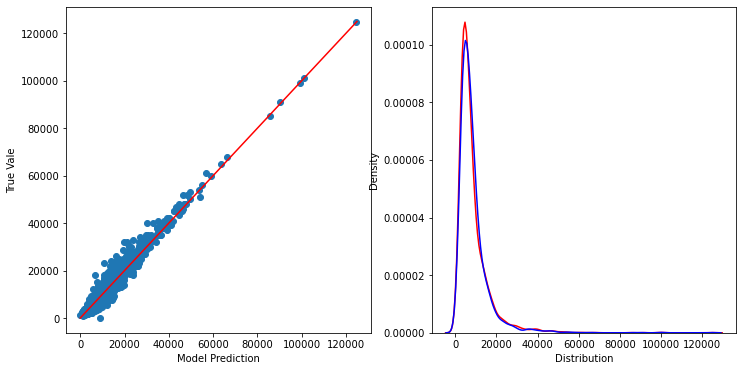

In [275]:
# Tập Train
model = model_gbr
Visualize_model_reg(y_train, model.predict(X_train))

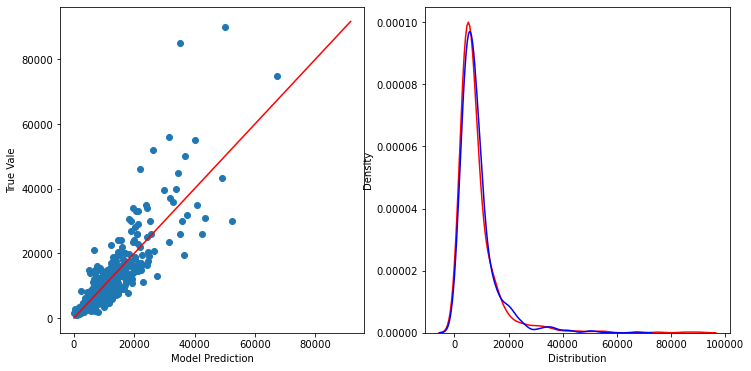

In [276]:
# Tập Test
model = model_gbr
Visualize_model_reg(y_test, model.predict(X_test))

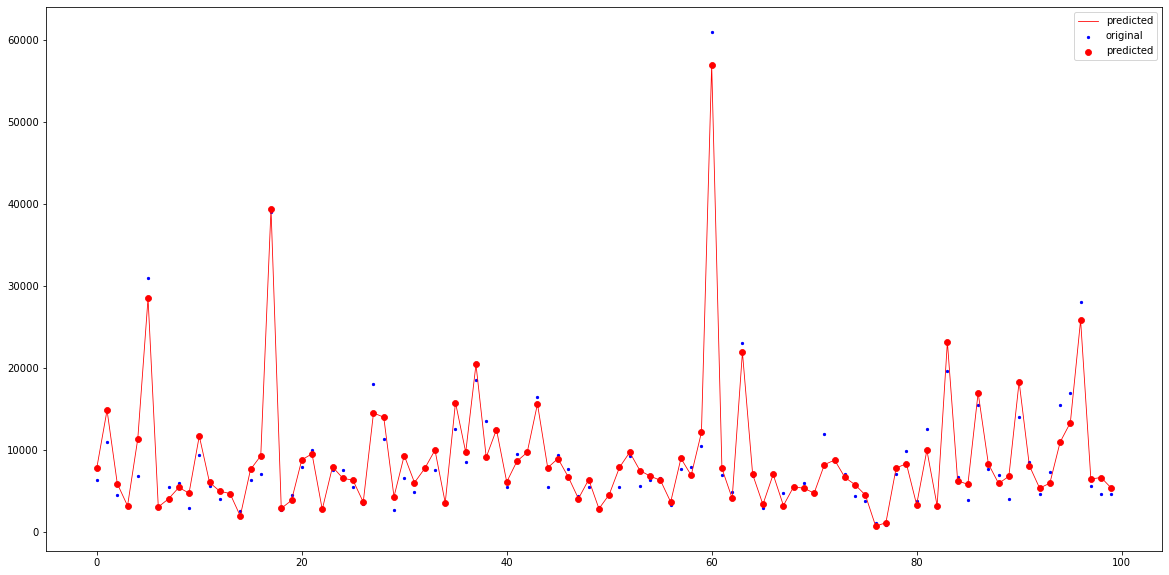

In [238]:
# Biểu đồ thể hiện chênh lệch giá trị thực và giá trị dự đoán - Tập Train
plt.figure(figsize=(20,10))
x_ax = range(len(y_train[:100]))
plt.scatter(x_ax, y_train[:100], s=5, color="blue", label="original")
plt.scatter(x_ax, model.predict(X_train.iloc[:100,]), lw=0.8, color="red", label="predicted")
plt.plot(x_ax, model.predict(X_train.iloc[:100,]), lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

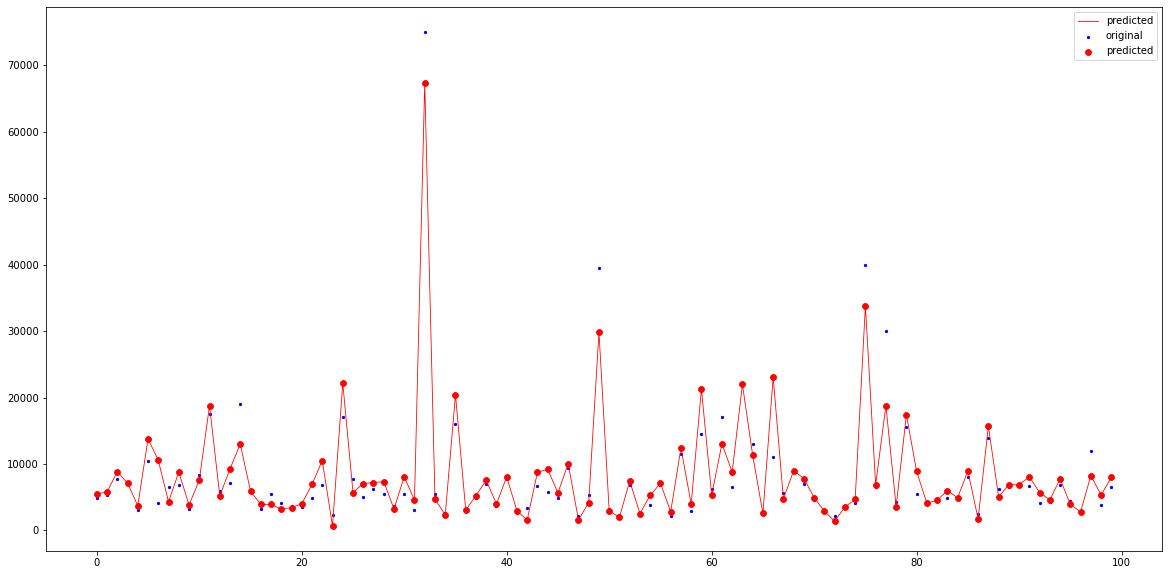

In [239]:
# Biểu đồ thể hiện chênh lệch giá trị thực và giá trị dự đoán - Tập Test
plt.figure(figsize=(20,10))
x_ax = range(len(y_test[:100]))
plt.scatter(x_ax, y_test[:100], s=5, color="blue", label="original")
plt.scatter(x_ax, model.predict(X_test.iloc[:100,]), lw=0.8, color="red", label="predicted")
plt.plot(x_ax, model.predict(X_test.iloc[:100,]), lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

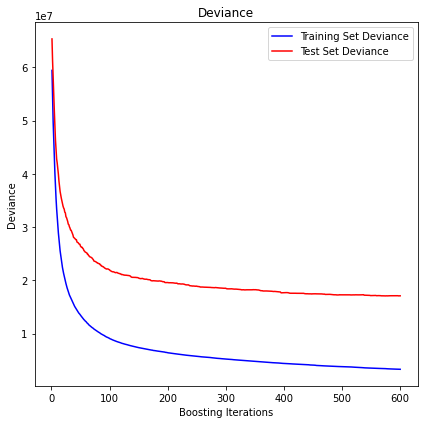

In [240]:
# Biểu đồ deviance
test_score = np.zeros((600,), dtype=np.float64)
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score[i] = model.loss_(y_test, y_pred)
 
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(600) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(600) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# BUILD PIPELINE

Create def

In [277]:
def addvar_gia(data):
    df = data.copy()
    # Tách dữ liệu về giá trong chuỗi ký tự
    lst_gia = []
    for i in df['Gia'].str.split(" "):
        lst_gia.append(i[0])

    df['f_Gia'] = lst_gia

    # Thay ký tự ',' bằng '.'
    df['f_Gia'] = df['f_Gia'].str.replace(',','.')

    # Kiểm tra kiểu dữ liệu của từng giá trị đã đúng hay chưa
    
    df_gia = df['Gia'].str.split(" ", expand=True)
    lst_gia = []
    n=0
    for i in df['f_Gia']:
        try: float(i)        
        except: lst_gia.append(i)
        else: 
            if df_gia.iloc[n,1] == 'tỷ': lst_gia.append(float(i)*1000)
            elif df_gia.iloc[n,1] == 'triệu': lst_gia.append(float(i))
            else: lst_gia.append(i)
        n=n+1

    df['f_Gia'] = lst_gia

    # Kiểm tra kiểu dữ liệu của từng giá trị đã đúng hay chưa
    lst_gia_check = []
    for i in df['f_Gia']:
        if type(i) is float or type(i) is int: lst_gia_check.append('Y')
        else: lst_gia_check.append('N')

    df_gia_check = pd.DataFrame(lst_gia_check)
    df_gia_check.value_counts()

    # Lọc những giá trị có kiểu dữ liệu chưa đúng
    df.iloc[df_gia_check[df_gia_check[0] == 'N'].index, df.columns.to_list().index('f_Gia')].values

    # Tạm thời thay thế các thành NaN
    df.iloc[df_gia_check[df_gia_check[0] == 'N'].index, df.columns.to_list().index('f_Gia')] = np.nan
    
    # Chuẩn hoá kiểu dữ liệu
    df['f_Gia'] = df['f_Gia'].astype(float)
    
    return df

In [278]:
def addvar_dongia(data):
    df = data.copy()
    lst_dongia = []
    for i in df['Gia'].str.split(" "):
        lst_dongia.append(i[2])

    df['f_Don_gia'] = lst_dongia
    df['f_Don_gia'] = df['f_Don_gia'].str.replace(',','.')
    df['f_Don_gia'] = df['f_Don_gia'].astype(float)
    df.loc[df['Gia'].str.contains('tỷ/m'),'f_Don_gia'] = df.loc[df['Gia'].str.contains('tỷ/m'),'f_Don_gia']*1000
    df.loc[df['Gia'].str.contains('ngàn/m'),'f_Don_gia'] = df.loc[df['Gia'].str.contains('ngàn/m'),'f_Don_gia']/1000
    return df

In [279]:
def addvar_dientich(data):
    df=data.copy()
    # Kiểm tra kiểu dữ liệu của từng giá trị đã đúng hay chưa
    lst_dt_check = []
    for i in df['Dien_tich']:
        if type(i) is float or type(i) is int: lst_dt_check.append('Y')
        else: lst_dt_check.append('N')

    df_dt_check = pd.DataFrame(lst_dt_check)
    df_dt_check.value_counts()

    # Lọc những giá trị có kiểu dữ liệu chưa đúng
    lst_dt_to_replace = df.iloc[df_dt_check[df_dt_check[0] == 'N'].index, df.columns.to_list().index('Dien_tich')].values
    lst_dt_to_replace
    
    df['f_Dien_tich'] = df['Dien_tich']
    if len(lst_dt_to_replace) > 0: 
        df.loc[df['f_Dien_tich'].str.count('.')>=2,'f_Dien_tich'] = df.loc[df['f_Dien_tich'].str.count('.')>=2,'f_Dien_tich']\
                                                                .str.replace('.','',1)
    # Chuyển kiểu dữ liệu về dạng số liên tục
    df['f_Dien_tich'] = df['f_Dien_tich'].astype(float)    
   
    # Fill NaN của f_Gia bằng f_Dien_tich và f_Don_gia
    df.loc[df['f_Gia'].isna(), 'f_Gia'] = df.loc[df['f_Gia'].isna(), 'f_Dien_tich'] * df.loc[df['f_Gia'].isna(), 'f_Don_gia']

    return df

In [280]:
def addvar_dientichsudung(data):
    df=data.copy()
    # Kiểm tra kiểu dữ liệu của từng giá trị đã đúng hay chưa
    lst_dtsd_check = []
    for i in df['Dien_tich_su_dung']:
        if type(i) is float or type(i) is int: lst_dtsd_check.append('Y')
        else: lst_dtsd_check.append('N')

    df_dtsd_check = pd.DataFrame(lst_dtsd_check)
    df_dtsd_check.value_counts()

    # Lọc những giá trị có kiểu dữ liệu chưa đúng
    lst_dtsd_to_replace = df.iloc[df_dtsd_check[df_dtsd_check[0] == 'N'].index, df.columns.to_list().index('Dien_tich_su_dung')].values
    lst_dtsd_to_replace

    df['f_Dien_tich_su_dung'] = df['Dien_tich_su_dung']
    if len(lst_dtsd_to_replace) > 0: 
        df.loc[df['f_Dien_tich_su_dung'].str.count('.')>=2,'f_Dien_tich_su_dung'] = df.loc[df['f_Dien_tich_su_dung'].str.count('.')>=2,'f_Dien_tich_su_dung']\
                                                                .str.replace('.','',1)

    # Chuyển kiểu dữ liệu về dạng số liên tục
    df['f_Dien_tich_su_dung'] = df['f_Dien_tich_su_dung'].astype(float)
    
    # Thay thế giá trị bị lỗi typing (diện tích sử dụng > diện tích 50 lần)
    df.loc[((df['f_Dien_tich_su_dung']/df['f_Dien_tich'])>=50) & (df['f_Dien_tich']<=2), 'f_Dien_tich'] = \
        df.loc[((df['f_Dien_tich_su_dung']/df['f_Dien_tich'])>=50) & (df['f_Dien_tich']<=2), 'f_Dien_tich'] * 1000
    
    return df

In [281]:
def addvar_nhavesinh(data):
    df = data.copy()
    # Kiểm tra kiểu dữ liệu của từng giá trị đã đúng hay chưa
    lst_nha_ve_sinh = []
    for i in df['Nha_ve_sinh']:
        try: int(i)        
        except: lst_nha_ve_sinh.append(i)
        else: lst_nha_ve_sinh.append(int(i))

    df['f_Nha_ve_sinh'] = lst_nha_ve_sinh

    # Kiểm tra kiểu dữ liệu của từng giá trị đã đúng hay chưa
    lst_nvs_check = []
    for i in df['f_Nha_ve_sinh']:
        if type(i) is int: lst_nvs_check.append('Y')
        else: lst_nvs_check.append('N')

    df_nvs_check = pd.DataFrame(lst_nvs_check)
    df_nvs_check.value_counts()

    # Lọc những giá trị có kiểu dữ liệu chưa đúng
    df.iloc[df_nvs_check[df_nvs_check[0] == 'N'].index, df.columns.to_list().index('f_Nha_ve_sinh')].values

    # Tạm thời thay thế các thành NaN
    df.iloc[df_nvs_check[df_nvs_check[0] == 'N'].index, df.columns.to_list().index('f_Nha_ve_sinh')] = np.nan
#    df.loc[df['f_Nha_ve_sinh'].isna(), 'f_Nha_ve_sinh'] = round(df.loc[df['f_Nha_ve_sinh'].isna()==False, 'f_Dien_tich'] / 28.5, 0) #==> Them moi
    df.loc[df['f_Nha_ve_sinh'].isna(), 'f_Nha_ve_sinh'] = df.loc[df['f_Nha_ve_sinh'].isna()==False, 'f_Nha_ve_sinh'].mean() 
        
    # Chuẩn hoá kiểu dữ liệu
#     df['f_Nha_ve_sinh'] = df['f_Nha_ve_sinh'].astype('Int64')
    df['f_Nha_ve_sinh'] = df['f_Nha_ve_sinh'].astype(int)
    return df

In [282]:
def addvar_sophong(data):
    df=data.copy()
    # Kiểm tra kiểu dữ liệu của từng giá trị đã đúng hay chưa
    lst_so_phong = []
    for i in df['So_phong']:
        try: int(i)        
        except: lst_so_phong.append(i)
        else: lst_so_phong.append(int(i))

    df['f_So_phong'] = lst_so_phong

    lst_sp_check = []
    for i in df['f_So_phong']:
        if type(i) is int: lst_sp_check.append('Y')
        else: lst_sp_check.append('N')

    df_sp_check = pd.DataFrame(lst_sp_check)
    df_sp_check.value_counts()

    # Lọc những giá trị có kiểu dữ liệu chưa đúng
    df.iloc[df_sp_check[df_sp_check[0] == 'N'].index, df.columns.to_list().index('f_So_phong')].values

    # Tạm thời thay thế các thành NaN
    df.iloc[df_sp_check[df_sp_check[0] == 'N'].index, df.columns.to_list().index('f_So_phong')] = np.nan
    
     # Chuẩn hoá kiểu dữ liệu
    df['f_So_phong'] = df['f_So_phong'].astype('Int64')

    return df

In [283]:
def addvar_cautruc_binary(data):
    df=data.copy()
    df['f_Tang_ham_b'] = 0
    df.loc[df['Cau_truc'].str.contains('tầng hầm')==True,'f_Tang_ham_b']=1

    df['f_Gac_suot_b'] = 0
    df.loc[df['Cau_truc'].str.contains('gác suốt')==True,'f_Gac_suot_b']=1

    df['f_Lau_b'] = 0
    df.loc[df['Cau_truc'].str.contains('lầu')==True,'f_Lau_b']=1

    df['f_Lung_b'] = 0
    df.loc[df['Cau_truc'].str.contains('lửng')==True,'f_Lung_b']=1

    df['f_Tret_b'] = 0
    df.loc[df['Cau_truc'].str.contains('trệt')==True,'f_Tret_b']=1

    df['f_Tang_thuong_b'] = 0
    df.loc[df['Cau_truc'].str.contains('tầng thượng')==True,'f_Tang_thuong_b']=1

    df['f_Ap_mai_b'] = 0
    df.loc[df['Cau_truc'].str.contains('áp mái')==True,'f_Ap_mai_b']=1
    return df

In [284]:
def addvar_cautruc_num(data):
    df=data.copy()
    df['f_Tang_ham_n'] = 0
    df.loc[df['Cau_truc'].str.contains('có tầng hầm'),'f_Tang_ham_n'] = 1

    df['f_Gac_suot_n'] = df['Cau_truc'].str.extract('(\d+ gác suốt)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
    df['f_Gac_suot_n'] = df['f_Gac_suot_n'].astype(int)

    df['f_Lau_n'] = df['Cau_truc'].str.extract('(\d+ lầu)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
    df['f_Lau_n'] = df['f_Lau_n'].astype(int)

    df['f_Lung_n'] = df['Cau_truc'].str.extract('(\d+ lửng)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
    df['f_Lung_n'] = df['f_Lung_n'].astype(int)

    df['f_Tret_n'] = df['Cau_truc'].str.extract('(\d+ trệt)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
    df['f_Tret_n'] = df['f_Tret_n'].astype(int)

    df['f_Tang_thuong_n'] = df['Cau_truc'].str.extract('(\d+ tầng thượng)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
    df['f_Tang_thuong_n'] = df['f_Tang_thuong_n'].astype(int)

    df['f_Ap_mai_n'] = df['Cau_truc'].str.extract('(\d+ áp mái)', expand = True)[0].str.split(' ', expand=True)[0].fillna(0)
    df['f_Ap_mai_n'] = df['f_Ap_mai_n'].astype(int)
    return df

In [285]:
def addvar_kichthuoc(data):
    df=data.copy()
    df['Chieu_dai'].isna().sum(), (df['Chieu_dai']==0).sum()
    df['f_Chieu_dai'] = df['Chieu_dai'].astype(float)

    df['Rong'].isna().sum(), (df['Rong']==0).sum()
    df['f_Rong'] = df['Rong'].astype(float)
    return df

In [286]:
def addvar_logioi(data):
    df=data.copy()
    df['f_Nha_hem'] = 1
    df.loc[df['Hem_rong']==0, 'f_Nha_hem'] = 0
    df['f_Nha_mat_tien'] = 1
    df.loc[df['Duong_mat_tien']==0, 'f_Nha_mat_tien'] = 0
    df['f_Lo_gioi'] = df['Hem_rong'] + df['Duong_mat_tien']
    return df

In [287]:
def addvar_location(data):
    df=data.copy()
    lst_duong = []
    for i in df['Duong']:
        lst_duong.append(no_accent_vietnamese(str.strip(str(i))))
    df['f_Duong'] = lst_duong

    df[df['f_Duong'].str.contains("\?")]['f_Duong'].unique()
    df['f_Duong'] = df['f_Duong'].replace(['???ng Nguy?n Th?n Hi?n', '???ng Cach M?ng Thang Tam','???ng Vo V?n Van'],
                               ['Nguyen Than Hien', 'Duong Cach Mang Thang Tam', 'Duong Vo Van Tan'])
    
    lst_phuong = []
    for i in df['Phuong']:
        lst_phuong.append(no_accent_vietnamese(str.strip(str(i))))
    df['f_Phuong'] = lst_phuong


    lst_quan = []
    for i in df['Quan']:
        lst_quan.append(no_accent_vietnamese(str.strip(i)))
    df['f_Quan'] = lst_quan
    
    location = pd.read_csv('location.csv')    
    df = df.merge(location, left_on=['f_Phuong', 'f_Quan'], 
                  right_on=['Phuong_bin', 'Quan_bin'],
                 how='left')
    df = df.drop(columns=[ 'Phuong_bin', 'Quan_bin'])    
    df['f_Location_qa'] = df['f_Quan'] + '_' +  df['f_Area']
    
    df.loc[df['f_Rank_phuong'].isna(), 'f_Rank_phuong'] = 0
    df.loc[df['f_Rank_quan'].isna(), 'f_Rank_quan'] = 0
    
    
    location_2 = pd.read_excel('location_2.xlsx', sheet_name='bin_phuong')    
    df = df.merge(location_2, left_on=['f_Phuong', 'f_Quan'], 
                  right_on=['Phuong_bin', 'Quan_bin'],
                 how='left')
    df = df.drop(columns=[ 'Phuong_bin', 'Quan_bin'])    
    df['f_Location_qa_2'] = df['f_Quan'] + '_' +  df['f_Area_2']   
    
    
    return df

In [288]:
def addvar_loaibds(data):
    df=data.copy()
    
    lst_noidung = []
    for i in df['Noi_dung']:
        lst_noidung.append(no_accent_vietnamese(str.strip(i)))

    # Tạo thuộc tính 'Quan_1'
    df['Noi_dung_clean'] = lst_noidung
    df['Noi_dung_clean'] = df['Noi_dung_clean'].str.lower()

    lst_word = ['nha', 'tro', 'dat', 'biet thu', 'shophouse', 'villa', 'khach san', 'village', 'nen', 'can ho', 'chung cu', 'can']
    lst_loai_bds = ['nha', 'tro', 'dat', 'biet thu', 'shophouse', 'villa', 'khach san', 'villa', 'dat', 'chung cu', 'chung cu', 'chung cu']

    df['f_Loai_BDS'] = 'other'
    n = 0
    for i in lst_word:
        df.loc[(df['Noi_dung_clean'].str.contains(i)) & (df['f_Loai_BDS']=='other'),'f_Loai_BDS']=lst_loai_bds[n]
        n=n+1
    return df

In [289]:
def select_var(data):
    df = data.copy()
    sample = df[['f_Nha_ve_sinh', 'f_Chieu_dai',  'f_Rong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 
                     'f_Lo_gioi', 'f_Lau_n', 'f_Nha_hem', 
                     'f_Quan', 'f_Location_qa_2', 'f_Gia']]  
#     sample = sample.dropna(how='any').reset_index(drop=True)
    X_new = sample.drop('f_Gia', axis=1)
    y_new = sample['f_Gia']
    
    return X_new, y_new

Create fit_transform function

In [290]:
from sklearn.base import BaseEstimator, TransformerMixin
class Pre_Processing(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('Khởi tạo đối tượng Pre_Processing')
    def fit(self, X, y=None):
#         print('Vào lệnh Fit Pre_Process()')
        return self
    def transform(self, data, y=None):
        df = data.copy()
        df = addvar_gia(df)
        df = addvar_dongia(df)
        df = addvar_dientich(df)
        df = addvar_dientichsudung(df)
        
        df = addvar_nhavesinh(df)
        df = addvar_sophong(df)
        df = addvar_cautruc_binary(df)
        df = addvar_cautruc_num(df) 
        
        df = addvar_kichthuoc(df)
        df = addvar_logioi(df)
        df = addvar_location(df)
        df = addvar_loaibds(df)
        return df

In [291]:
from sklearn.base import BaseEstimator, TransformerMixin
class Create_XY(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('Khởi tạo đối tượng Create_XY')
    def fit(self, X, y=None):
        return self
    def transform(self, data, y=None):
        df = data.copy()
        X, y = select_var(df)
        return X, y

In [292]:
from sklearn.base import BaseEstimator, TransformerMixin
class Concating(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('Khởi tạo đối tượng Concating')
    def fit(self, X, y=None):
        return self
    def transform(self, data, y=None):
        import pickle
        with open('model_ohe_buithihuong.pkl', 'rb') as file:
            encoder = pickle.load(file)
        
        df = data.copy()
        lst_encode = [ 'f_Quan', 'f_Location_qa_2']
        arr = encoder.transform(df[lst_encode]).toarray()

        cols = []
        n = 0
        for i in encoder.categories_:
            for j in i[0:]: 
                t = 'oh_' + lst_encode[n] + '_' +str(j)
                t = t.replace('-', '_')
                cols.append(t)
            n = n+1
        X_new_oh_encode = pd.DataFrame(arr, columns=cols)
        
        lst_concat = ['f_Nha_ve_sinh', 'f_Chieu_dai', 'f_Rong', 'f_Dien_tich', 'f_Dien_tich_su_dung', 
                      'f_Lo_gioi', 'f_Lau_n', 'f_Nha_hem']
        X_new = pd.concat([X_new_oh_encode, df[lst_concat]], axis=1)
        X_new.head()     
        
        return X_new

Create pipeline

In [293]:
model_2steps_pre = Pipeline(steps=[
    ('Pre_Processing', Pre_Processing()),
    ('Create_XY', Create_XY()),
])

model_concating = Concating()

model_gbr = model_gbr

Khởi tạo đối tượng Pre_Processing
Khởi tạo đối tượng Create_XY
Khởi tạo đối tượng Concating


Test pipeline

In [294]:
# Đọc dữ liệu
data_new = pd.read_excel('House_data.xlsx')
df_new = data_new

In [295]:
model_2steps_pre.fit(df_new)
X_new, y_new = model_2steps_pre.transform(df_new)

In [296]:
model_concating.fit(X_new)
X_new = model_concating.transform(X_new)

In [297]:
# Predict
# tinh RMSE, MAE, R^2
model = model_gbr
print('New Dataset RMSE: ', mean_squared_error(y_true=y_new, y_pred=model.predict(X_new), squared=False))
print('New Dataset R-square: ', model.score(X_new, y_new))

New Dataset RMSE:  2464.9120233587814
New Dataset R-square:  0.9071611471153695


In [298]:
np.std(y_new)

8089.776817841941

# PICKLE

In [299]:
def Save_Object(obj, filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj, file)
    return
def Load_Object(filename):
    with open(filename, 'rb') as file:
        obj = pickle.load(file)
    return obj

In [300]:
# Lưu model bằng dump pickle
Save_Object(model_2steps_pre, 'model_pre_buithihuong.pkl')
Save_Object(encoder, 'model_ohe_buithihuong.pkl')
Save_Object(model_concating, 'model_concating_buithihuong.pkl')
Save_Object(model_gbr, 'model_gbr_buithihuong.pkl')

In [301]:
end_time = time.time()

In [302]:
d = (end_time - start_time)/60
d

22.45005645751953